## OA and sizedistribution plots: ATTO station

In [2]:
%load_ext autoreload

%autoreload 2

from pathlib import Path
from bs_fdbck_clean.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck_clean.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck_clean.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/bs_fdbck_clean/data_info
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import scienceplots
import scienceplots
plt.style.use([
    'default',
    # 'science',
    'acp',
    # 'sp-grid',
    'no-black',
    'no-latex',
    'illustrator-safe'
])

In [4]:
import pandas as pd

In [5]:
from bs_fdbck_clean.constants import path_measurement_data

## Time resolution sources:


In [6]:

import numpy as np



In [7]:

select_station = 'ATTO'
model_lev_i = -2

In [8]:
plot_path = Path(f'Plots/{select_station}')

In [9]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO_ukesm_lev{model_lev_i}.png'
    return plot_path /f

In [10]:
plot_path.mkdir(exist_ok=True, parents=True)

In [11]:
plot_path

PosixPath('Plots/ATTO')

In [12]:
from bs_fdbck_clean.constants import path_measurement_data
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

In [13]:
fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

# Load observational data: 

In [14]:
postproc_data_obs = path_measurement_data /'ATTO'/'processed'

In [15]:


ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [16]:
fn_obs_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

# Read in model data:

In [17]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']
mod2cases = {'ECHAM-SALSA' : ['SALSA_BSOA_feedback'],
             'NorESM' : ['OsloAero_intBVOC_f09_f09_mg17_fssp'],
             'EC-Earth' : ['ECE3_output_Sara'],
             'UKESM' : ['AEROCOMTRAJ'],
             'Observations':['Obs'],
            }
di_mod2cases = mod2cases.copy()

In [18]:
select_station='ATTO'

In [19]:
dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        #if model_lev_i !=-2:
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        #else:
        #    fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        #fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-2.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-2.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_EC-Earth_ECE3_output_Sara_ilev-2.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_UKESM_AEROCOMTRAJ_ilev-2.csv


## Read in observations

In [20]:
ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time, engine='netcdf4')

In [21]:
ds_ATTO = ds_ATTO.sel(time_traj=0)

In [22]:
varl = ['Pressure_reanalysis', 'Potential_Temperature_reanalysis', 'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth', 'Relative_Humidity', 'Specific_Humidity_reanalysis',
 'Mixing_Ratio','Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500', 'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity','precip',#'Solar_inc_Wm2',
        #'Solar_out_Wm2',
        #'wind_speed',
        #'wind_speed_v',
        'OA'
]
ds_ATTO[varl].squeeze().to_dataframe()

Pressure_reanalysis  Potential_Temperature_reanalysis  \
time                                                                         
2014-03-10 15:00:00                974.8                             305.5   
2014-03-10 16:00:00                974.1                             305.5   
2014-03-10 17:00:00                974.9                             304.5   
2014-03-10 18:00:00                975.8                             303.5   
2014-03-10 19:00:00                976.6                             302.5   
...                                  ...                               ...   
2019-01-28 05:00:00                979.4                             298.0   
2019-01-28 06:00:00                980.0                             297.9   
2019-01-28 07:00:00                980.7                             297.8   
2019-01-28 11:00:00                980.7                             301.9   
2019-01-28 14:00:00                978.3                             304.3   

                     Temperature_reanalysis  Rainfall  Mixing_Depth  \
time                                                                  
2014-03-10 15:00:00                   303.3       0.0        1437.6   
2014-03-10 16:00:00                   303.2       0.0        1268.8   
2014-03-10 17:00:00                   302.3       0.0         863.0   
2014-03-10 18:00:00                   301.4       0.0         453.1   
2014-03-10 19:00:00                   300.5       0.0          43.2   
...                                     ...       ...           ...   
2019-01-28 05:00:00                   296.2       0.0         254.7   
2019-01-28 06:00:00                   296.2       0.0         363.3   
2019-01-28 07:00:00                   296.1       0.0         472.0   
2019-01-28 11:00:00                   300.2       0.0        1336.6   
2019-01-28 14:00:00                   302.4       0.0        1589.4   

                     Relative_Humidity  Specific_Humidity_reanalysis  \
time                                                                   
2014-03-10 15:00:00               55.1                          15.1   
2014-03-10 16:00:00               56.0                          15.2   
2014-03-10 17:00:00               60.5                          15.6   
2014-03-10 18:00:00               65.1                          15.9   
2014-03-10 19:00:00               69.7                          16.1   
...                                ...                           ...   
2019-01-28 05:00:00               85.8                          15.3   
2019-01-28 06:00:00               88.0                          15.7   
2019-01-28 07:00:00               90.2                          16.0   
2019-01-28 11:00:00               67.9                          15.4   
2019-01-28 14:00:00               57.4                          14.8   

                     Mixing_Ratio  Solar_Radiation  condensation_sink  \
time                                                                    
2014-03-10 15:00:00          15.4            681.2           0.001503   
2014-03-10 16:00:00          15.6            596.6           0.001285   
2014-03-10 17:00:00          16.0            504.7           0.001317   
2014-03-10 18:00:00          16.3            412.7           0.001469   
2014-03-10 19:00:00          16.6            320.7           0.001441   
...                           ...              ...                ...   
2019-01-28 05:00:00          15.7             18.9           0.000014   
2019-01-28 06:00:00          16.1             38.1           0.000013   
2019-01-28 07:00:00          16.4             57.4           0.000011   
2019-01-28 11:00:00          15.8            462.4           0.000026   
2019-01-28 14:00:00          15.2            488.3           0.000017   

                        N50-500    N100-500    N200-500           timeUTC-3  \
time                                                                          
2014-03-10 15:00:00  316.350342  259.

In [23]:
dic_df_pre['Observations'] = dict()
dic_df_pre['Observations']['Observations'] = ds_ATTO[varl].squeeze().to_dataframe()
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)

In [24]:
mod2cases['Observations'] = ['Observations']

In [25]:
dic_mod_ca = dic_df_pre.copy()

<AxesSubplot:xlabel='time'>

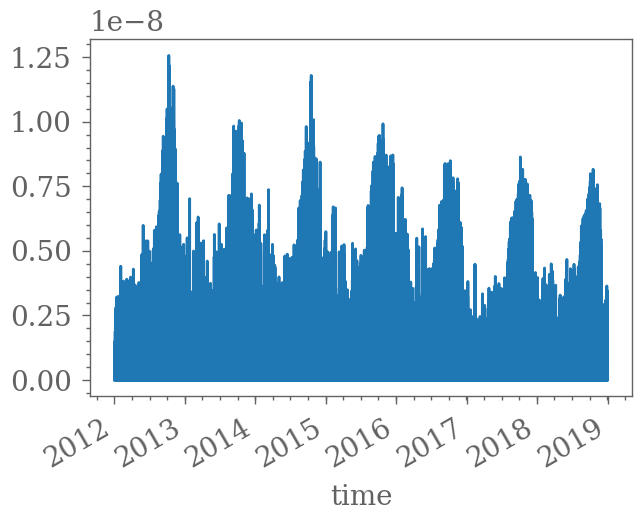

In [26]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

_ds =dic_mod_ca['NorESM'][mod2cases['NorESM'][0]]

_ds['SFisoprene'].plot()

### Save result in dictionary

In [27]:
dic_df_mod_case = di_mod2cases
for mo in models:
    cs = mod2cases[mo]
    for c in cs: 
        if len(cs)>1:
            use_name = f'{mo}_{c}'
        else:
            use_name =mo

In [28]:
dic_df_mod_case = dic_mod_ca.copy()

In [29]:
from bs_fdbck_clean.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

## Rename STP values

In [30]:
for mod in models:
    for ca in mod2cases[mod]:
        _df = dic_df_mod_case[mod][ca]
        for v in ['OA','N50','N100','N200','N500']:
            if f'{v}_STP' in _df.columns:
                if v in _df.columns:
                    _df = _df.rename({v:f'{v}_orig'}, axis=1)
                _df = _df.rename({f'{v}_STP':v}, axis=1)
        dic_df_mod_case[mod][ca] = _df

### Calculate Nx-500:


In [31]:
for mod in models:
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        print(ca)
        _df = dic_df_mod_case[mod][ca]
        for v in ['N50','N100','N200']:
            _df[f'{v}-500'] = _df[v] -_df['N500'] 
        dic_df_mod_case[mod][ca] = _df

ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp
EC-Earth
ECE3_output_Sara
UKESM
AEROCOMTRAJ


# Merge with observations:

In [32]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [33]:
vars_obs = ['OA', 'N100-500','N50-500','N200-500','temperature']

In [34]:
ds_ATTO

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, timeUTC: 25448, timeUTC-4: 25448, limit: 2)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
    time_traj                         int64 0
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
  * limit                             (limit) object 'bottom' 'top'
Data variables: (12/42)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time) float64 974.8 974.1 ... 980.7 978.3
    Potential_Temperature_reanalysis  (time) float64 305.5 305.5 ... 301.9 304.3
    Temperature_reanalysis            (time) float64 303.3 303.2 ... 300.2 302.4
    Rainfall                          (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Mixing_Depth                      (time) float64 1.438e+03 ... 1.589e+03
    ...                                ...
    PAR_in                            (time) float64 ...
    PAR_out                           (time) float64 ...
    LW_atm                            (time) float64 ...
    LW_terr                           (time) float64 ...
    OA                                (time) float64 0.99 1.62 1.66 ... nan nan
    BC_conc                           (time) float64 ...

In [35]:
df_ATTO = ds_ATTO[vars_obs].drop('time_traj').to_dataframe()

df_ATTO['some_obs_missing'] = df_ATTO.isnull().any(axis=1)

In [36]:
df_for_merge = df_ATTO[['OA','N100-500', 'some_obs_missing']].rename({'OA':'obs_OA','N100-500':'obs_N100-500',},axis=1)

In [37]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_for_merge ,right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


In [38]:
df_ATTO_obs_rename = df_ATTO.rename({'Org':'OA','temperature':'T_C'}, axis=1)

In [39]:
df_ATTO_obs_rename

OA    N100-500     N50-500    N200-500    T_C  \
time                                                                    
2014-03-10 15:00:00  0.990  259.764876  316.350342  123.407339  31.46   
2014-03-10 16:00:00  1.620  221.149397  288.441016  102.265441  31.62   
2014-03-10 17:00:00  1.660  223.659092  294.872421  104.508354  30.01   
2014-03-10 18:00:00  0.985  243.316332  323.442362  120.456843  28.18   
2014-03-10 19:00:00  2.420  236.004666  323.533283  116.970997  27.40   
...                    ...         ...         ...         ...    ...   
2019-01-28 05:00:00    NaN    2.418678    2.886702    1.160755    NaN   
2019-01-28 06:00:00    NaN    2.165097    2.189876    1.267096    NaN   
2019-01-28 07:00:00    NaN    1.882887    2.075599    0.938360    NaN   
2019-01-28 11:00:00    NaN    4.941434    7.112076    1.551557    NaN   
2019-01-28 14:00:00    NaN    1.090769    1.090769    1.090769    NaN   

                     some_obs_missing  
time                                   
2014-03-10 15:00:00             False  
2014-03-10 16:00:00             False  
2014-03-10 17:00:00             False  
2014-03-10 18:00:00             False  
2014-03-10 19:00:00             False  
...                               ...  
2019-01-28 05:00:00              True  
2019-01-28 06:00:00              True  
2019-01-28 07:00:00              True  
2019-01-28 11:00:00              True  
2019-01-28 14:00:00              True  

[25448 rows x 6 columns]

## Add observations to dictionary

In [40]:
dic_df_mod_case['Observations'] = dict()
dic_df_mod_case['Observations']['Observations'] = df_ATTO_obs_rename

In [41]:
dic_df_mod_case['Observations'].keys()

dict_keys(['Observations'])

In [42]:
dic_mod2case = mod2cases

In [43]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'Org','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        #dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_ATTO = add_log(df_ATTO)

{'N100', 'N200', 'OA', 'N50'}
{'N150', 'N200', 'N100', 'N50', 'OA'}
{'N150', 'N200', 'N100', 'N50', 'OA'}
{'N150', 'N200', 'N100', 'N50', 'OA'}
{'OA'}
{'OA'}


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
mod='NorESM'

In [45]:
ca = mod2cases[mod][0]

In [46]:
mask_obs_N = dic_df_mod_case[mod][ca]['obs_N100-500'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['obs_OA'].notnull()

## Compute daily medians:

In [47]:
path_save_daily_medians = Path(f'Temp_data/{select_station}_daily_medians')
path_save_daily_medians.parent.mkdir(exist_ok=True)

In [48]:
path_save_daily_medians

PosixPath('Temp_data/ATTO_daily_medians')

### Remove values where fewer than x values

In [49]:
minimal_number_per_day = 20
obs_per_day =  dic_df_mod_case['Observations']['Observations'].resample('D').count()['OA']
obs_per_day

time
2014-03-10     9
2014-03-11    24
2014-03-12    24
2014-03-13    24
2014-03-14    24
              ..
2019-01-24     0
2019-01-25     0
2019-01-26     0
2019-01-27     0
2019-01-28     0
Freq: D, Name: OA, Length: 1786, dtype: int64

In [50]:
_df = dic_df_mod_case['UKESM']['AEROCOMTRAJ']
_df_m = _df.resample('d').median()
_df_m['obs_per_day'] = obs_per_day

<AxesSubplot:xlabel='time'>

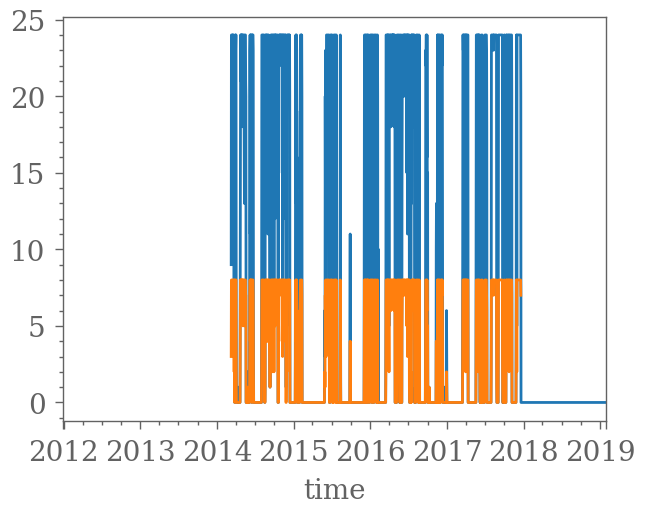

In [51]:
_df_m['obs_per_day'].plot()

_df_c = _df[_df['some_obs_missing']==False].resample('d').count()['OA']
_df_c.plot()

In [52]:
dic_df_med = dict()
for mo in dic_df_mod_case.keys():
    for ca in dic_df_mod_case[mo].keys():
        print(mo)
        if len(dic_df_mod_case[mo].keys())>1:
            use_name = f'{mo}_{ca}'
        else:
            use_name = mo
            
        _df = dic_df_mod_case[mo][ca]
        

        _df = _df[_df['some_obs_missing']==False]
        _df_med = _df.resample('D').median()
        _df_med['obs_per_day'] = obs_per_day
        #_df_count = _df.resample('D').count()['OA']
        dic_df_med[use_name] = _df_med[_df_med['obs_per_day']>minimal_number_per_day]
        fp = path_save_daily_medians.parent / f'{path_save_daily_medians.name}_{use_name}.csv'
        dic_df_med[use_name].to_csv(fp)

ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


In [53]:
from bs_fdbck_clean.util.plot.BSOA_plots import cdic_model
import seaborn as sns
from matplotlib import pyplot as plt, gridspec as gridspec
from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid2, make_cool_grid3
import scipy

### Fit funcs

In [54]:
from bs_fdbck_clean.util.BSOA_datamanip.fits import *
from bs_fdbck_clean.util.BSOA_datamanip.atto import season2month

### season to monthseason2month

In [55]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [56]:
from bs_fdbck_clean.util.plot.BSOA_plots import cdic_model

ECHAM-SALSA
95


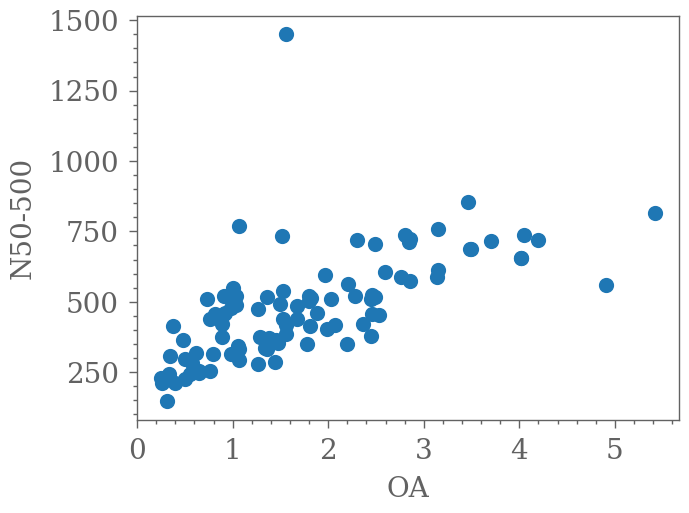

NorESM
95


<AxesSubplot:xlabel='time'>

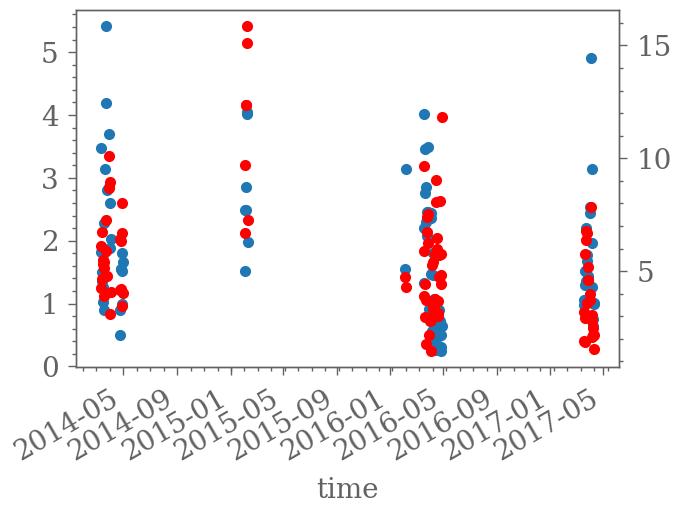

In [57]:
season = 'FMA'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['OA'].plot(marker='.',linewidth=0)

season = 'FMA'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['OA'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

ECHAM-SALSA
95


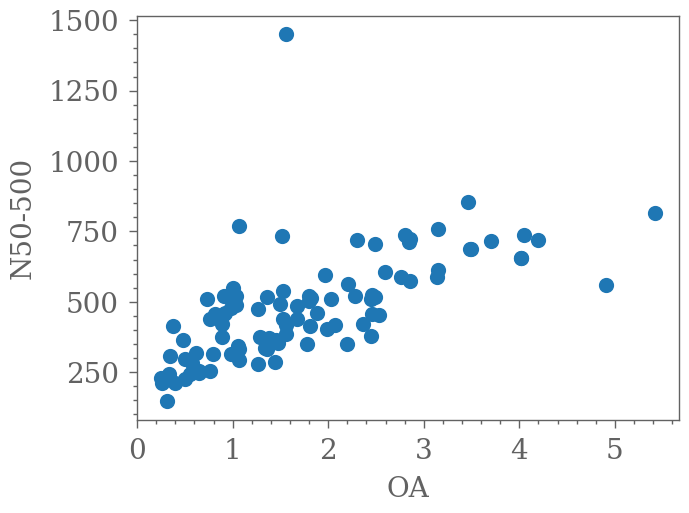

NorESM
95


<AxesSubplot:xlabel='time'>

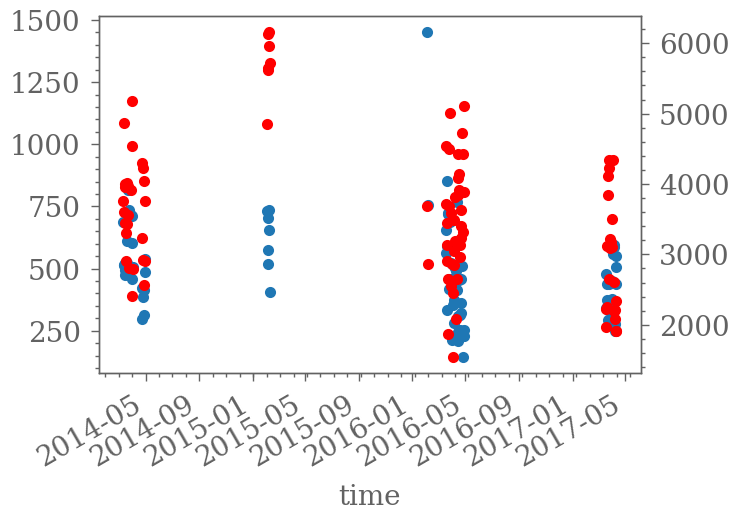

In [58]:
season = 'FMA'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['N50-500'].plot(marker='.',linewidth=0)

season = 'FMA'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['N50-500'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

# PLOTS

In [59]:
models

['ECHAM-SALSA', 'NorESM', 'EC-Earth', 'UKESM']

In [60]:
models_and_obs =  models + ['Observations'] 

## T to OA

In [61]:
label_dic =dict(
    T_C=r'T  [$^\circ$C]',
    OA =r'OA [$\mu g m^{-3}$]',
)

## Define grid

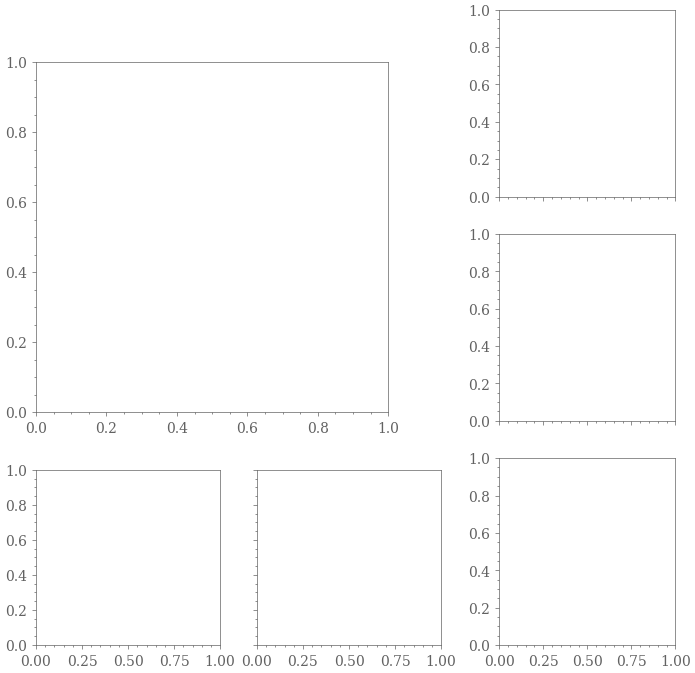

In [62]:

def make_cool_grid5(figsize=None,
                    width_ratios=None,
                    ncols=1,
                    nrows=1,
                    num_subplots_per_big_plot=2,
                    size_big_plot=5,
                    add_gs_kw=None,
                    sharex='col',
                    sharey='row',
                    
                    w_plot = 5.,
                    w_cbar = 1,
                    w_ratio_sideplot = 0.6,
                    frac_dist_axis_from_big = .15
                    ):
    width_small_plot = size_big_plot/num_subplots_per_big_plot
    width_dist_ax = size_big_plot*frac_dist_axis_from_big
    
    if figsize is None:
        
        figsize = [size_big_plot + width_small_plot+ width_dist_ax,
                   size_big_plot + width_small_plot+ width_dist_ax,
                  ]
    #figsize=[10,10]
    width_ratios = None
    add_gs_kw = None

    if width_ratios is None:
        width_ratios = [1] * ncols + [w_cbar / w_plot] #+ [1]* ncols_extra
    if add_gs_kw is None:
        add_gs_kw = dict()


    if 'hspace' not in add_gs_kw.keys():
        add_gs_kw['hspace'] = 0
    if 'wspace' not in add_gs_kw.keys():
        add_gs_kw['wspace'] = 0


    # add_gs_kw['width_ratios'] = width_ratios
    fig = plt.figure(figsize=figsize,
                     dpi=100)

    #gs = fig.add_gridspec(nrows, ncols, **add_gs_kw)

    
    w_r1 = [size_big_plot,size_big_plot*frac_dist_axis_from_big]
    h_r1 = [frac_dist_axis_from_big,1, ]
    
    gs0 = gridspec.GridSpec(2, 2, figure=fig, height_ratios= [size_big_plot+width_dist_ax,width_small_plot],
                            width_ratios = [size_big_plot+width_dist_ax,width_small_plot])
    #fig.show()
    
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows+1, ncols+1, width_ratios=w_r1, height_ratios=h_r1, subplot_spec=gs0[0,0], **add_gs_kw)
    # for the small plots:
    gs01 = gridspec.GridSpecFromSubplotSpec(num_subplots_per_big_plot+1,1, subplot_spec=gs0[:,1])#, **add_gs_kw)
    gs03 = gridspec.GridSpecFromSubplotSpec(1,num_subplots_per_big_plot, subplot_spec=gs0[1,:1])#, **add_gs_kw)

    # gs_s = gs[:,:(ncols+1)].subgridspec(nrows=nrows, ncols=ncols, wspace=add_gs_kw['wspace'], hspace=add_gs_kw['hspace'])
    axs = gs00.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = gs01.subplots(sharex=sharex, sharey=sharey, )
    axs_extra2 = gs03.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = np.concatenate((axs_extra, axs_extra2,))
    axs[0,1].clear()
    axs[0,1].axis("off")
    daxs = dict(x=axs[0,0],y=axs[1,1])
    # distribution axis
    for a in daxs:
        _ax = daxs[a]
        sns.despine(bottom=False, left=False, ax=_ax)
        _ax.axis("off")
    #daxs = [dax1,dax2]
    #axs = np.array(axs)

    ax = axs[1,0]


    return fig, ax, daxs, axs_extra


fig, ax, daxs, axs_extra = make_cool_grid5(#ncols_extra=1, nrows_extra=1
                                           )# w_ratio_sideplot=.5)
#for ax_e in axs_extra:
#    ax_e.set_xlabel('')
#    ax_e.set_ylabel('')
#    ax_e.set_ylim(ax.get_ylim())
#    ax_e.set_xlim(ax.get_xlim())
#    ax_e.axes.xaxis.set_ticklabels([])
#    ax_e.axes.yaxis.set_ticklabels([])

#    sns.despine(ax = ax_e)



In [63]:
#parameters, cov= curve_fit(f, x, y)

#model = scipy.odr.odrpack.Model(f_wrapper_for_odr)
#data = scipy.odr.odrpack.Data(x,y)
#myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)
#myodr.set_job(fit_type=2)
def compute_p_value(df_s, out, popt):
    parameters = popt
    parameterStatistics = out#myodr.run()    
    x = df_s.dropna()
    df_e = len(x) - len(popt) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.975, df_e)
    ci = []
    for i in range(len(parameters)):
        ci.append([parameters[i] - t_df * parameterStatistics.sd_beta[i], parameters[i] + t_df * parameterStatistics.sd_beta[i]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for i in range(len(parameters)):
        print('parameter:', parameters[i])
        print('   conf interval:', ci[i][0], ci[i][1])
        print('   tstat:', tstat_beta[i])
        print('   pstat:', pstat_beta[i])
        print()

## Make plot

In [73]:
def make_plot(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.3,
             source_list = models_and_obs, fig=None, ax=None, daxs=None, axs_extra=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
              markersize=1,
              marker='.',

             ):
    if fig is None: 
        fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)

    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    make_scatter_plot(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=alpha_scat,
             source_list = source_list, fig=fig, ax=ax, daxs=daxs, axs_extra=axs_extra,
              xscale=xscale, yscale=yscale,
              dic_df_med = dic_df_med,
              markersize=markersize,
              marker=marker,)
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'ATTO, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo in source_list:

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        sns.histplot(#x=v_x,
                    x= df_s[v_x], 
            edgecolor=cdic_model[mo],
            #log_scale=(xscale=='log'),
            color=cdic_model[mo], 
            element="step",
            label=mo,
            linewidth=1,
            #log_scale=(xscale=='log',False,),

            alpha=.1,
            bins=xbins,
            ax = daxs['x'],
                    
                   )
        print(daxs['x'].get_ylim())
        _fi, ax_test = plt.subplots();
        ax_test = sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = ax_test,
            #ax = daxs['y'],
            linewidth=2,
            
            #edgecolor=None,
            #log_scale=(False,yscale=='log'),
            alpha=.1,
            bins=ybins,
        );
        
        sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = daxs['y'],
            linewidth=1,
            
            #edgecolor=None,
            #log_scale=(xscale=='log',yscale=='log'),
            #log_scale=(False,yscale=='log'),
            
            alpha=.1,
            bins=ybins,
            )
        xlim_dist_n = list(ax_test.get_xlim())
        _fi.clf()
        #if xlim_dist_n[1]>xlim_dist_n[1]:
        xlim_dist[1] = max(xlim_dist_n[1],xlim_dist[1])
        #daxs['y'].set_xlim([0,xlim_dist[1]])
        
        #plt.show()

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)


    for ax_e in axs_extra:
        ax_e.set_xlabel('')
        ax_e.set_ylabel('')
        ax_e.set_ylim(ax.get_ylim())
        ax_e.set_xlim(ax.get_xlim())
        ax_e.axes.xaxis.set_ticklabels([])
        ax_e.axes.yaxis.set_ticklabels([])

        sns.despine(ax = ax_e)

    return

def make_scatter_plot(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.3,
             source_list = models_and_obs, fig=None, ax=None, daxs=None, axs_extra=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
              markersize=1,
              marker='.',):
    
    for mo, ax_ex in zip(source_list, axs_extra[:]):
        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()


        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt*.7, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker=marker,
                        s=markersize,

                   )
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker=marker,
                        s=markersize,
                    
                   )
        ax_ex.set_title(mo, y=.95)
    return
#### WET_mid

## T to OA, exp

In [65]:
def get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12]):
    v_log_y = f'ln({v_y})'
    df_s[v_log_y] = np.log(df_s[v_y])
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'linear', return_func=True, beta0=beta0)
    print('****ignore****')
    _, _, _, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'exp', return_func=True, beta0=beta0, pprint=False)
    print('****stop ignore****')
    
    a = np.exp(popt[-1])
    b = popt[0]
    if np.abs(a)< 0.009:
        #a_lab = ((str("%.2e" % a)).replace("e", ' \\cdot 10^{ ')).replace("+0", ") + ' } ')
        label = '($%.1E) \cdot e^{%5.2fx}$' %(a,b,)
    else:
        label = '$%5.2f e^{%5.2fx}$' %(a,b,)
    popt = [a,b]

    return popt, pov, label, func

# Compare seasons

### FMA

/tmp/ipykernel_138292/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 23.1)
(0.0, 31.5)
(0.0, 31.5)
(0.0, 31.5)
(0.0, 31.5)


/tmp/ipykernel_138292/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


*******ECHAM-SALSA*****
[0.01, 0.12]
Beta: [ 0.19744422 -5.23621991]
Beta Std Error: [0.024591   0.69977709]
Beta Covariance: [[ 0.00111671 -0.03159562]
 [-0.03159562  0.90429239]]
Residual Variance: 0.5415151007539926
Inverse Condition #: 0.032756076756249586
Reason(s) for Halting:
  Sum of squares convergence
[ 0.19744422 -5.23621991]
reason for halting
****ignore****
[0.01, 0.12]
[0.00060232 0.21936931]
reason for halting
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.32502446 -6.5771079 ]
Beta Std Error: [0.02815334 0.70626735]
Beta Covariance: [[ 0.00261198 -0.06542185]
 [-0.06542185  1.64379878]]
Residual Variance: 0.3034517238323152
Inverse Condition #: 0.018513382695958213
Reason(s) for Halting:
  Sum of squares convergence
[ 0.32502446 -6.5771079 ]
reason for halting
****ignore****
[0.01, 0.12]
[0.01896427 0.17502195]
reason for halting
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.24876116 -5.58589627]
Beta Std Error: [0.02181569 0.54389666]
B

/tmp/ipykernel_138292/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



[0.01, 0.12]
Beta: [  0.45933111 -11.54131716]
Beta Std Error: [0.05980844 1.56945529]
Beta Covariance: [[ 0.01050505 -0.27545536]
 [-0.27545536  7.23387544]]
Residual Variance: 0.34050764591790394
Inverse Condition #: 0.012441244574748949
Reason(s) for Halting:
  Sum of squares convergence
[  0.45933111 -11.54131716]
reason for halting
****ignore****
[0.01, 0.12]
[2.24732750e-13 1.06756147e+00]
reason for halting
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.37409764 -7.72653615]
Beta Std Error: [0.05690819 1.40313383]
Beta Covariance: [[ 0.00738301 -0.1818693 ]
 [-0.1818693   4.48830315]]
Residual Variance: 0.43864785275882306
Inverse Condition #: 0.014214908810071907
Reason(s) for Halting:
  Sum of squares convergence
[ 0.37409764 -7.72653615]
reason for halting
****ignore****
[0.01, 0.12]
[0.00478203 0.23201886]
reason for halting
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.23677762 -5.27140357]
Beta Std Error: [0.02775875 0.68045952]
Beta Covar

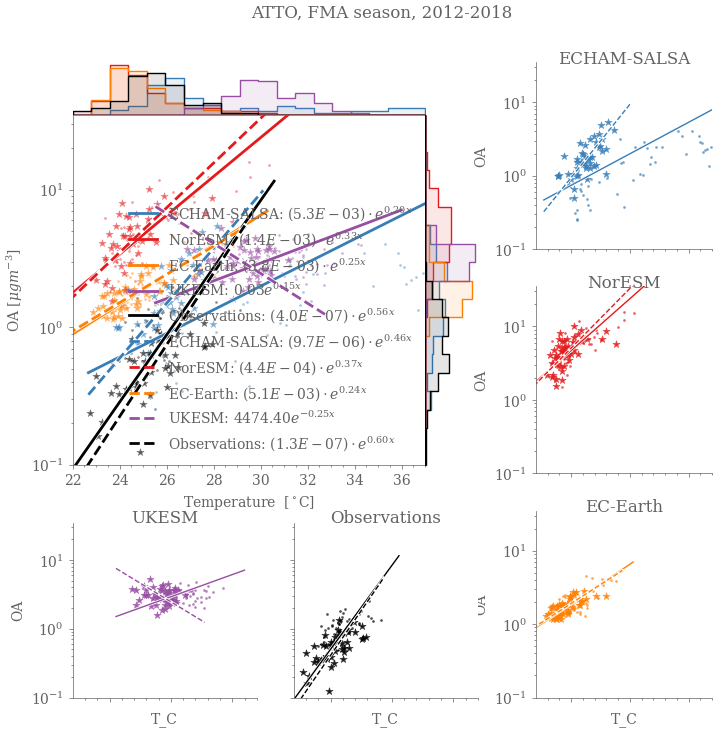

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [87]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'Temperature  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='FMA'
v_x = 'T_C'
v_y = 'OA'

dic_df_med_adj = dict()

for k in dic_df_med.keys():
    _df  = dic_df_med[k].copy()
    _df = _df[~_df.index.year.isin([2015,2016])]
    dic_df_med_adj[k] = _df

make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .2, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
          dic_df_med = dic_df_med,
          markersize=10,
         
         )
make_scatter_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .2, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
          dic_df_med = dic_df_med_adj,
          markersize=30,
                  marker='*',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med_adj[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linestyle= '--',linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt),linestyle= '--', c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_no2015-2016_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### FMAM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 36.75)
(0.0, 39.9)
(0.0, 45.15)
(0.0, 45.15)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 45.15)
*******ECHAM-SALSA*****
[0.01, 0.12]
Beta: [ 0.24029672 -6.38235529]
Beta Std Error: [0.02561718 0.71088712]
Beta Covariance: [[ 0.0011787  -0.03255272]
 [-0.03255272  0.90770176]]
Residual Variance: 0.5567472883280192
Inverse Condition #: 0.030412390626979483
Reason(s) for Halting:
  Sum of squares convergence
[ 0.24029672 -6.38235529]
reason for haltng
****ignore****
[0.01, 0.12]
[0.00061367 0.21595042]
reason for haltng
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.32257394 -6.49001385]
Beta Std Error: [0.02330865 0.58998723]
Beta Covariance: [[ 0.00180916 -0.04571664]
 [-0.04571664  1.15912041]]
Residual Variance: 0.300300922873239
Inverse Condition #: 0.01896578274622791
Reason(s) for Halting:
  Sum of squares convergence
[ 0.32257394 -6.49001385]
reason for haltng
****ignore****
[0.01, 0.12]
[0.02093055 0.17189287]
reason for haltng
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.29456706 -6.61008829]
Beta Std Error: [0.02686388 0.6662

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


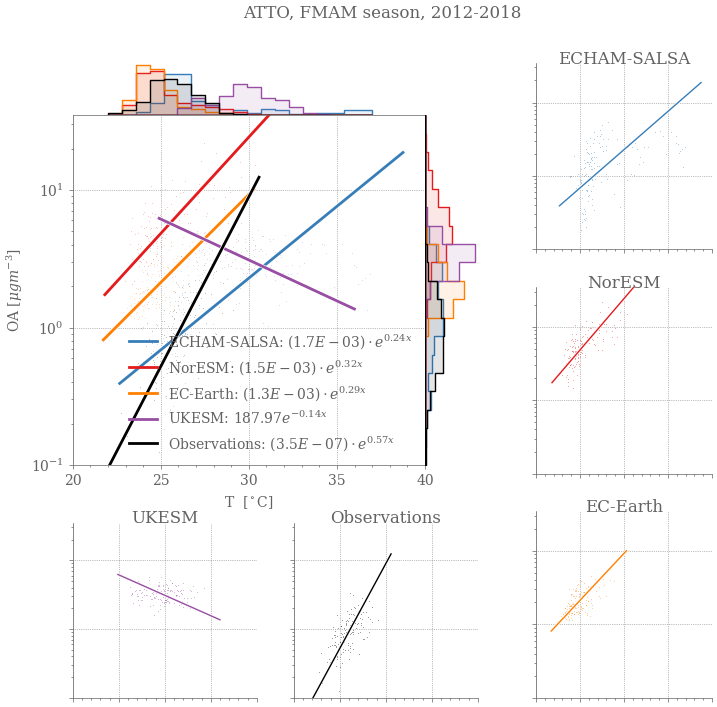

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [66]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='FMAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 36.75)
(0.0, 39.9)
(0.0, 45.15)
(0.0, 45.15)
(0.0, 45.15)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.25248041 -6.68871994]
Beta Std Error: [0.02942463 0.80698607]
Beta Covariance: [[ 0.00143788 -0.03926505]
 [-0.03926505  1.08151509]]
Residual Variance: 0.602142787029228
Inverse Condition #: 0.029006375190649993
Reason(s) for Halting:
  Sum of squares convergence
[ 0.25248041 -6.68871994]
reason for haltng
****ignore****


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
[0.00075705 0.20464151]
reason for haltng
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.35260554 -7.22877071]
Beta Std Error: [0.02893977 0.72750714]
Beta Covariance: [[ 0.00238561 -0.05989375]
 [-0.05989375  1.50759281]]
Residual Variance: 0.3510673682882304
Inverse Condition #: 0.016674117041671162
Reason(s) for Halting:
  Sum of squares convergence
[ 0.35260554 -7.22877071]
reason for haltng
****ignore****
[0.01, 0.12]
[0.01174452 0.19515156]
reason for haltng
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.33035677 -7.47901201]
Beta Std Error: [0.03745282 0.921987  ]
Beta Covariance: [[ 0.00242253 -0.0596069 ]
 [-0.0596069   1.46808278]]
Residual Variance: 0.5790273166137971
Inverse Condition #: 0.010385400459441906
Reason(s) for Halting:
  Sum of squares convergence
[ 0.33035677 -7.47901201]
reason for haltng
****ignore****
[0.01, 0.12]
[2.65885761e-07 5.94210808e-01]
reason for haltng
****stop ignore****
UKESM
[0.01, 0.12]
Beta: [-0.14068313  5.31633277]
Beta

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[-1.13097218e+09 -8.74051332e-01]
reason for haltng
****stop ignore****


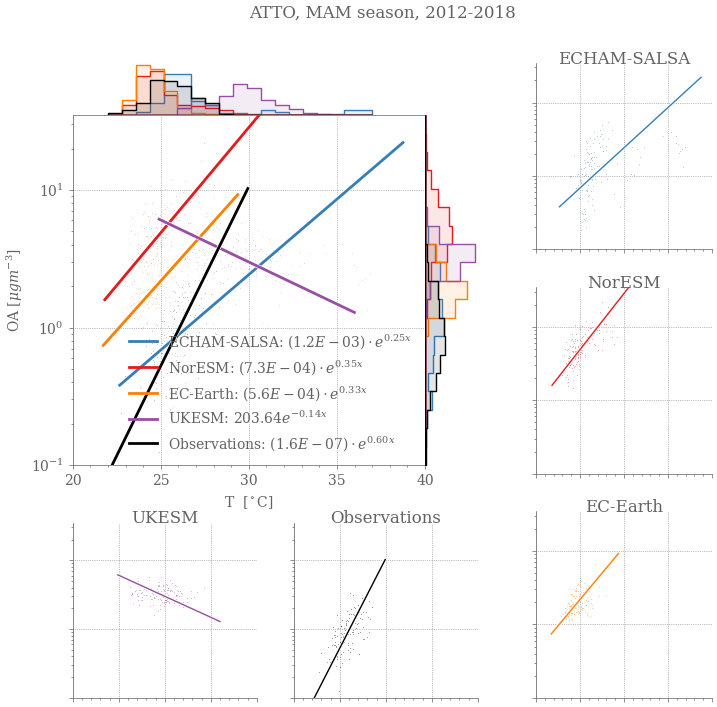

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [67]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JFM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 13.65)
(0.0, 25.2)
(0.0, 25.2)
(0.0, 25.2)
(0.0, 25.2)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.12465506 -2.99675738]
Beta Std Error: [0.01445257 0.45542954]
Beta Covariance: [[ 0.00051602 -0.01614784]
 [-0.01614784  0.51241511]]
Residual Variance: 0.4047813168515469
Inverse Condition #: 0.033555516975478504
Reason(s) for Halting:
  Sum of squares convergence
[ 0.12465506 -2.99675738]
reason for haltng
****ignore****
[0.01, 0.12]
[0.00572869 0.1570692 ]
reason for haltng
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.32231937 -6.37707232]
Beta Std Error: [0.02943324 0.76489265]
Beta Covariance: [[ 0.003192   -0.08275598]
 [-0.08275598  2.15569682]]
Residual Variance: 0.27140215833118403
Inverse Condition #: 0.022164422847737186
Reason(s) for Halting:
  Sum of squares convergence
[ 0.32231937 -6.37707232]
reason for haltng
****ignore****
[0.01, 0.12]
[0.03670714 0.15245047]
reason for haltng
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.11416975 -2.28004459]
Beta Std Error: [0.

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Beta: [ 0.07873285 -1.41547257]
Beta Std Error: [0.01952401 0.61446451]
Beta Covariance: [[ 0.00037221 -0.0116961 ]
 [-0.0116961   0.36867624]]
Residual Variance: 1.024114363895567
Inverse Condition #: 0.015632204461710236
Reason(s) for Halting:
  Iteration limit reached
[ 0.07873285 -1.41547257]
reason for haltng
Going for least square
****ignore****
[0.01, 0.12]
[1.57327936e-05 3.52941698e-01]
reason for haltng
****stop ignore****
Observations
[0.01, 0.12]
Beta: [  0.51805662 -13.75163766]
Beta Std Error: [0.04815589 1.27234984]
Beta Covariance: [[ 0.00838174 -0.22102142]
 [-0.22102142  5.85124882]]
Residual Variance: 0.27667155574443963
Inverse Condition #: 0.01999124714327045
Reason(s) for Halting:
  Sum of squares convergence
[  0.51805662 -13.75163766]
reason for haltng
****ignore****
[0.01, 0.12]
[1.35404014e-14 1.09613200e+00]
reason for haltng
****stop ignore****


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


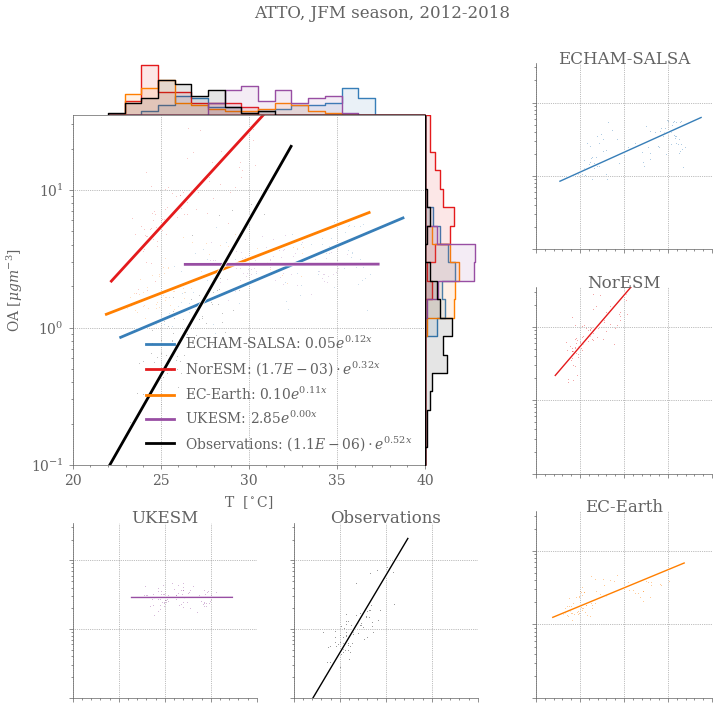

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [68]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JFM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 36.75)
(0.0, 39.9)
(0.0, 45.15)
(0.0, 45.15)
(0.0, 45.15)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.25248041 -6.68871994]
Beta Std Error: [0.02942463 0.80698607]
Beta Covariance: [[ 0.00143788 -0.03926505]
 [-0.03926505  1.08151509]]
Residual Variance: 0.602142787029228
Inverse Condition #: 0.029006375190649993
Reason(s) for Halting:
  Sum of squares convergence
[ 0.25248041 -6.68871994]
reason for haltng
****ignore****
[0.01, 0.12]
[0.00075705 0.20464151]
reason for haltng
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.35260554 -7.22877071]
Beta Std Error: [0.02893977 0.72750714]
Beta Covariance: [[ 0.00238561 -0.05989375]
 [-0.05989375  1.50759281]]
Residual Variance: 0.3510673682882304
Inverse Condition #: 0.016674117041671162
Reason(s) for Halting:
  Sum of squares convergence
[ 0.35260554 -7.22877071]
reason for haltng
****ignore****
[0.01, 0.12]
[0.01174452 0.19515156]
reason for haltng
****stop ignore****


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


EC-Earth
[0.01, 0.12]
Beta: [ 0.33035677 -7.47901201]
Beta Std Error: [0.03745282 0.921987  ]
Beta Covariance: [[ 0.00242253 -0.0596069 ]
 [-0.0596069   1.46808278]]
Residual Variance: 0.5790273166137971
Inverse Condition #: 0.010385400459441906
Reason(s) for Halting:
  Sum of squares convergence
[ 0.33035677 -7.47901201]
reason for haltng
****ignore****
[0.01, 0.12]
[2.65885761e-07 5.94210808e-01]
reason for haltng
****stop ignore****
UKESM
[0.01, 0.12]
Beta: [-0.14068313  5.31633277]
Beta Std Error: [0.02285668 0.67632056]
Beta Covariance: [[ 0.00057122 -0.01688663]
 [-0.01688663  0.5001315 ]]
Residual Variance: 0.9145784811949655
Inverse Condition #: 0.012562016608180043
Reason(s) for Halting:
  Sum of squares convergence
[-0.14068313  5.31633277]
reason for haltng
****ignore****
[0.01, 0.12]
[42.36408863 -0.12219721]
reason for haltng
****stop ignore****
Observations
[0.01, 0.12]
Beta: [  0.60094206 -15.66602094]
Beta Std Error: [0.0499114  1.28455654]
Beta Covariance: [[ 0.0070037

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


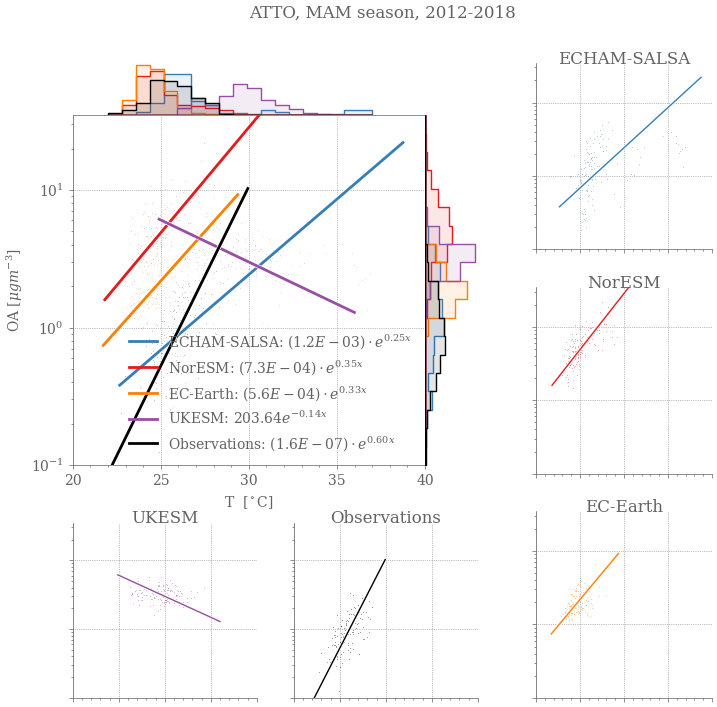

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [69]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
Going for least square
NorESM
Going for least square
EC-Earth
Going for least square
UKESM
Going for least square
Observations
Going for least square
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_MAM_ATTO_T_C_OA-ATTO_ukesm_lev-2.png


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


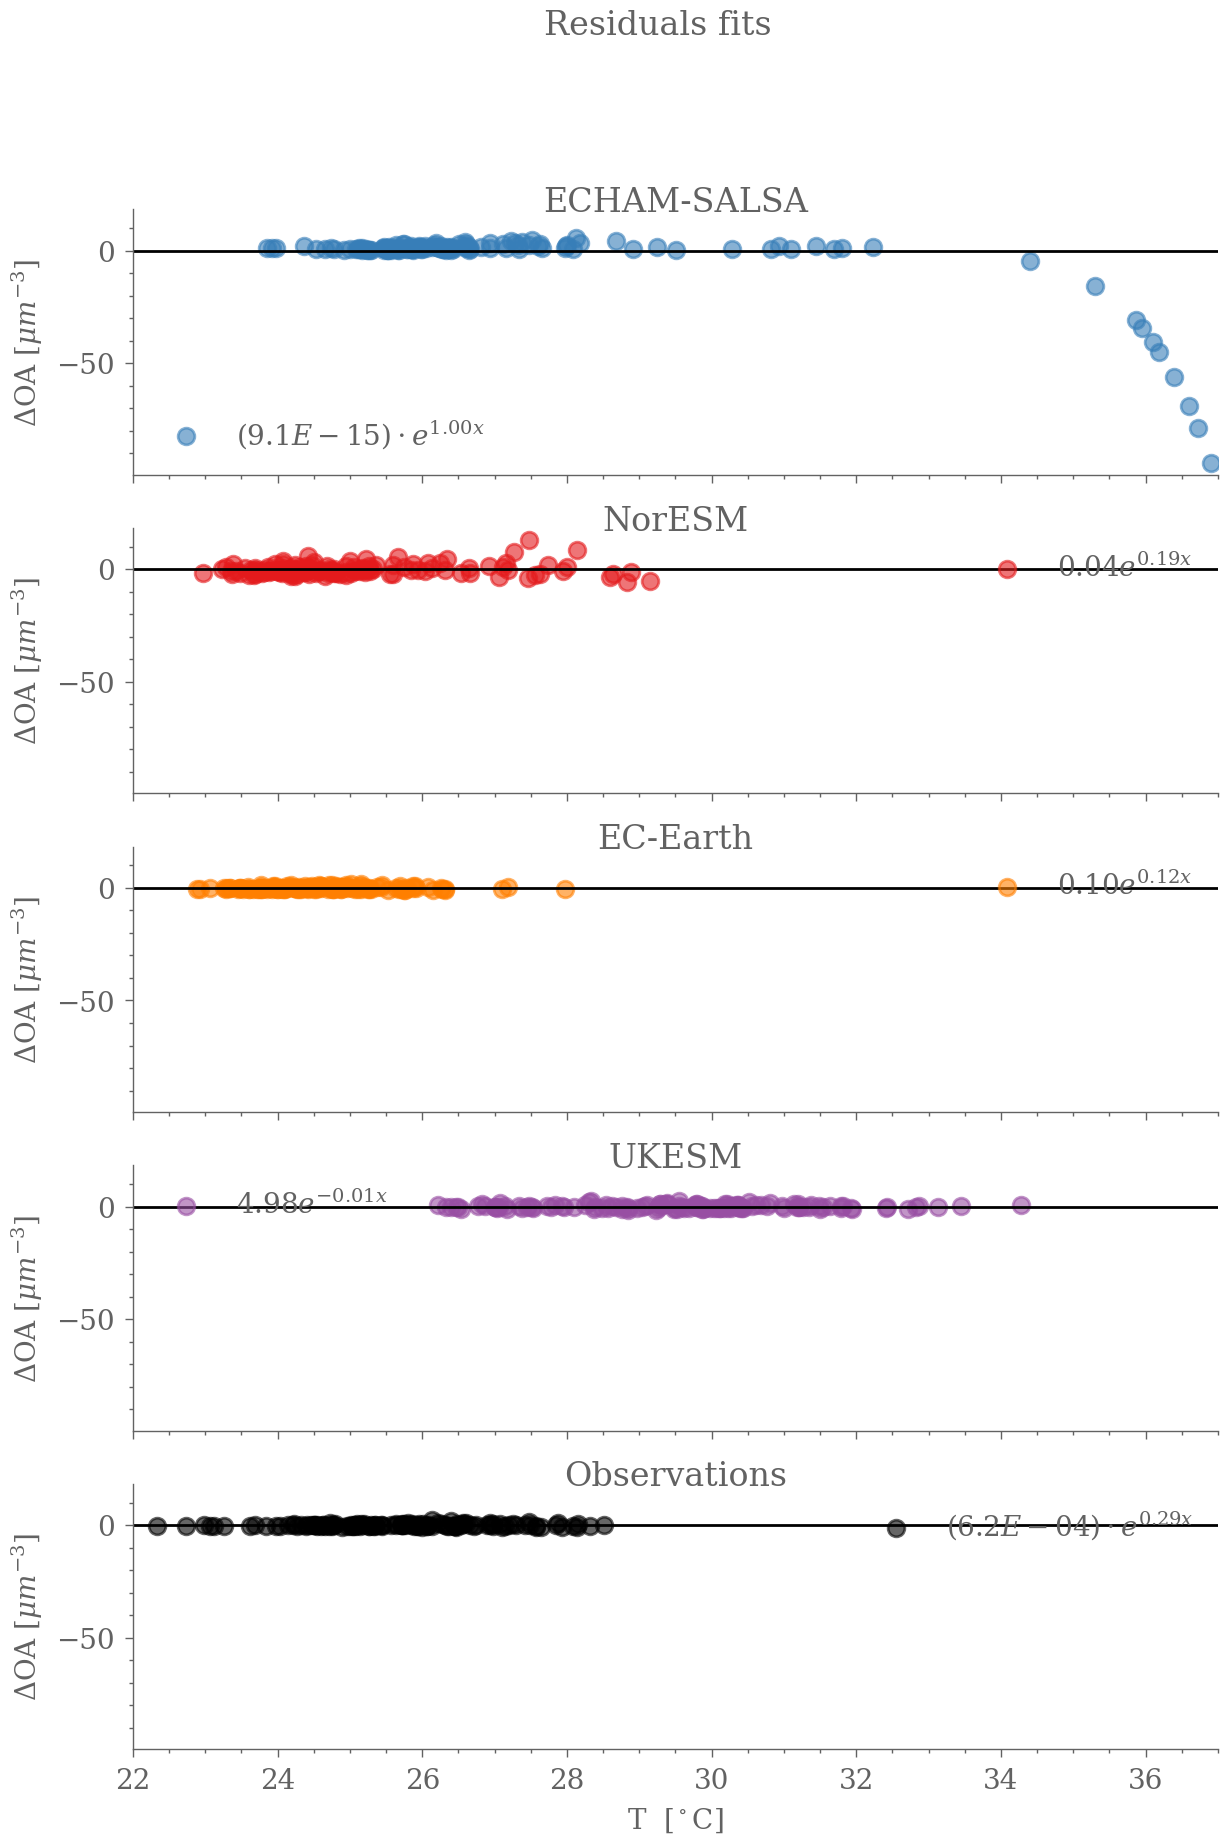

In [70]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'MAM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### JFM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 45.15)
(0.0, 50.4)
(0.0, 55.65)
(0.0, 55.65)
(0.0, 55.65)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00238908 0.23304725]
Beta Std Error: [0.00229436 0.03367477]
Beta Covariance: [[ 7.86829212e-06 -1.15111578e-04]
 [-1.15111578e-04  1.69498796e-03]]
Residual Variance: 0.6690255343575647
Inverse Condition #: 0.03743036358352246
Reason(s) for Halting:
  Sum of squares convergence
[0.00238908 0.23304725]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00155993 0.32318757]
Beta Std Error: [0.00108747 0.02706415]
Beta Covariance: [[ 3.64461624e-06 -9.05714639e-05]
 [-9.05714639e-05  2.25736589e-03]]
Residual Variance: 0.324479087567441
Inverse Condition #: 0.01789840777185651
Reason(s) for Halting:
  Sum of squares convergence
[0.00155993 0.32318757]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [1.51473726e-04 3.84099907e-01]
Beta Std Error: [0.00017336 0.04614773]
Beta Covariance: [[ 5.11250230e-08 -1.36032080e-05]
 [-1.36032080e-05  3.62255504e-03]]
Residual Variance: 0.5878759429824583
Inverse Condition #: 0.0012532843175451034
Reason(s) for Halting:
  

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [4.43416231e-07 5.61382896e-01]
Beta Std Error: [6.23551828e-07 5.34659785e-02]
Beta Covariance: [[ 1.36642993e-12 -1.17090401e-07]
 [-1.17090401e-07  1.00460953e-02]]
Residual Variance: 0.2845494479943975
Inverse Condition #: 4.942182495676434e-06
Reason(s) for Halting:
  Sum of squares convergence
[4.43416231e-07 5.61382896e-01]
reason for haltng


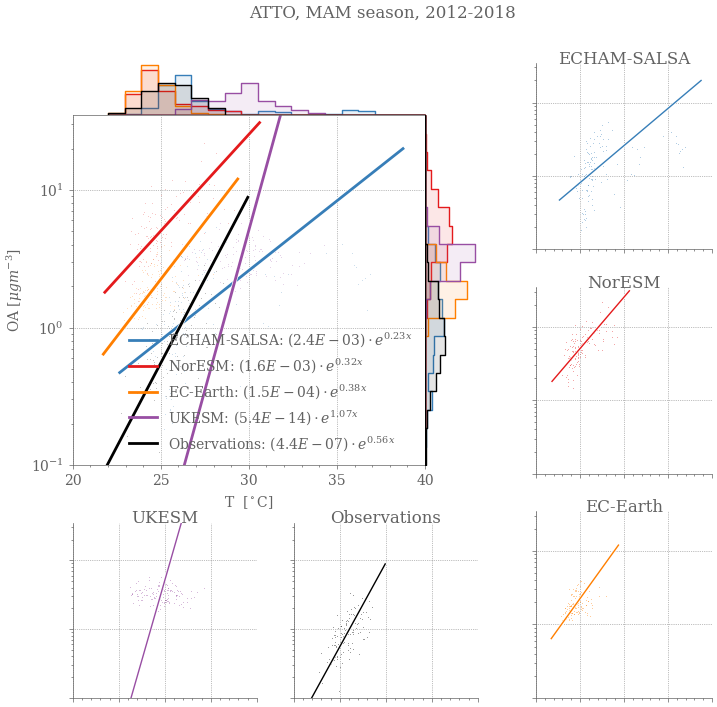

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [71]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    ax_ex.set_ylim(ylims)
    ax_ex.set_xlim(xlims)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
Going for least square
NorESM
Going for least square
EC-Earth
Going for least square
UKESM
Going for least square
Observations
Going for least square
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_JFM_ATTO_T_C_OA-ATTO_ukesm_lev-2.png


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


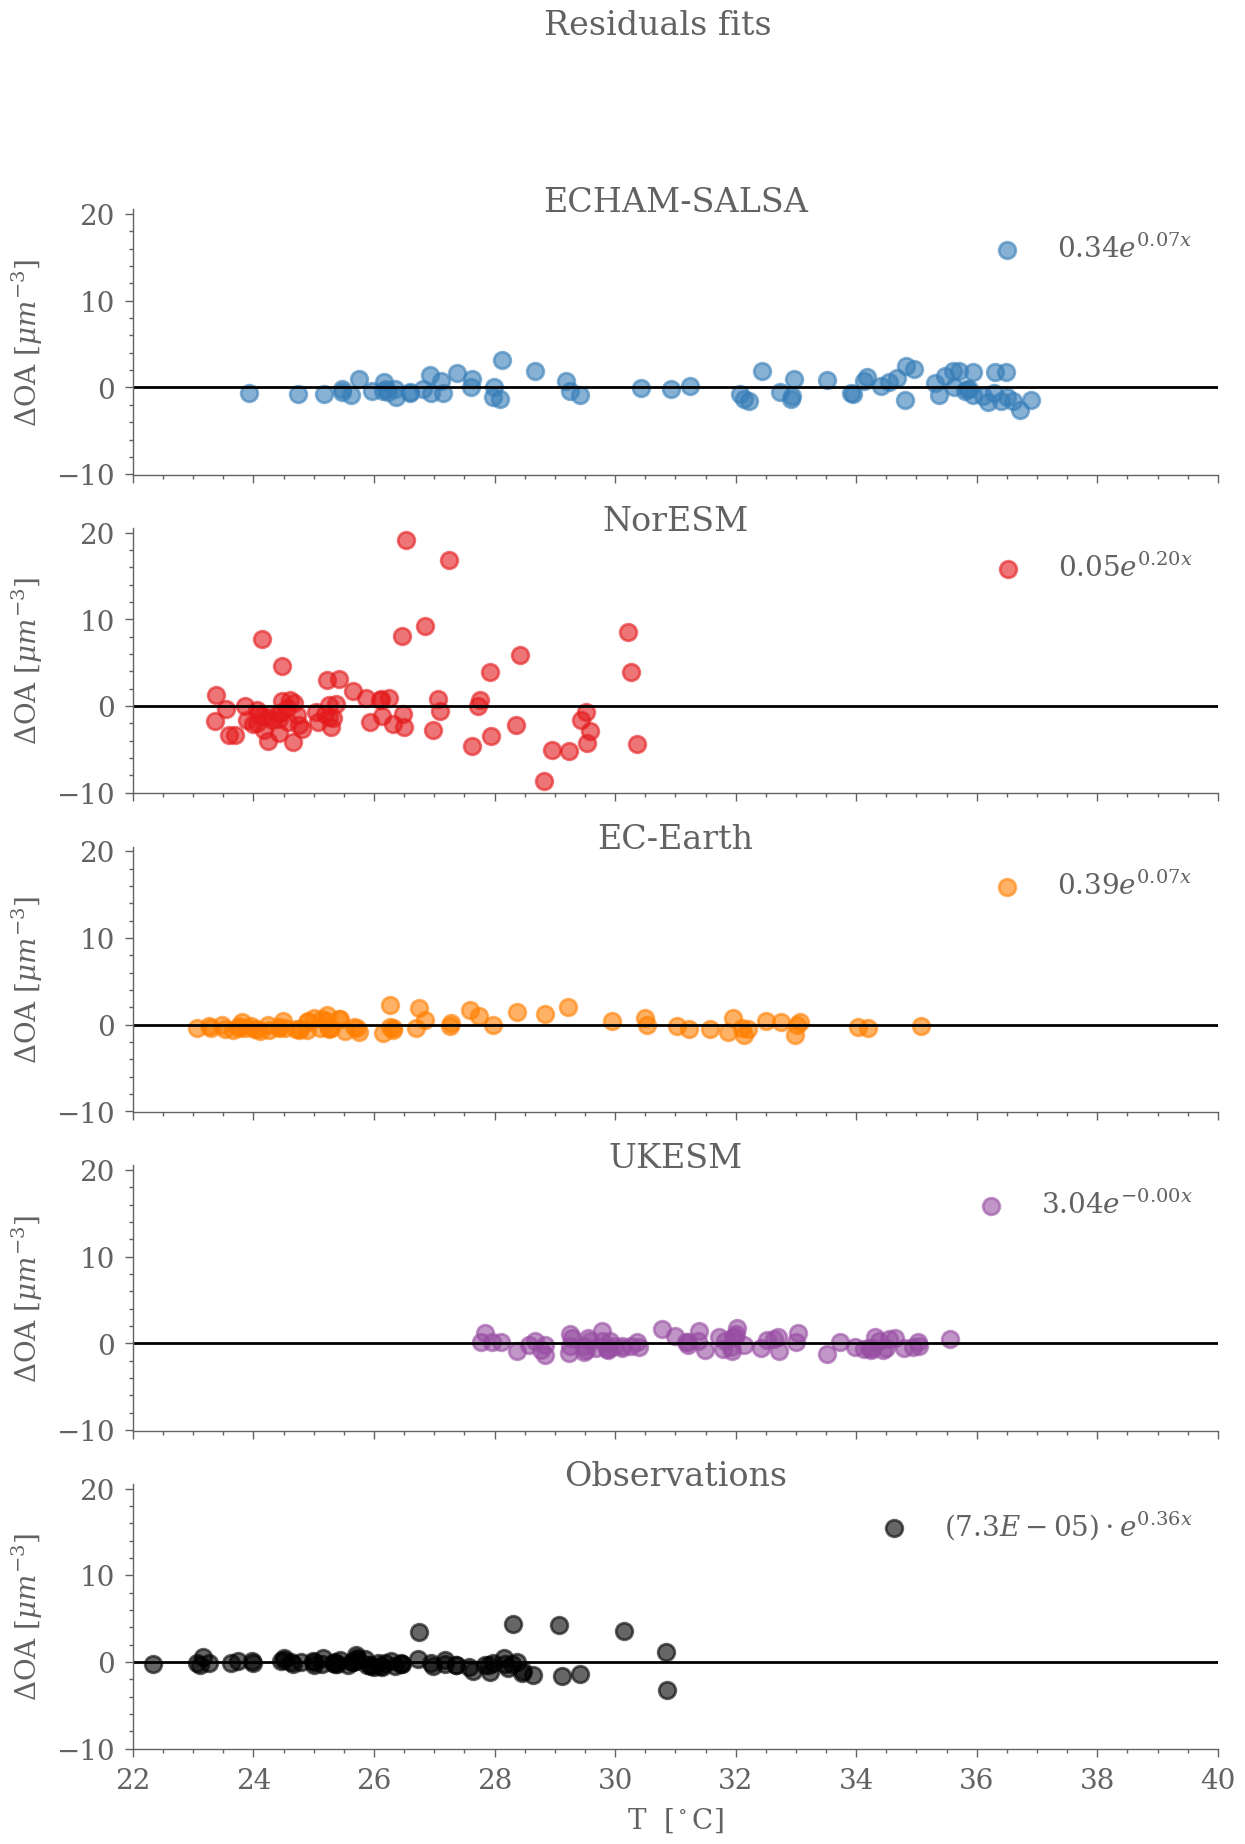

In [72]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'JFM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00238908 0.23304725]
Beta Std Error: [0.00229436 0.03367477]
Beta Covariance: [[ 7.86829212e-06 -1.15111578e-04]
 [-1.15111578e-04  1.69498796e-03]]
Residual Variance: 0.6690255343575647
Inverse Condition #: 0.03743036358352246
Reason(s) for Halting:
  Sum of squares convergence
[0.00238908 0.23304725]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00155993 0.32318757]
Beta Std Error: [0.00108747 0.02706415]
Beta Covariance: [[ 3.64461624e-06 -9.05714639e-05]
 [-9.05714639e-05  2.25736589e-03]]
Residual Variance: 0.324479087567441
Inverse Condition #: 0.01789840777185651
Reason(s) for Halting:
  Sum of squares convergence
[0.00155993 0.32318757]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [1.51473726e-04 3.84099907e-01]
Beta Std Error: [0.00017336 0.04614773]
Beta Covariance: [[ 5.11250230e-08 -1.36032080e-05]
 [-1.36032080e-05  3.62255504e-03]]
Residual Variance: 0.5878759429824583
Inverse Condition #: 0.0012532843175451034
Reason(s) for Halting:
  

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [4.43416231e-07 5.61382896e-01]
Beta Std Error: [6.23551828e-07 5.34659785e-02]
Beta Covariance: [[ 1.36642993e-12 -1.17090401e-07]
 [-1.17090401e-07  1.00460953e-02]]
Residual Variance: 0.2845494479943975
Inverse Condition #: 4.942182495676434e-06
Reason(s) for Halting:
  Sum of squares convergence
[4.43416231e-07 5.61382896e-01]
reason for haltng
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_MAM_ATTO_T_C_OA-ATTO_ukesm_lev-2.png


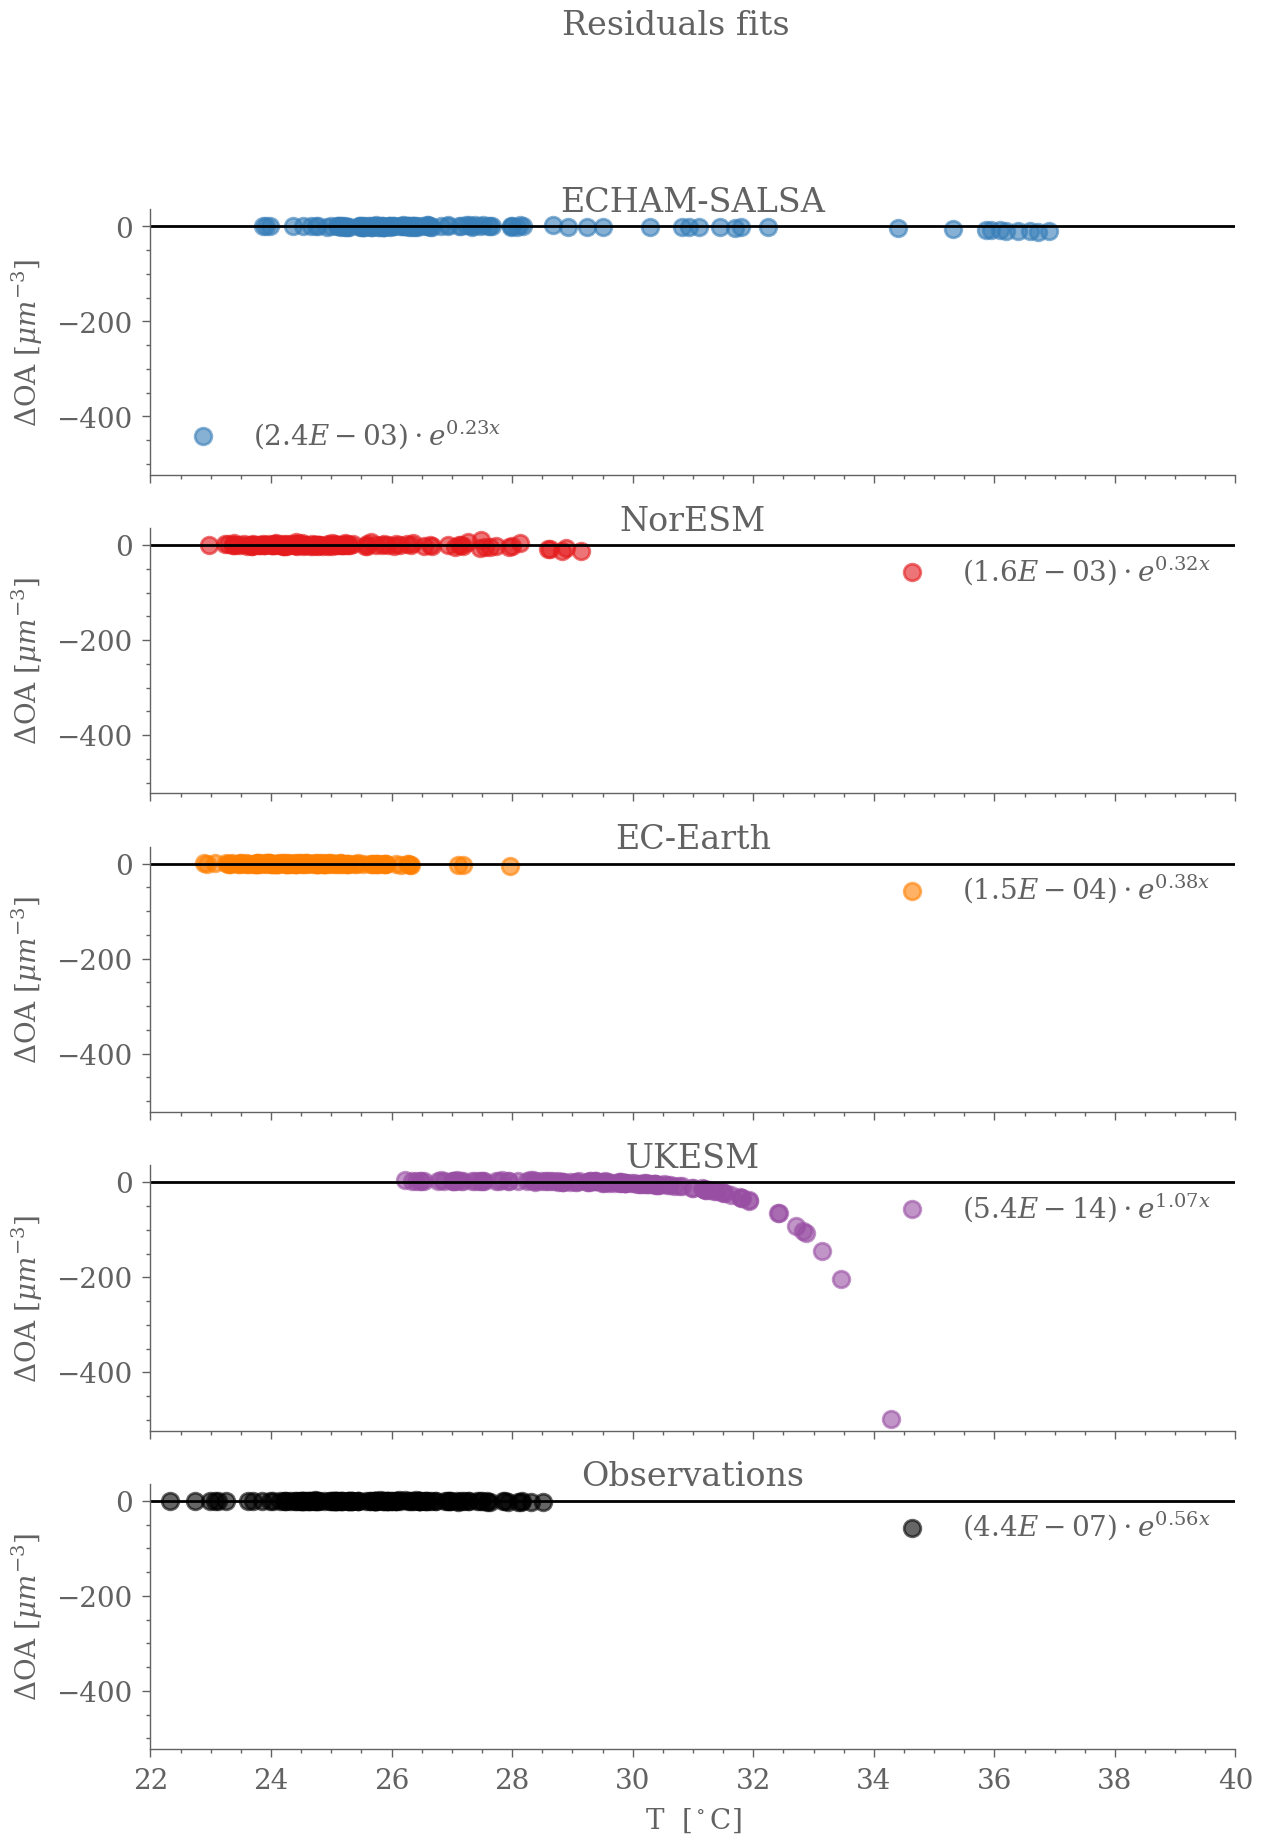

In [73]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'MAM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### JFM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 13.65)
(0.0, 25.2)
(0.0, 25.2)
(0.0, 25.2)
(0.0, 25.2)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.03586427 0.13540329]
Beta Std Error: [0.02156106 0.01820333]
Beta Covariance: [[ 0.00117839 -0.00099034]
 [-0.00099034  0.00083995]]
Residual Variance: 0.39450299815638884
Inverse Condition #: 0.0063099297874999035
Reason(s) for Halting:
  Sum of squares convergence
[0.03586427 0.13540329]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00183716 0.31990658]
Beta Std Error: [0.00165913 0.03341304]
Beta Covariance: [[ 1.02641545e-05 -2.06272172e-04]
 [-2.06272172e-04  4.16290092e-03]]
Residual Variance: 0.26818582568830024
Inverse Condition #: 0.024858483508158478
Reason(s) for Halting:
  Sum of squares convergence
[0.00183716 0.31990658]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.10159794 0.11493704]
Beta Std Error: [0.0371765  0.01294813]
Beta Covariance: [[ 0.0038718  -0.00134092]
 [-0.00134092  0.00046967]]
Residual Variance: 0.35696365318509793
Inverse Condition #: 0.00299636708043840

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Beta: [0.0021865  0.22874064]
Beta Std Error: [0.00465653 0.06755122]
Beta Covariance: [[ 2.14201886e-05 -3.10597428e-04]
 [-3.10597428e-04  4.50780592e-03]]
Residual Variance: 1.0122811914848164
Inverse Condition #: 0.013797367714023462
Reason(s) for Halting:
  Sum of squares convergence
[0.0021865  0.22874064]
reason for haltng
Observations
[0.01, 0.12]
Beta: [3.13602335e-07 5.59072324e-01]
Beta Std Error: [4.97496889e-07 5.68687377e-02]
Beta Covariance: [[ 1.69644422e-12 -1.93658059e-07]
 [-1.93658059e-07  2.21669542e-02]]
Residual Variance: 0.14589525047192292
Inverse Condition #: 5.454920544054264e-06
Reason(s) for Halting:
  Sum of squares convergence
[3.13602335e-07 5.59072324e-01]
reason for haltng


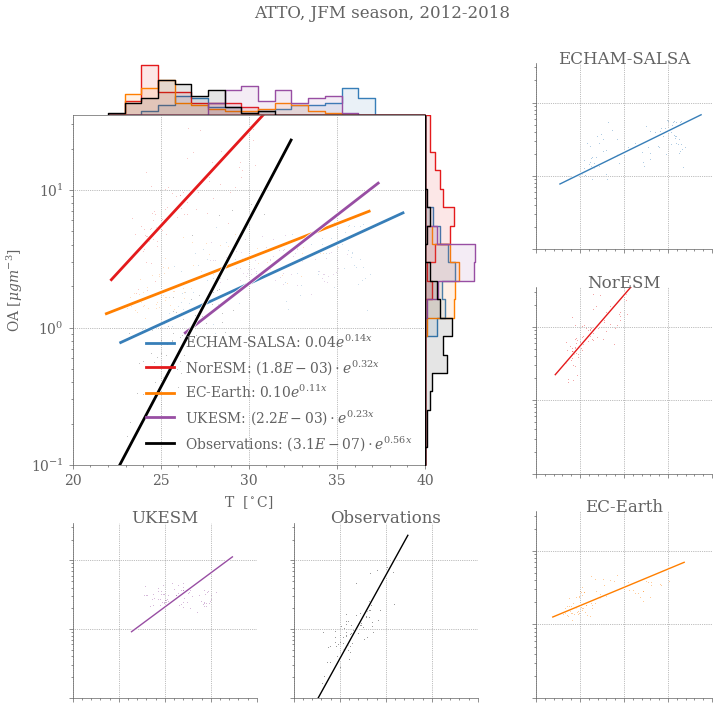

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [74]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JFM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    ax_ex.set_ylim(ylims)
    ax_ex.set_xlim(xlims)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
[0.01, 0.12]
Beta: [0.03586427 0.13540329]
Beta Std Error: [0.02156106 0.01820333]
Beta Covariance: [[ 0.00117839 -0.00099034]
 [-0.00099034  0.00083995]]
Residual Variance: 0.39450299815638884
Inverse Condition #: 0.0063099297874999035
Reason(s) for Halting:
  Sum of squares convergence
[0.03586427 0.13540329]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00183716 0.31990658]
Beta Std Error: [0.00165913 0.03341304]
Beta Covariance: [[ 1.02641545e-05 -2.06272172e-04]
 [-2.06272172e-04  4.16290092e-03]]
Residual Variance: 0.26818582568830024
Inverse Condition #: 0.024858483508158478
Reason(s) for Halting:
  Sum of squares convergence
[0.00183716 0.31990658]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.10159794 0.11493704]
Beta Std Error: [0.0371765  0.01294813]
Beta Covariance: [[ 0.0038718  -0.00134092]
 [-0.00134092  0.00046967]]
Residual Variance: 0.35696365318509793
Inverse Condition #: 0.002996367080438405
Reason(s) for Halting:
  Sum of squares convergence
[0.1015

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [3.13602335e-07 5.59072324e-01]
Beta Std Error: [4.97496889e-07 5.68687377e-02]
Beta Covariance: [[ 1.69644422e-12 -1.93658059e-07]
 [-1.93658059e-07  2.21669542e-02]]
Residual Variance: 0.14589525047192292
Inverse Condition #: 5.454920544054264e-06
Reason(s) for Halting:
  Sum of squares convergence
[3.13602335e-07 5.59072324e-01]
reason for haltng
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_JFM_ATTO_T_C_OA-ATTO_ukesm_lev-2.png


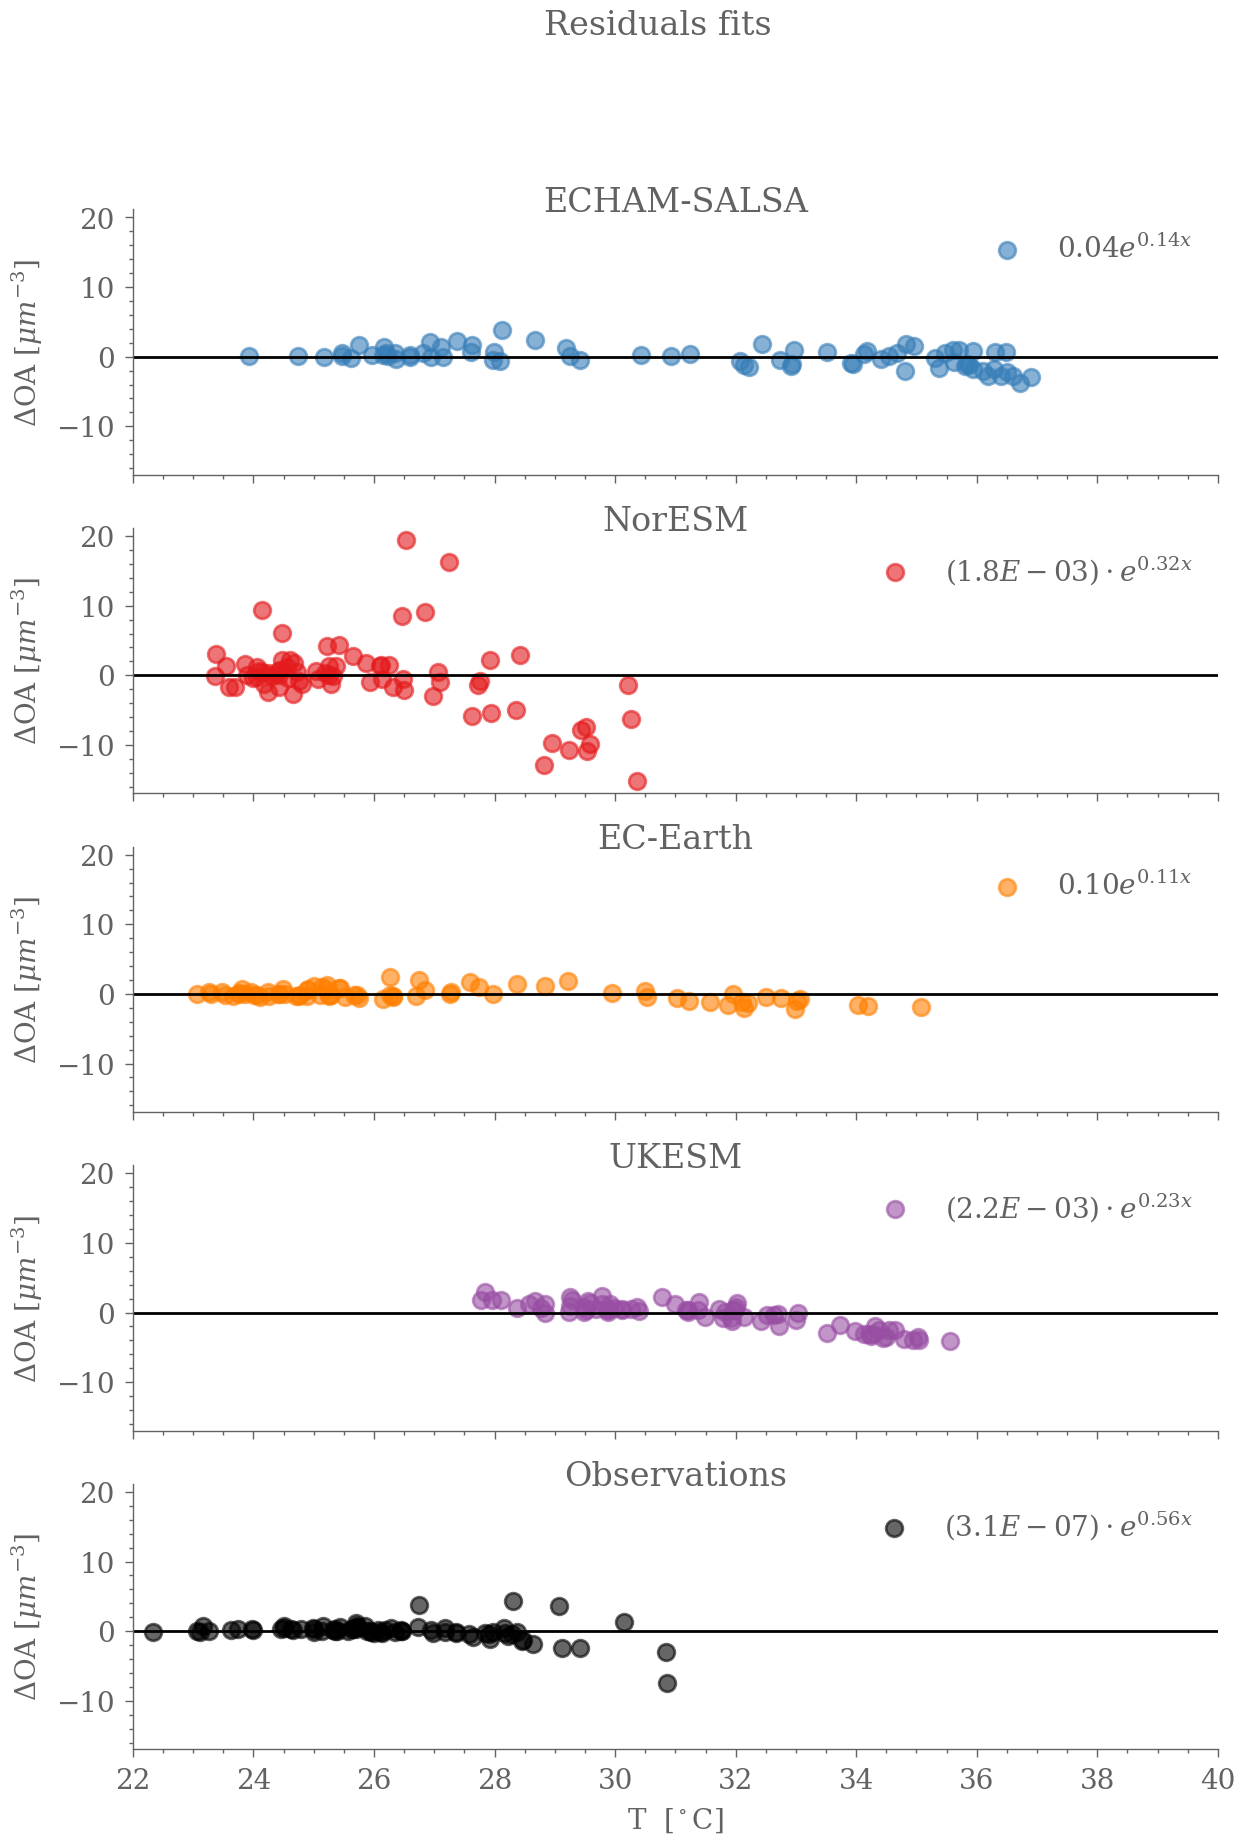

In [75]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'JFM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### DJF

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 15.75)
(0.0, 18.9)
(0.0, 18.9)
(0.0, 21.0)
(0.0, 21.0)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.01152686 0.16959085]
Beta Std Error: [0.00688873 0.01752369]
Beta Covariance: [[ 0.00023895 -0.00060609]
 [-0.00060609  0.00154625]]
Residual Variance: 0.1985967605882016
Inverse Condition #: 0.013462942938053734
Reason(s) for Halting:
  Sum of squares convergence
[0.01152686 0.16959085]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.02306958 0.22824865]
Beta Std Error: [0.02574397 0.03999017]
Beta Covariance: [[ 0.0009722  -0.0015082 ]
 [-0.0015082   0.00234592]]
Residual Variance: 0.681701444618558
Inverse Condition #: 0.005931381997135916
Reason(s) for Halting:
  Sum of squares convergence
[0.02306958 0.22824865]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.25294883 0.08567791]

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month



Beta Std Error: [0.11476297 0.01489116]
Beta Covariance: [[ 0.01827437 -0.00236487]
 [-0.00236487  0.00030768]]
Residual Variance: 0.7207110691074973
Inverse Condition #: 0.0007820982537055347
Reason(s) for Halting:
  Sum of squares convergence
[0.25294883 0.08567791]
reason for haltng
UKESM
[0.01, 0.12]
Beta: [0.02474577 0.14886737]
Beta Std Error: [0.02239926 0.02630581]
Beta Covariance: [[ 0.0006202  -0.00072764]
 [-0.00072764  0.0008554 ]]
Residual Variance: 0.8089735156977075
Inverse Condition #: 0.003995348263450699
Reason(s) for Halting:
  Sum of squares convergence
[0.02474577 0.14886737]
reason for haltng
Observations
[0.01, 0.12]
Beta: [1.68639306e-14 1.15689110e+00]
Beta Std Error: [3.48264347e-15 0.00000000e+00]
Beta Covariance: [[3.87145035e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 0.31328841801763485
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[1.68639306e-14 1.15689110

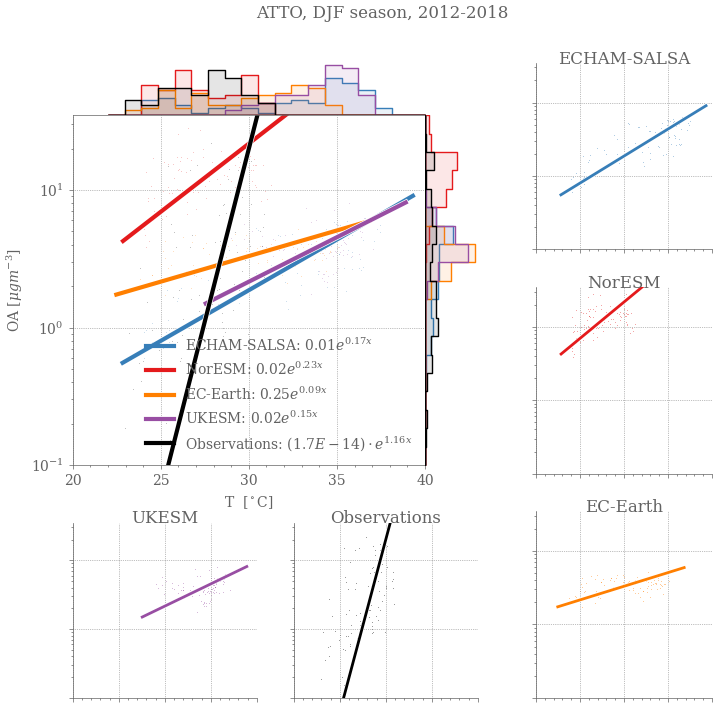

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [76]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


linewidth=2
xlims = [22,40]
ylims = [.1,35]


season='DJF'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 45.15)
(0.0, 57.75)
(0.0, 57.75)
(0.0, 57.75)
(0.0, 57.75)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.01967687 0.15558773]
Beta Std Error: [0.0083219 0.0135978]
Beta Covariance: [[ 0.00018426 -0.00029912]
 [-0.00029912  0.00049194]]
Residual Variance: 0.3758586803822018
Inverse Condition #: 0.013797384221097699
Reason(s) for Halting:
  Sum of squares convergence
[0.01967687 0.15558773]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00130369 0.33131898]
Beta Std Error: [0.00077872 0.02248487]
Beta Covariance: [[ 2.37608276e-06 -6.84665501e-05]
 [-6.84665501e-05  1.98100267e-03]]
Residual Variance: 0.2552088503442935
Inverse Condition #: 0.019186666323075873
Reason(s) for Halting:
  Sum of squares convergence
[0.00130369 0.33131898]
reason for haltng
EC-Earth
[0.01, 0.12]


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Beta: [0.10147162 0.11938126]
Beta Std Error: [0.02840358 0.01053821]
Beta Covariance: [[ 0.0017236  -0.00063657]
 [-0.00063657  0.00023726]]
Residual Variance: 0.46807016379963007
Inverse Condition #: 0.002867061014077809
Reason(s) for Halting:
  Sum of squares convergence
[0.10147162 0.11938126]
reason for haltng
UKESM
[0.01, 0.12]
Beta: [5.38165518e-14 1.04519010e+00]
Beta Std Error: [1.01644136e-14 0.00000000e+00]
Beta Covariance: [[9.97097929e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 1.0361600538662603
Inverse Condition #: 1.0000000000000002
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[5.38165518e-14 1.04519010e+00]
reason for haltng
Observations


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [2.86202048e-06 4.86441838e-01]
Beta Std Error: [2.72845556e-06 3.51231094e-02]
Beta Covariance: [[ 3.79908910e-11 -4.88446088e-07]
 [-4.88446088e-07  6.29552023e-03]]
Residual Variance: 0.19595407044458074
Inverse Condition #: 4.6369794991616004e-05
Reason(s) for Halting:
  Sum of squares convergence
[2.86202048e-06 4.86441838e-01]
reason for haltng


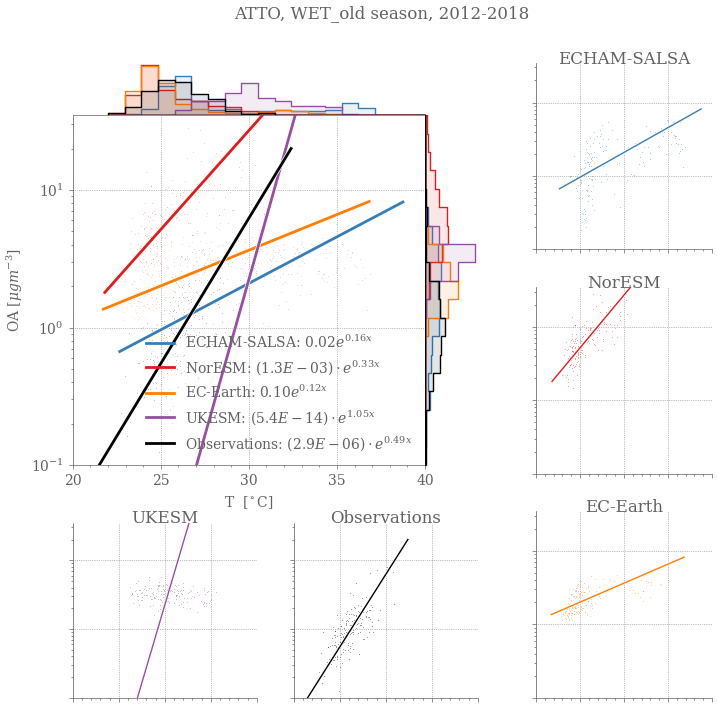

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [77]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='WET_old'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_mid

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 45.15)
(0.0, 52.5)
(0.0, 55.65)
(0.0, 55.65)
(0.0, 55.65)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00437365 0.21020503]
Beta Std Error: [0.00347903 0.02743059]
Beta Covariance: [[ 1.97764007e-05 -1.55352715e-04]
 [-1.55352715e-04  1.22941966e-03]]
Residual Variance: 0.6120262235684801
Inverse Condition #: 0.035195206439007864
Reason(s) for Halting:
  Sum of squares convergence
[0.00437365 0.21020503]
reason for haltng
NorESM


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [0.00363924 0.28920712]
Beta Std Error: [0.0019964  0.02104994]
Beta Covariance: [[ 1.46233918e-05 -1.53890574e-04]
 [-1.53890574e-04  1.62575694e-03]]
Residual Variance: 0.27254994177587555
Inverse Condition #: 0.02990561963354368
Reason(s) for Halting:
  Sum of squares convergence
[0.00363924 0.28920712]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.00143577 0.29256449]
Beta Std Error: [0.00099745 0.02767393]
Beta Covariance: [[ 2.24803023e-06 -6.23183021e-05]
 [-6.23183021e-05  1.73046308e-03]]
Residual Variance: 0.44256733281295735
Inverse Condition #: 0.012556057753690182
Reason(s) for Halting:
  Sum of squares convergence
[0.00143577 0.29256449]
reason for haltng
UKESM
[0.01, 0.12]
Beta: [0.00314299 0.23357245]
Beta Std Error: [0.00443186 0.04728636]
Beta Covariance: [[ 1.92675579e-05 -2.05487211e-04]
 [-2.05487211e-04  2.19344263e-03]]
Residual Variance: 1.019401964983868
Inverse Condition #: 0.014176072223953163
Reason(s) for Halting:
  Sum of squares conv

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


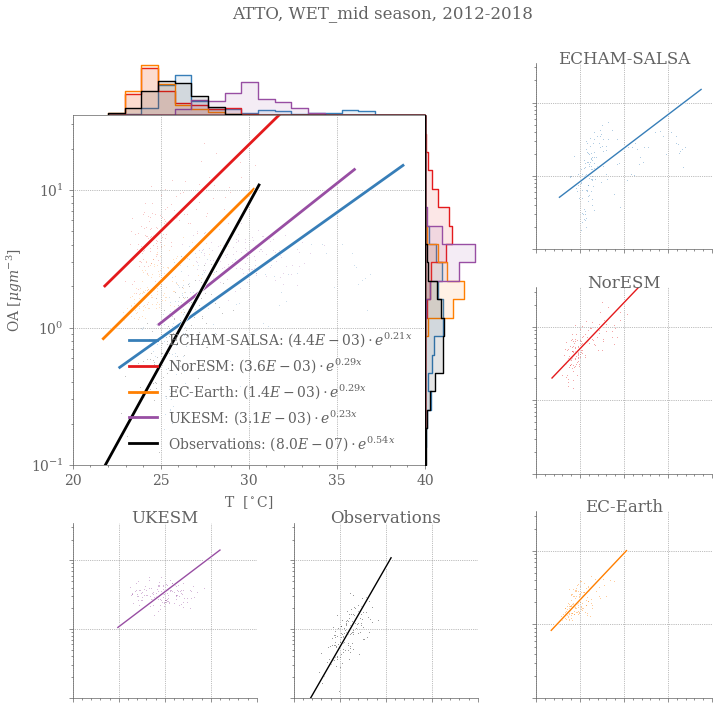

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [78]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='WET_mid'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### SON

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 21.0)
(0.0, 47.25)
(0.0, 47.25)
(0.0, 47.25)
(0.0, 47.25)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


ECHAM-SALSA
[0.01, 0.12]
Beta: [1.33150051e-12 8.43162210e-01]
Beta Std Error: [2.09200283e-11 4.48299626e-01]
Beta Covariance: [[ 1.06667003e-21 -2.28567096e-11]
 [-2.28567096e-11  4.89826538e-01]]
Residual Variance: 0.4102933162857935
Inverse Condition #: 5.698836779178345e-12
Reason(s) for Halting:
  Iteration limit reached
[1.33150051e-12 8.43162210e-01]
reason for haltng
Going for least square
NorESM
[0.01, 0.12]
Beta: [ 3.06631484e+03 -1.75561105e-01]
Beta Std Error: [2.06238924e+03 2.26656691e-02]
Beta Covariance: [[ 6.33925247e+06 -6.95425066e+01]
 [-6.95425066e+01  7.65656316e-04]]
Residual Variance: 0.6709701803048979
Inverse Condition #: 5.503669521145379e-08
Reason(s) for Halting:
  Sum of squares convergence
[ 3.06631484e+03 -1.75561105e-01]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [5.23932566e-14 9.49942405e-01]
Beta Std Error: [1.10319637e-14 0.00000000e+00]
Beta Covariance: [[1.15682306e-28 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 1.0520

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


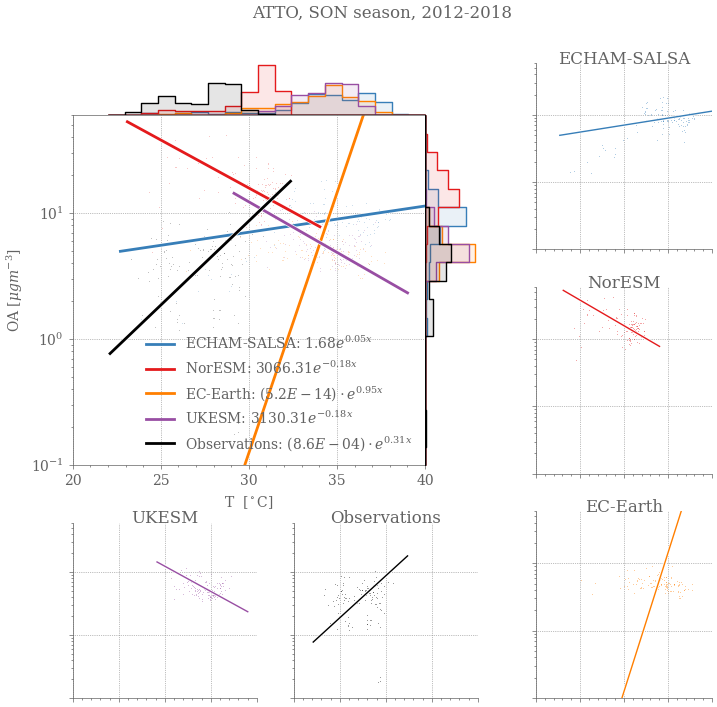

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [79]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,60]


season='SON'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 45.15)
(0.0, 50.4)
(0.0, 55.65)
(0.0, 55.65)
(0.0, 55.65)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00238908 0.23304725]
Beta Std Error: [0.00229436 0.03367477]
Beta Covariance: [[ 7.86829212e-06 -1.15111578e-04]
 [-1.15111578e-04  1.69498796e-03]]
Residual Variance: 0.6690255343575647
Inverse Condition #: 0.03743036358352246
Reason(s) for Halting:
  Sum of squares convergence
[0.00238908 0.23304725]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00155993 0.32318757]
Beta Std Error: [0.00108747 0.02706415]
Beta Covariance: [[ 3.64461624e-06 -9.05714639e-05]
 [-9.05714639e-05  2.25736589e-03]]
Residual Variance: 0.324479087567441
Inverse Condition #: 0.01789840777185651
Reason(s) for Halting:
  Sum of squares convergence
[0.00155993 0.32318757]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [1.51473726e-04 3.84099907e-01]
Beta Std Error: [0.00017336 0.04614773]
Beta Covariance: [[ 5.11250230e-08 -1.36032080e-05]
 [-1.36032080e-05  3.62255504e-03]]
Residual Variance: 0.5878759429824583
Inve

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [5.41923142e-14 1.07249557e+00]
Beta Std Error: [9.10892803e-15 0.00000000e+00]
Beta Covariance: [[8.04601489e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 1.03122565681868
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[5.41923142e-14 1.07249557e+00]
reason for haltng
Observations
[0.01, 0.12]
Beta: [4.43416231e-07 5.61382896e-01]
Beta Std Error: [6.23551828e-07 5.34659785e-02]
Beta Covariance: [[ 1.36642993e-12 -1.17090401e-07]
 [-1.17090401e-07  1.00460953e-02]]
Residual Variance: 0.2845494479943975
Inverse Condition #: 4.942182495676434e-06
Reason(s) for Halting:
  Sum of squares convergence
[4.43416231e-07 5.61382896e-01]
reason for haltng


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


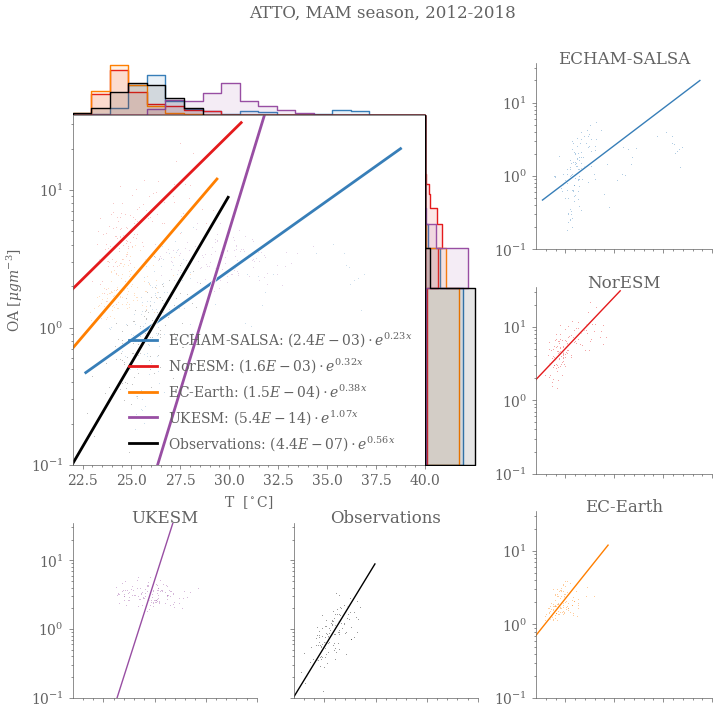

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [80]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JJA

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 42.0)
(0.0, 43.05)
(0.0, 43.05)
(0.0, 43.05)
(0.0, 43.05)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.0029175  0.26281047]
Beta Std Error: [0.00138771 0.01643775]
Beta Covariance: [[ 8.74129555e-06 -1.03345415e-04]
 [-1.03345415e-04  1.22648450e-03]]
Residual Variance: 0.22030416178886006
Inverse Condition #: 0.03018826614820815
Reason(s) for Halting:
  Sum of squares convergence
[0.0029175  0.26281047]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.04410556 0.20058296]
Beta Std Error: [0.02758246 0.02194879]
Beta Covariance: [[ 0.00127645 -0.00101461]
 [-0.00101461  0.00080828]]
Residual Variance: 0.5960211117460681
Inverse Condition #: 0.0029366617997846883
Reason(s) for Halting:
  Sum of squares convergence
[0.04410556 0.20058296]
reason for haltng
EC-Earth
[0.01, 0.12]


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Beta: [0.3312443  0.09146024]
Beta Std Error: [0.06475956 0.00682597]
Beta Covariance: [[ 0.01269647 -0.00133021]
 [-0.00133021  0.00014106]]
Residual Variance: 0.3303123576969124
Inverse Condition #: 0.0009549651014298067
Reason(s) for Halting:
  Sum of squares convergence
[0.3312443  0.09146024]
reason for haltng
UKESM
[0.01, 0.12]
Beta: [0.15507076 0.11942434]
Beta Std Error: [0.05746846 0.01229338]
Beta Covariance: [[ 0.00581082 -0.00124113]
 [-0.00124113  0.0002659 ]]
Residual Variance: 0.5683572196024291
Inverse Condition #: 0.0009681644522775441
Reason(s) for Halting:
  Sum of squares convergence
[0.15507076 0.11942434]
reason for haltng
Observations
[0.01, 0.12]
Beta: [2.68062320e-05 4.28350245e-01]
Beta Std Error: [2.94976283e-05 3.98423079e-02]
Beta Covariance: [[ 2.78784550e-09 -3.76135259e-06]
 [-3.76135259e-06  5.08608344e-03]]
Residual Variance: 0.31210842714005543
Inverse Condition #: 0.0004148511907434478
Reason(s) for Halting:
  Sum of squares convergence
[2.68062320e-

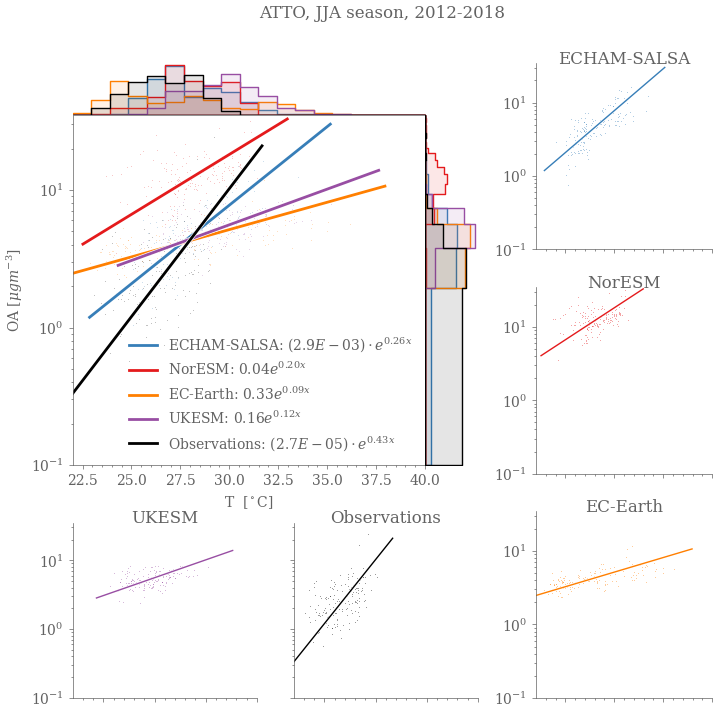

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [81]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JJA'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JF

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 8.4)
(0.0, 8.4)
(0.0, 8.4)
(0.0, 9.45)
(0.0, 10.5)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00150216 0.22665201]
Beta Std Error: [0.00223166 0.04301904]
Beta Covariance: [[ 1.31802641e-05 -2.53816139e-04]
 [-2.53816139e-04  4.89765925e-03]]
Residual Variance: 0.3778617673088716
Inverse Condition #: 0.017502860755585617
Reason(s) for Halting:
  Sum of squares convergence
[0.00150216 0.22665201]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00363332 0.29680003]
Beta Std Error: [0.00616868 0.06106336]
Beta Covariance: [[ 8.84169366e-05 -8.74005117e-04]
 [-8.74005117e-04  8.66388120e-03]]
Residual Variance: 0.4303768631316107
Inverse Condition #: 0.024516397706056774
Reason(s) for Halting:
  Sum of squares convergence
[0.00363332 0.29680003]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.18278431 0.09588615]
Beta Std Error: [0.16337407 0.02970163]
Beta Covariance: [[ 0.03070087 -0.00556909]
 [-0.00556909  0.00101472]]
Residual Variance: 0.869391780327481
Inverse Condition #: 0.0009941216553776087
Reason(s) for Halting:
  Sum of squares converg

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


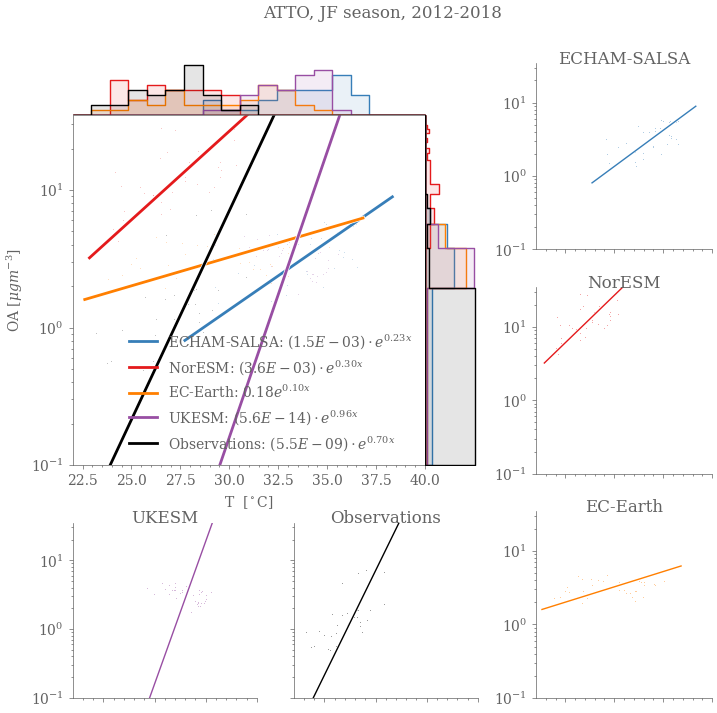

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [82]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JF'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_mid

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 35.7)
(0.0, 39.9)
(0.0, 39.9)
(0.0, 39.9)
(0.0, 39.9)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00437365 0.21020503]
Beta Std Error: [0.00347903 0.02743059]
Beta Covariance: [[ 1.97764007e-05 -1.55352715e-04]
 [-1.55352715e-04  1.22941966e-03]]
Residual Variance: 0.6120262235684801
Inverse Condition #: 0.035195206439007864
Reason(s) for Halting:
  Sum of squares convergence
[0.00437365 0.21020503]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00363924 0.28920712]
Beta Std Error: [0.0019964  0.02104994]
Beta Covariance: [[ 1.46233918e-05 -1.53890574e-04]
 [-1.53890574e-04  1.62575694e-03]]
Residual Variance: 0.27254994177587555
Inverse Condition #: 0.02990561963354368

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month



Reason(s) for Halting:
  Sum of squares convergence
[0.00363924 0.28920712]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.00143577 0.29256449]
Beta Std Error: [0.00099745 0.02767393]
Beta Covariance: [[ 2.24803023e-06 -6.23183021e-05]
 [-6.23183021e-05  1.73046308e-03]]
Residual Variance: 0.44256733281295735
Inverse Condition #: 0.012556057753690182
Reason(s) for Halting:
  Sum of squares convergence
[0.00143577 0.29256449]
reason for haltng
UKESM
[0.01, 0.12]
Beta: [0.00314299 0.23357245]
Beta Std Error: [0.00443186 0.04728636]
Beta Covariance: [[ 1.92675579e-05 -2.05487211e-04]
 [-2.05487211e-04  2.19344263e-03]]
Residual Variance: 1.019401964983868
Inverse Condition #: 0.014176072223953163
Reason(s) for Halting:
  Sum of squares convergence
[0.00314299 0.23357245]
reason for haltng
Observations
[0.01, 0.12]
Beta: [7.97965559e-07 5.37238308e-01]
Beta Std Error: [1.06691981e-06 5.07072465e-02]
Beta Covariance: [[ 3.75768649e-12 -1.78472348e-07]
 [-1.78472348e-07  8.48783714e-03]]


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


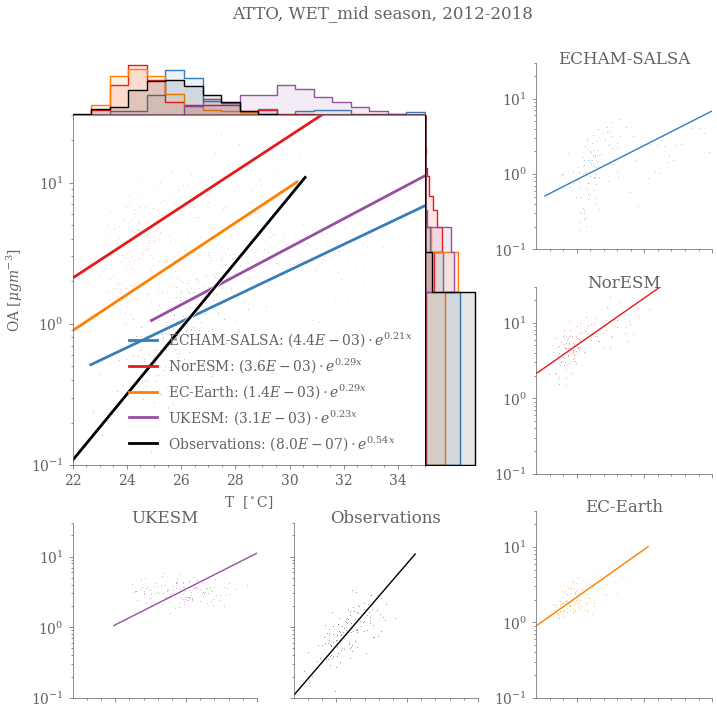

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [83]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,35]
ylims = [.1,30]


season='WET_mid'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 80.85)
(0.0, 80.85)
(0.0, 88.2)
(0.0, 88.2)
(0.0, 88.2)
ECHAM-SALSA


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [0.01544614 0.17767736]
Beta Std Error: [0.00742304 0.01602892]
Beta Covariance: [[ 8.75640772e-05 -1.88312342e-04]
 [-1.88312342e-04  4.08291728e-04]]
Residual Variance: 0.6292716368958499
Inverse Condition #: 0.013933469419644368
Reason(s) for Halting:
  Sum of squares convergence
[0.01544614 0.17767736]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00289343 0.30143301]
Beta Std Error: [0.00160759 0.02040341]
Beta Covariance: [[ 6.53031519e-06 -8.27657371e-05]
 [-8.27657371e-05  1.05194152e-03]]
Residual Variance: 0.39574354233902553
Inverse Condition #: 0.026454027603773505
Reason(s) for Halting:
  Sum of squares convergence
[0.00289343 0.30143301]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.12817795 0.11664822]
Beta Std Error: [0.0317822  0.00904284]
Beta Covariance: [[ 0.00171236 -0.00048513]
 [-0.00048513  0.00013862]]
Residual Variance: 0.5898913909503207
Inverse Condition #: 0.0021427727995040023
Reason(s) for Halting:
  Sum of squares convergence
[0.12

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Beta: [6.1182372e-09 7.2213658e-01]
Beta Std Error: [9.62070077e-09 5.64810395e-02]
Beta Covariance: [[ 3.54487458e-16 -2.07934816e-09]
 [-2.07934816e-09  1.22177947e-02]]
Residual Variance: 0.2611034081654752
Inverse Condition #: 8.429631404569253e-08
Reason(s) for Halting:
  Sum of squares convergence
[6.1182372e-09 7.2213658e-01]
reason for haltng


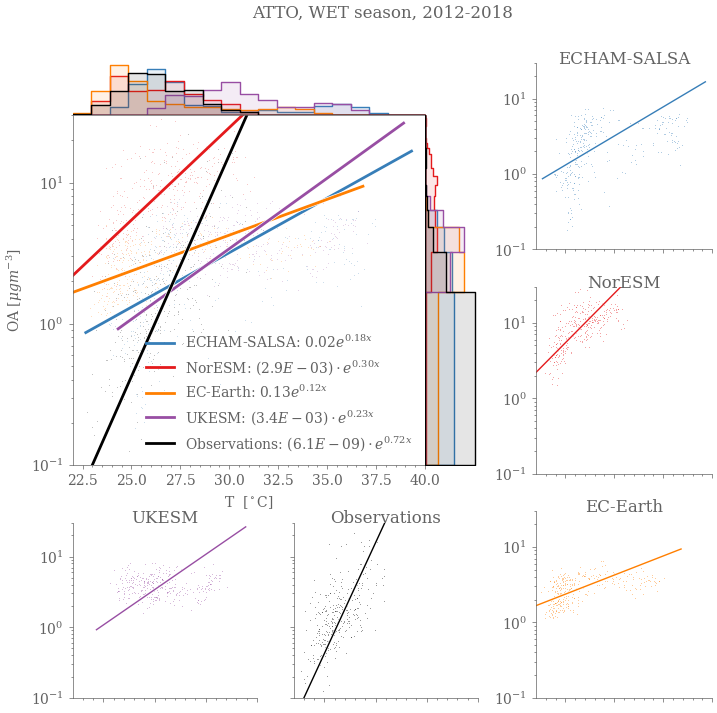

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [84]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',#xscale='log'
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_early

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 18.9)
(0.0, 30.45)
(0.0, 30.45)
(0.0, 30.45)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 30.45)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.02866127 0.14312093]
Beta Std Error: [0.0123513  0.01292848]
Beta Covariance: [[ 0.00054845 -0.00057134]
 [-0.00057134  0.0006009 ]]
Residual Variance: 0.27815627923122377
Inverse Condition #: 0.007889521998689081
Reason(s) for Halting:
  Sum of squares convergence
[0.02866127 0.14312093]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00762716 0.26679185]
Beta Std Error: [0.00635076 0.03029027]
Beta Covariance: [[ 8.94504766e-05 -4.25863411e-04]
 [-4.25863411e-04  2.03487148e-03]]
Residual Variance: 0.4508885379028674
Inverse Condition #: 0.017431592896864887
Reason(s) for Halting:
  Sum of squares convergence
[0.00762716 0.26679185]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.1348322  0.10571389]
Beta Std Error: [0.03970142 0.00998481]
Beta Covariance: [[ 0.00416468 -0.00104209]
 [-0.00104209  0.00026342]]
Residual Variance: 0.3784693470404985
Inverse Condition #: 0.002070078951077275
Reason(s) for Halting:
  Sum of squares convergen

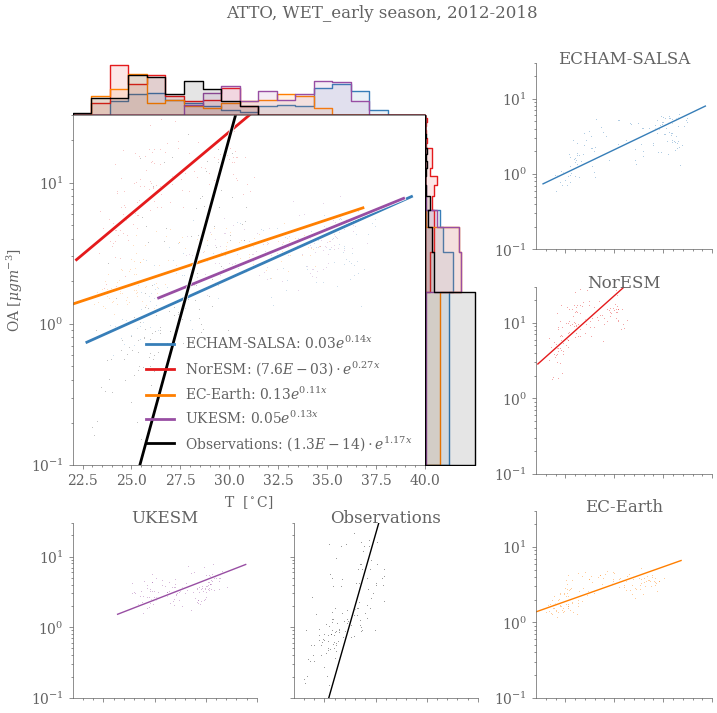

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [85]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET_early'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_late

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 67.2)
(0.0, 67.2)
(0.0, 72.45)
(0.0, 72.45)
(0.0, 72.45)
ECHAM-SALSA
[0.01, 0.12]


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Beta: [7.34865571e-08 6.44368766e-01]
Beta Std Error: [1.76782781e-07 8.84240892e-02]
Beta Covariance: [[ 4.79489862e-14 -2.39720383e-08]
 [-2.39720383e-08  1.19961171e-02]]
Residual Variance: 0.65177919312308
Inverse Condition #: 7.371312092008969e-07
Reason(s) for Halting:
  Sum of squares convergence
[7.34865571e-08 6.44368766e-01]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00109942 0.33672888]
Beta Std Error: [0.00082022 0.0275931 ]
Beta Covariance: [[ 1.95237063e-06 -6.56083349e-05]
 [-6.56083349e-05  2.20954110e-03]]
Residual Variance: 0.34458711185866037
Inverse Condition #: 0.012418552131429615
Reason(s) for Halting:
  Sum of squares convergence
[0.00109942 0.33672888]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.03950167 0.16978056]
Beta Std Error: [0.01521271 0.0148553 ]
Beta Covariance: [[ 0.00046496 -0.00045302]
 [-0.00045302  0.00044336]]
Residual Variance: 0.4977390796641376
Inverse Condition #: 0.00505199216979711
Reason(s) for Halting:
  Sum of squares convergen

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


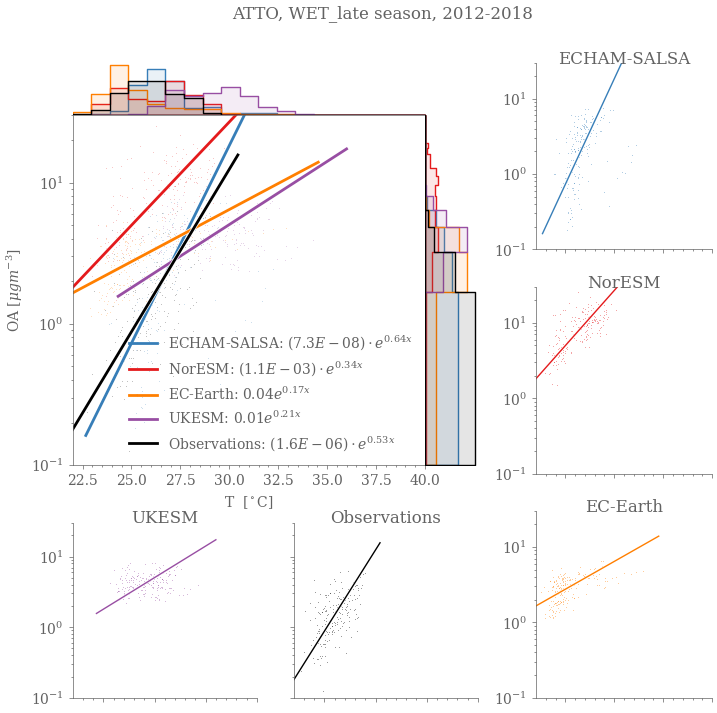

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [86]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET_late'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### DRY

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 21.0)
(0.0, 57.75)
(0.0, 57.75)
(0.0, 57.75)
(0.0, 57.75)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.02307223 0.17651379]
Beta Std Error: [0.01594017 0.02050565]
Beta Covariance: [[ 0.00047036 -0.00060406]
 [-0.00060406  0.00077839]]
Residual Variance: 0.5401977311306231
Inverse Condition #: 0.005669470913050239
Reason(s) for Halting:
  Sum of squares convergence
[0.02307223 0.17651379]
reason for haltng
NorESM


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[0.01, 0.12]
Beta: [4.18792666e-14 1.11672284e+00]
Beta Std Error: [6.30557381e-15 0.00000000e+00]
Beta Covariance: [[4.14105448e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 0.9601482248906119
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[4.18792666e-14 1.11672284e+00]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.02410955 0.16136286]
Beta Std Error: [0.02337254 0.02904278]
Beta Covariance: [[ 0.0005452  -0.00067689]
 [-0.00067689  0.00084182]]
Residual Variance: 1.0019800751174204
Inverse Condition #: 0.00385391745877218
Reason(s) for Halting:
  Sum of squares convergence
[0.02410955 0.16136286]
reason for haltng
UKESM
[0.01, 0.12]
Beta: [0.0156525  0.17684547]
Beta Std Error: [0.01580316 0.03017085]
Beta Covariance: [[ 0.00024304 -0.00046368]
 [-0.00046368  0.00088587]]
Residual Variance: 1.0275546920934047
Inverse Condition #: 0.005198915791061423
Reason(s) for Halting:
  Sum of squ

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


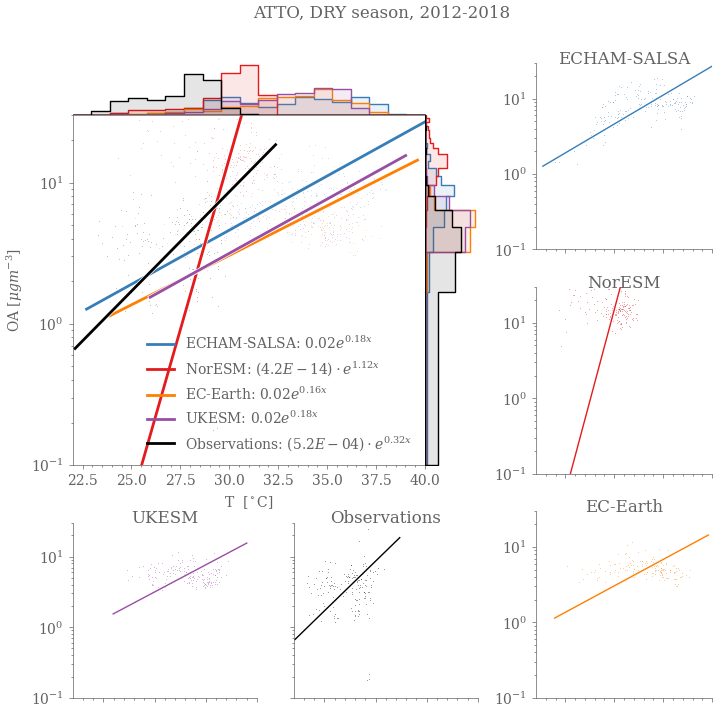

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [87]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='DRY'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [88]:
from bs_fdbck_clean.util.BSOA_datamanip.fits import *

In [89]:
import scipy

## OA to number

### Nx new version: Nx

In [90]:
def make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.4,
             source_list = models_and_obs, fig=None, 
               axs=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
               divide_NorESM_by_factor = None,
             ):
    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    for mo, ax in zip(source_list, axs[:]):
        df_s =  dic_df_med[mo]
        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
            df_s = df_s/divide_NorESM_by_factor
            title = f'{mo}/{divide_NorESM_by_factor}'
            ax.spines['bottom'].set_color('r')
            ax.spines['top'].set_color('r') 
            ax.spines['right'].set_color('red')
            ax.spines['left'].set_color('red')
            ax.set_title(title, y=.95, c='r')

        else:
            title = mo
            ax.set_title(title, y=.95)
            
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                    
                   )
        
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'{select_station}, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo,ax in zip(source_list, axs):

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        ax.set_ylim(ylims)
        ax.set_xlim(xlims)

        sns.despine(ax = ax)

    return

#### WET_mid

In [91]:
models_and_obs[::-1]

['Observations', 'UKESM', 'EC-Earth', 'NorESM', 'ECHAM-SALSA']

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Observations
[340.24954304  79.37828171]
Beta: [353.9223659   61.16835005]
Beta Std Error: [11.62720679 23.46463008]
Beta Covariance: [[ 3406.09145755 -4536.34685847]
 [-4536.34685847 13871.80373467]]
Residual Variance: 0.03969122365844455
Inverse Condition #: 0.33303882858180894
Reason(s) for Halting:
  Sum of squares convergence
[353.9223659   61.16835005]
reason for haltng
UKESM
[ 109.8790449  1028.47182098]
Beta: [214.02574567 719.59146055]
Beta Std Error: [28.40996325 86.06983304]
Beta Covariance: [[ 1614.32224349 -4787.78931467]
 [-4787.78931467 14816.67681185]]
Residual Variance: 0.49997825114404826
Inverse Condition #: 0.05335887835311196
Reason(s) for Halting:
  Sum of squares convergence
[214.02574567 719.59146055]
reason for haltng
EC-Earth
[ 49.38586022 201.73817171]
Beta: [ 63.99165699 166.38768986]
Beta Std Error: [ 5.37653992 13.85623835]
Beta Covariance: [[ 123.26633622 -298.34213272]
 [-298.34213272  818.70874323]]
Residual Variance: 0.23450994353342455
Inverse Conditi

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[239.63242022  26.82673082]
Beta: [246.11519155  18.19275332]
Beta Std Error: [ 6.65553983 13.45514357]
Beta Covariance: [[ 1636.83237271 -2179.98946231]
 [-2179.98946231  6689.81803871]]
Residual Variance: 0.027062154381331395
Inverse Condition #: 0.333203600044844
Reason(s) for Halting:
  Sum of squares convergence
[246.11519155  18.19275332]
reason for haltng
UKESM
[163.1760125  586.70405412]
Beta: [207.88556968 454.10355829]
Beta Std Error: [16.89191182 51.36590296]
Beta Covariance: [[ 1291.30165747 -3829.76818877]
 [-3829.76818877 11940.42956741]]
Residual Variance: 0.22096826347228032
Inverse Condition #: 0.05782012204511589
Reason(s) for Halting:
  Sum of squares convergence
[207.88556968 454.10355829]
reason for haltng
EC-Earth
[52.72118556 69.08513293]
Beta: [59.89323315 51.7265907 ]
Beta Std Error: [3.53815744 9.15131037]
Beta Covariance: [[ 101.75104544 -246.26857118]
 [-246.26857118  680.69277738]]
Residual Variance: 0.12303124744584848
Inverse Condition #: 0.1

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
Observations
[54.90803145 20.08262608]
Beta: [58.25723047 15.62206158]
Beta Std Error: [2.34605487 4.72166204]
Beta Covariance: [[  93.18270323 -124.10374851]
 [-124.10374851  377.4407368 ]]
Residual Variance: 0.05906647112318393
Inverse Condition #: 0.33277745630510475
Reason(s) for Halting:
  Sum of squares convergence
[58.25723047 15.62206158]
reason for haltng
UKESM
UKESM
[146.42493425  28.82234495]
Beta: [149.98675199  18.25863534]
Beta Std Error: [ 3.84868735 11.73384297]
Beta Covariance: [[  607.10830614 -1800.57438235]
 [-1800.57438235  5643.14817189]]
Residual Variance: 0.024398273203827883
Inverse Condition #: 0.06073366121548344
Reason(s) for Halting:
  Sum of squares convergence
[149.98675199  18.25863534]
reason for haltng
EC-Earth
EC-Earth
[42.7929948  -9.98688991]
Beta: [ 46.65649783 -19.33774557]
Beta Std Error: [2.26986294 5.87808431]
Beta Covariance: [[  60.5561629  -146.5644211 ]
 [-146.5644211   406.09786018]]
Residual Variance: 0.08508263290011733
Inve

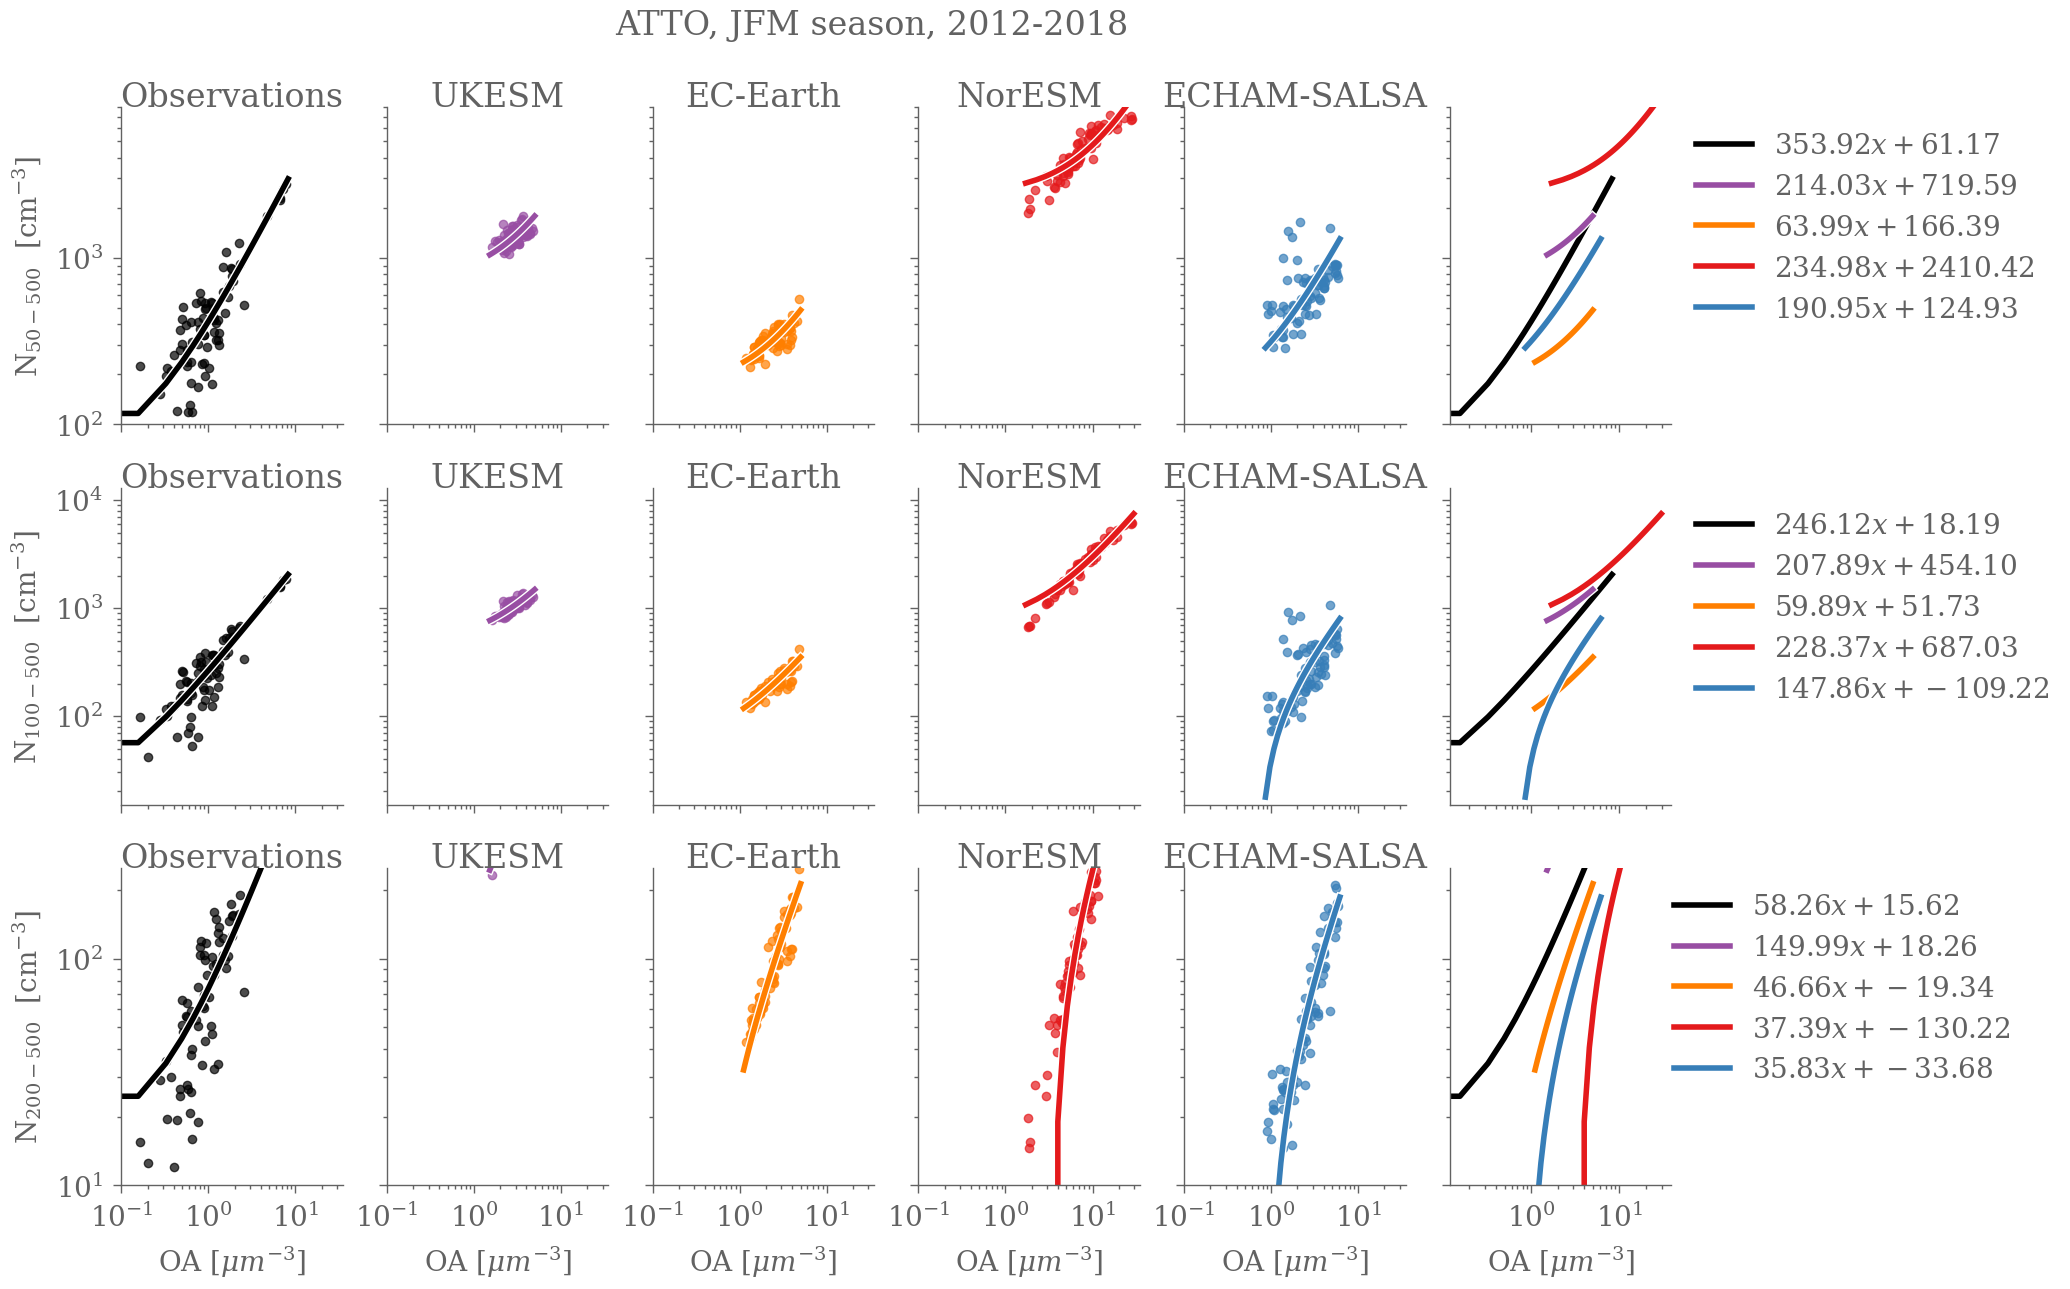

In [92]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]

xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_y = 'N50-500'
v_x = 'OA'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='log'
yscale='log'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, 
           fig=fig, 
           axs=axs_sub,
           xscale='linear', yscale='linear',
           dic_df_med = dic_df_med,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

xlims = [.1,35]

ylims = [15,13000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    

    
    
    

    
#xlims = [.01,10]

ylims = [10,250]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 

    
    
fn = make_fn_scat(f'together_{season}', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

In [93]:
def plot_fit(func, popt, mo, xlims, yscale, xscale, ax, label):

    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')

    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{label}')
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)



## Comparing seasons: 

## JFMAM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[329.77947938  63.90410252]
Beta: [351.26863244  37.70075689]
Beta Std Error: [ 9.89688708 16.54375833]
Beta Covariance: [[ 1581.15710325 -1928.02558201]
 [-1928.02558201  4418.20789939]]
Residual Variance: 0.06194727497455309
Inverse Condition #: 0.33856251866324183
Reason(s) for Halting:
  Sum of squares convergence
[351.26863244  37.70075689]
reason for haltng
parameter: 351.2686324418221
   conf interval: 331.72231794281055 370.81494694083364
   tstat: 35.49284028808327
   pstat: 0.0

parameter: 37.700756886089565
   conf interval: 5.026896842103682 70.37461693007545
   tstat: 2.2788507990174285
   pstat: 0.024006617261050245

UKESM
[243.87567005 782.76135131]
Beta: [ 546.7470363  -206.61188614]
Beta Std Error: [ 53.67794978 178.97116134]
Beta Covariance: [[  5136.22619591 -16778.23744596]
 [-16778.23744596  57097.67372733]]
Residual Variance: 0.560980413064749
Inverse Condition #: 0.04846411590229638
Reason(s) for Halting:
  Sum of squares convergence
[ 546.7470363  -

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[0, 500]
Beta: [244.60501953 -10.6727769 ]
Beta Std Error: [ 6.39674269 10.70351796]
Beta Covariance: [[ 763.45301913 -930.936139  ]
 [-930.936139   2137.55667052]]
Residual Variance: 0.05359637863079482
Inverse Condition #: 0.11140035097514031
Reason(s) for Halting:
  Sum of squares convergence
[244.60501953 -10.6727769 ]
reason for haltng
parameter: 244.60501953232682
   conf interval: 231.9714769397291 257.23856212492456
   tstat: 38.238996200601825
   pstat: 0.0

parameter: -10.67277690278797
   conf interval: -31.81218433129678 10.466630525720841
   tstat: -0.9971279485447693
   pstat: 0.3202174761082077

UKESM
[0, 500]
Beta: [361.48876176  22.95304055]
Beta Std Error: [25.1218728  84.02881039]
Beta Covariance: [[ 1934.93303821 -6320.72108679]
 [-6320.72108679 21648.02823927]]
Residual Variance: 0.3261655471882418
Inverse Condition #: 0.05697347557370306
Reason(s) for Halting:
  Sum of squares convergence
[361.48876176  22.95304055]
reason for haltng
parameter: 361.48

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
Observations
[53.44013392  9.81967566]
Beta: [59.16851115  2.8346244 ]
Beta Std Error: [2.11667554 3.52301119]
Beta Covariance: [[ 45.70189818 -55.7277725 ]
 [-55.7277725  126.60582863]]
Residual Variance: 0.09803346334319046
Inverse Condition #: 0.33737807439874373
Reason(s) for Halting:
  Sum of squares convergence
[59.16851115  2.8346244 ]
reason for haltng
parameter: 59.16851115142778
   conf interval: 54.98808496758618 63.348937335269376
   tstat: 27.95351007282826
   pstat: 0.0

parameter: 2.83462439843635
   conf interval: -4.12330936367246 9.79255816054516
   tstat: 0.8046027230090744
   pstat: 0.4222504118642916

UKESM
UKESM
[144.20138635  27.88425803]
Beta: [147.74740799  16.30066719]
Beta Std Error: [2.58270956 8.6741724 ]
Beta Covariance: [[ 274.47122223 -896.59936048]
 [-896.59936048 3096.00587218]]
Residual Variance: 0.02430268868640065
Inverse Condition #: 0.05636034398956131
Reason(s) for Halting:
  Sum of squares convergence
[147.74740799  16.30066719]
rea

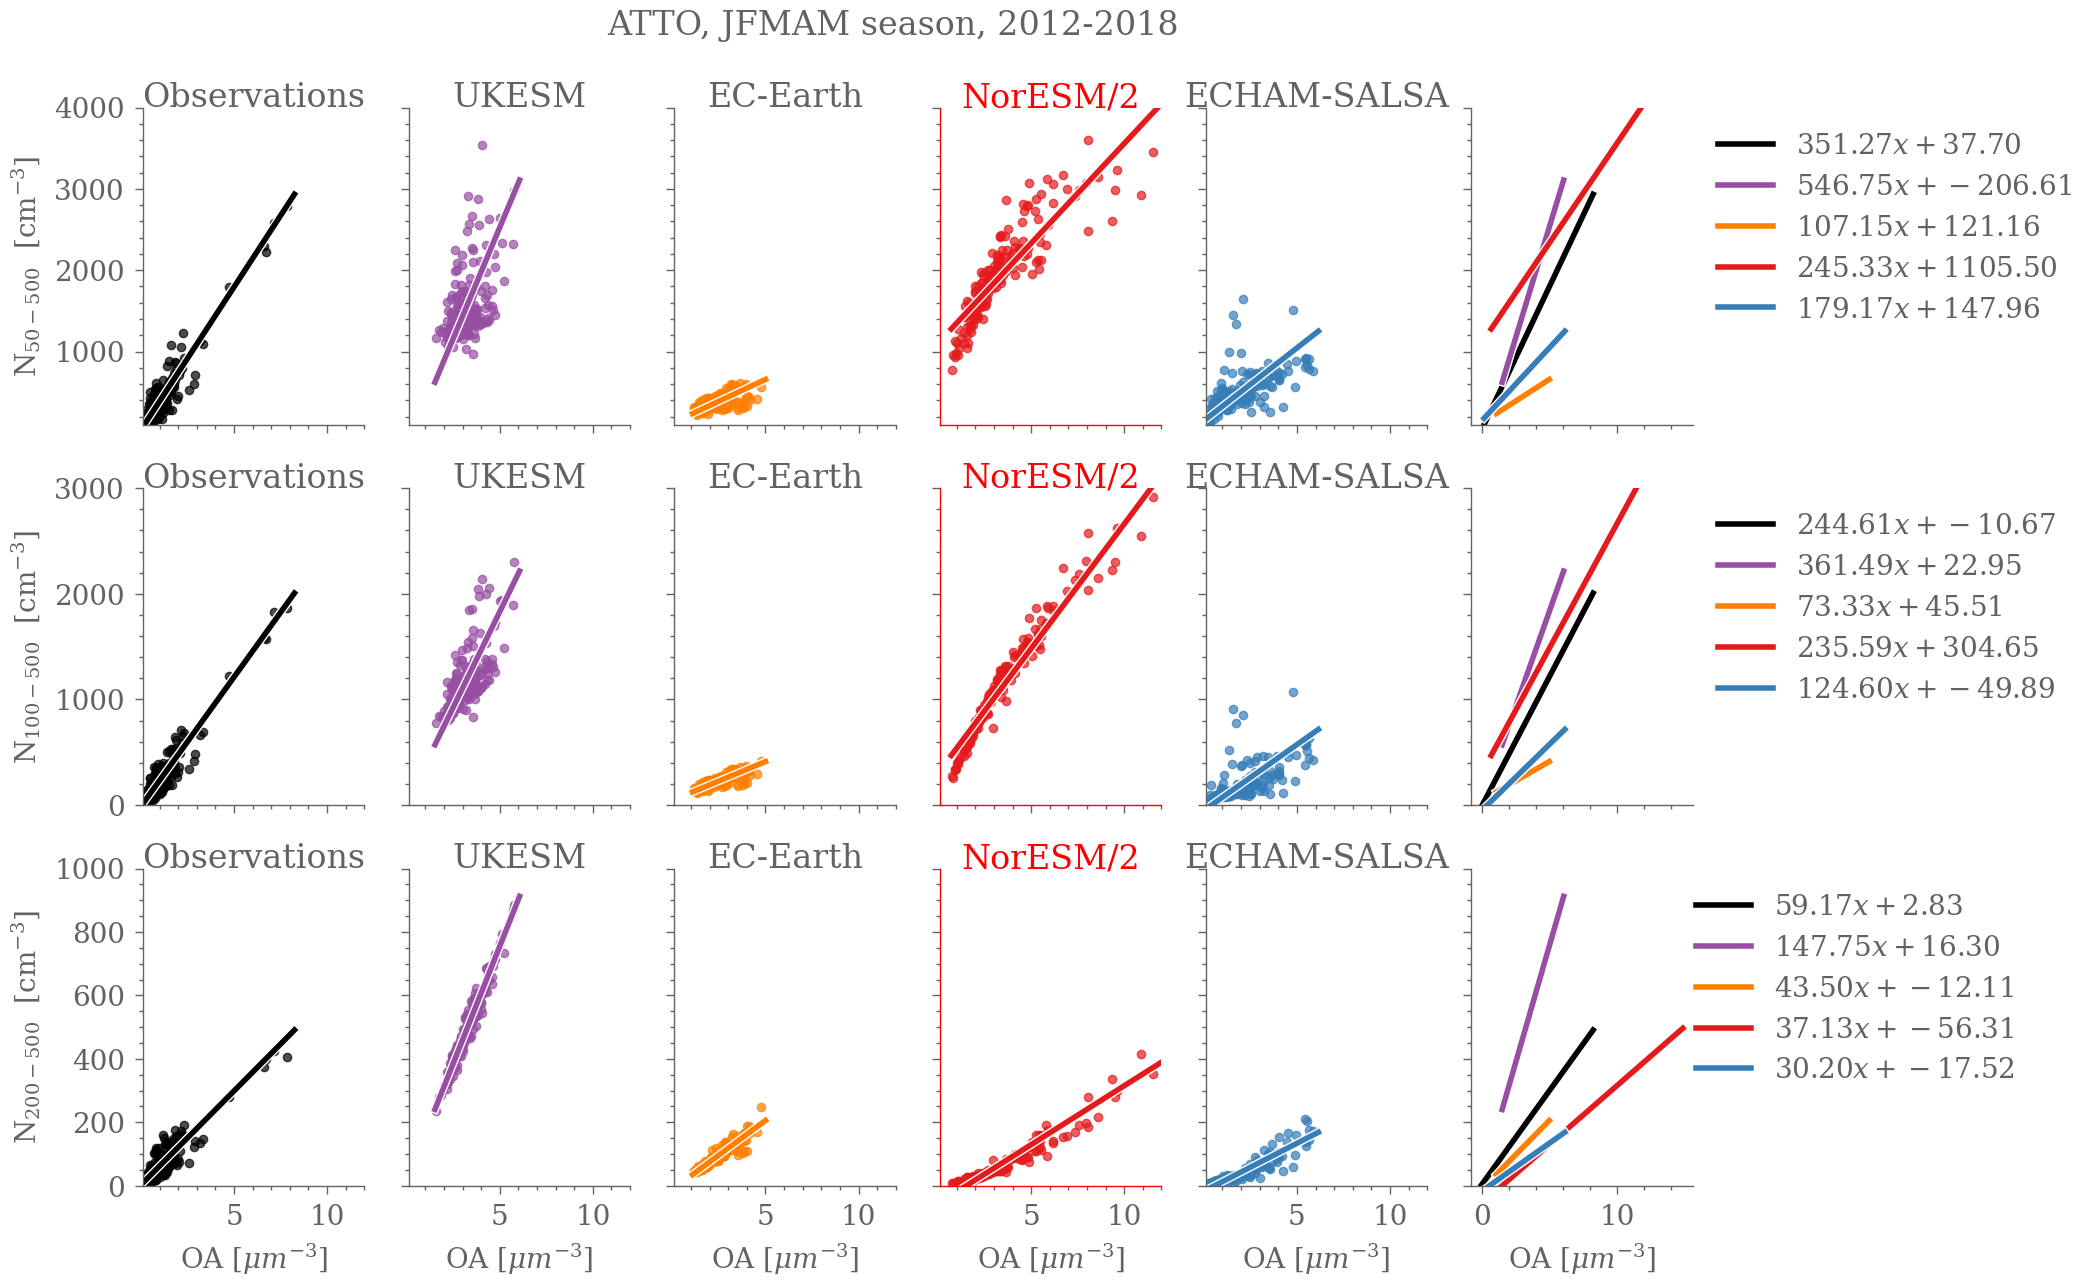

In [94]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFMAM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

## FMAM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[256.14192185 110.90241512]
Beta: [317.94324414  49.87035275]
Beta Std Error: [18.09227056 20.85617022]
Beta Covariance: [[ 1658.83826697 -1638.19038889]
 [-1638.19038889  2204.38284961]]
Residual Variance: 0.1973249957170978
Inverse Condition #: 0.2542048188491413
Reason(s) for Halting:
  Sum of squares convergence
[317.94324414  49.87035275]
reason for haltng
parameter: 317.94324414032036
   conf interval: 282.15743379711864 353.7290544835221
   tstat: 17.57342966601872
   pstat: 0.0

parameter: 49.870352753965555
   conf interval: 8.617655934932905 91.12304957299821
   tstat: 2.391155817268416
   pstat: 0.018195718018540363

UKESM
[259.49416522 752.6842571 ]
Beta: [ 571.87549527 -283.39091385]
Beta Std Error: [ 60.79644793 205.87934767]
Beta Covariance: [[  6665.77617012 -22108.37261623]
 [-22108.37261623  76439.85970508]]
Residual Variance: 0.5545052798660333
Inverse Condition #: 0.04825773782643917
Reason(s) for Halting:
  Sum of squares convergence
[ 571.87549527 -28

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[0, 500]
Beta: [210.56304112   6.65995719]
Beta Std Error: [11.40983178 13.16883813]
Beta Covariance: [[ 720.96555594 -711.99056215]
 [-711.99056215  960.39734934]]
Residual Variance: 0.18056932145062768
Inverse Condition #: 0.05715398451265774
Reason(s) for Halting:
  Sum of squares convergence
[210.56304112   6.65995719]
reason for haltng
parameter: 210.5630411235801
   conf interval: 187.99483583416577 233.13124641299441
   tstat: 18.45452634195148
   pstat: 0.0

parameter: 6.659957190144793
   conf interval: -19.387494524829343 32.707408905118925
   tstat: 0.5057361267870486
   pstat: 0.6138790691499909

UKESM
[0, 500]
Beta: [379.54581381 -38.90500226]
Beta Std Error: [28.3315829  96.25459951]
Beta Covariance: [[ 2529.54220726 -8389.73285947]
 [-8389.73285947 29197.33643175]]
Residual Variance: 0.3173216826803125
Inverse Condition #: 0.05816520632463399
Reason(s) for Halting:
  Sum of squares convergence
[379.54581381 -38.90500226]
reason for haltng
parameter: 379.5458

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
Observations
[41.72412439 15.99397952]
Beta: [59.62683082 -1.6858937 ]
Beta Std Error: [4.3461197  4.97081416]
Beta Covariance: [[ 61.97674212 -61.20528055]
 [-61.20528055  81.07378172]]
Residual Variance: 0.30477168989204473
Inverse Condition #: 0.24732666550307303
Reason(s) for Halting:
  Sum of squares convergence
[59.62683082 -1.6858937 ]
reason for haltng
parameter: 59.62683081514694
   conf interval: 51.030374403137756 68.22328722715612
   tstat: 13.719555594049856
   pstat: 0.0

parameter: -1.6858936961385276
   conf interval: -11.517971565452529 8.146184173175472
   tstat: -0.33915846383236004
   pstat: 0.7350252770446803

UKESM
UKESM
[146.33900968  18.33236894]
Beta: [149.27818871   8.58399044]
Beta Std Error: [2.58145336 8.80601497]
Beta Covariance: [[  333.40840582 -1105.81916811]
 [-1105.81916811  3879.7774688 ]]
Residual Variance: 0.01998720293405468
Inverse Condition #: 0.05602356230443597
Reason(s) for Halting:
  Sum of squares convergence
[149.27818871   8.

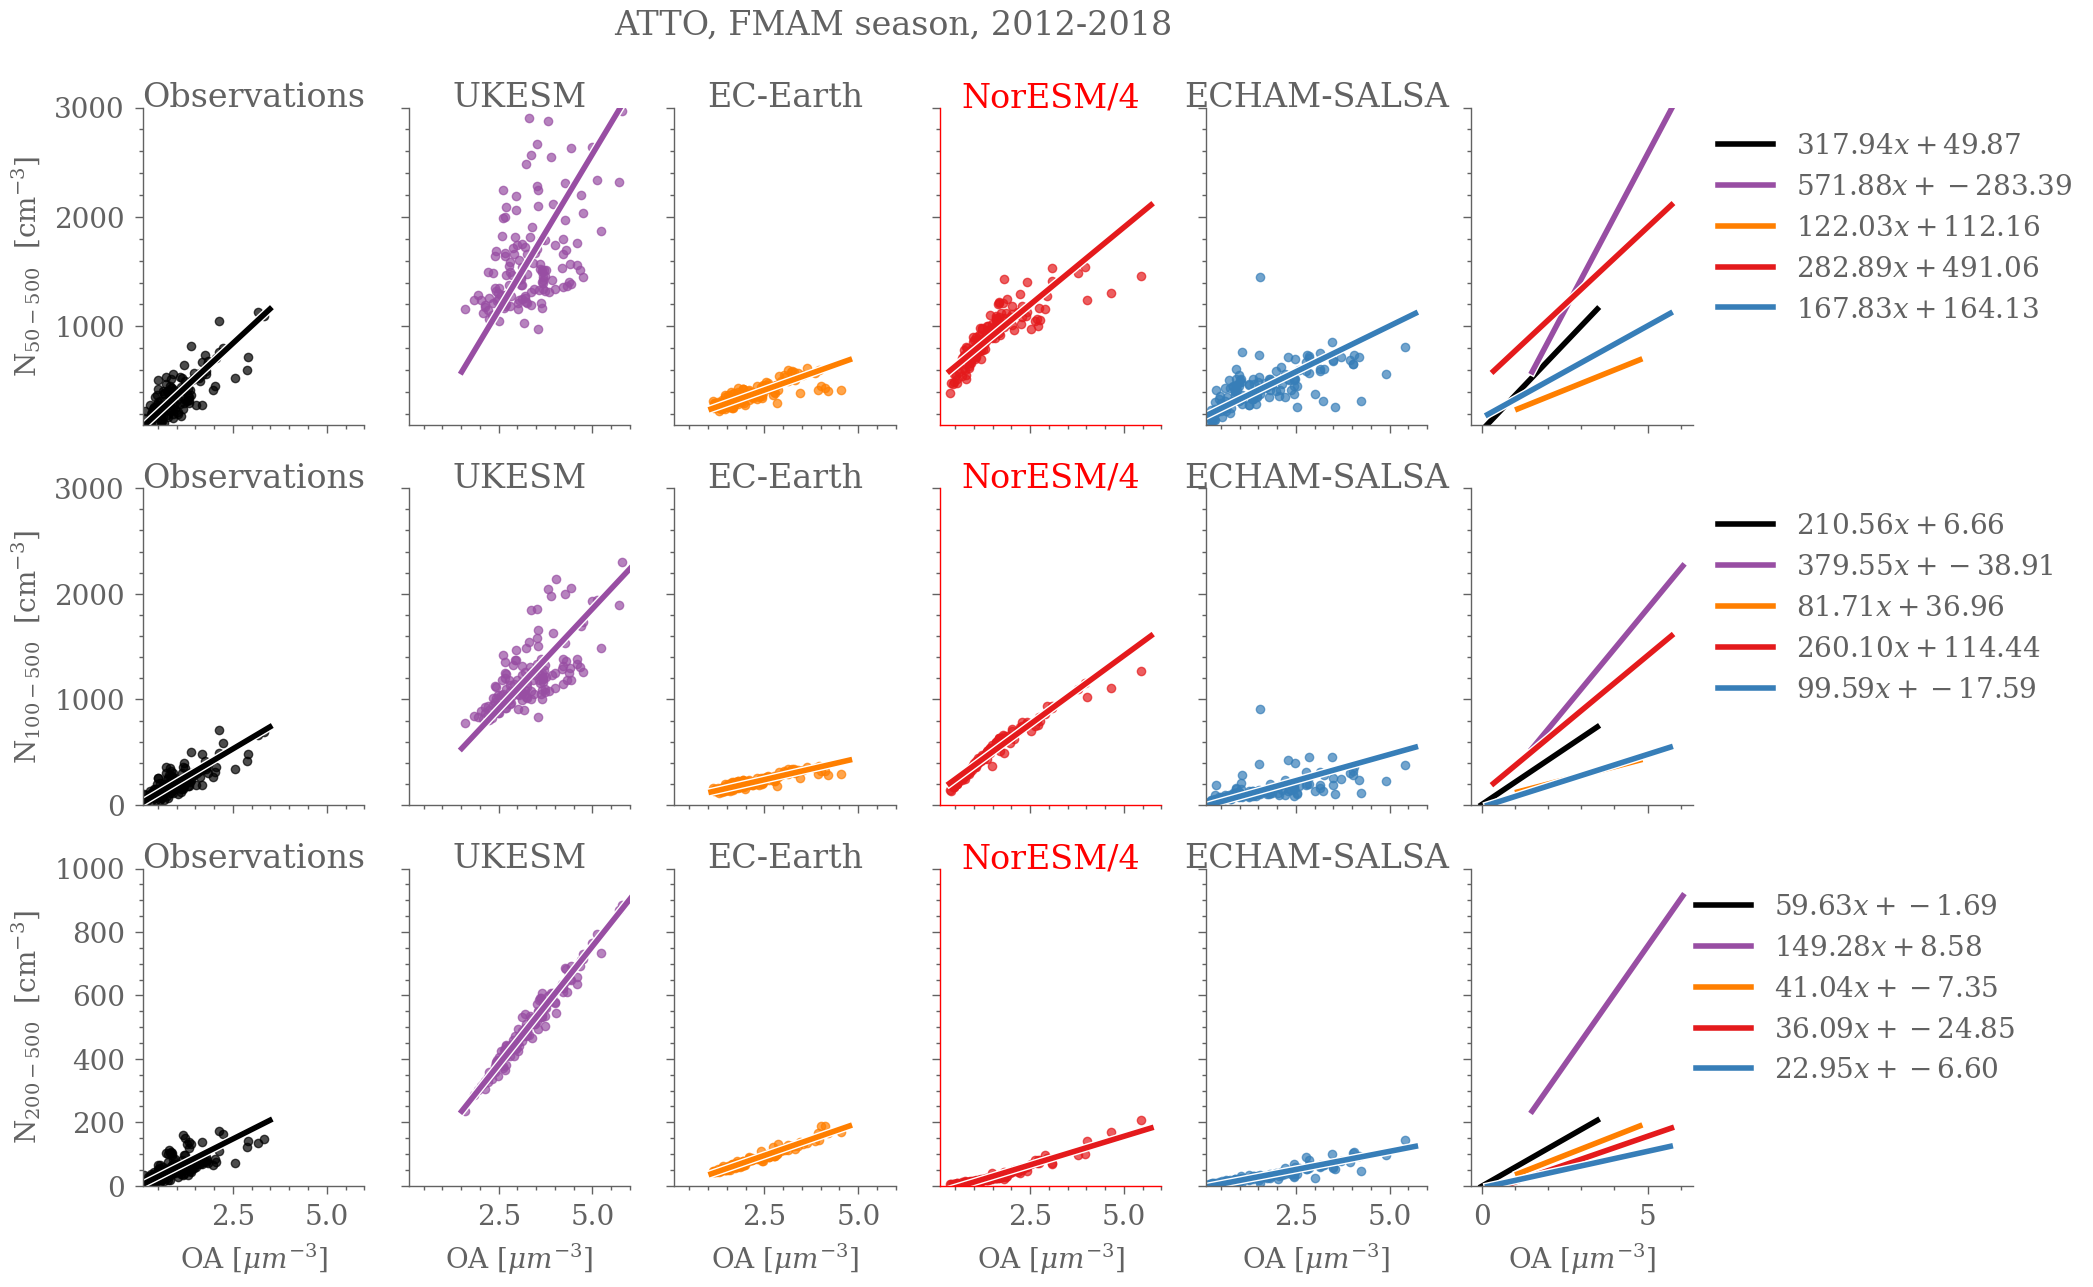

In [95]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 4
xlab = r'OA [$\mu m^{-3}$]'

season = 'FMAM'
source_list = models_and_obs[::-1]

xlims = [.1,6]

ylims = [100,3000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

## MAM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[261.75222601 103.29858099]
Beta: [319.60588242  45.76077242]
Beta Std Error: [18.10916667 21.13867384]
Beta Covariance: [[ 1782.76375429 -1773.03091917]
 [-1773.03091917  2429.13885034]]
Residual Variance: 0.18395141619661756
Inverse Condition #: 0.25960419232632237
Reason(s) for Halting:
  Sum of squares convergence
[319.60588242  45.76077242]
reason for haltng
parameter: 319.6058824179243
   conf interval: 283.76276890759647 355.44899592825215
   tstat: 17.648845378050847
   pstat: 0.0

parameter: 45.76077241717054
   conf interval: 3.9214155974108067 87.60012923693029
   tstat: 2.164789180551121
   pstat: 0.03231939781194426

UKESM
[289.83454069 679.59564986]
Beta: [ 588.99948345 -300.33414738]
Beta Std Error: [ 61.72623944 206.61047797]
Beta Covariance: [[  7381.48960752 -24178.44320732]
 [-24178.44320732  82700.67593016]]
Residual Variance: 0.5161734063851864
Inverse Condition #: 0.04972797055805324
Reason(s) for Halting:
  Sum of squares convergence
[ 588.99948345 -

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[0, 500]
Beta: [209.81815636   1.91890553]
Beta Std Error: [11.29168464 13.19682566]
Beta Covariance: [[ 761.53417015 -757.37904514]
 [-757.37904514 1040.18568626]]
Residual Variance: 0.16742799859209284
Inverse Condition #: 0.05876457686170618
Reason(s) for Halting:
  Sum of squares convergence
[209.81815636   1.91890553]
reason for haltng
parameter: 209.8181563630699
   conf interval: 187.46874947612696 232.16756325001285
   tstat: 18.581652170351443
   pstat: 0.0

parameter: 1.918905534670774
   conf interval: -24.20130910472365 28.039120174065197
   tstat: 0.14540659878959641
   pstat: 0.88462595120783

UKESM
[0, 500]
Beta: [393.1667812  -65.91467423]
Beta Std Error: [29.30257131 98.37920894]
Beta Covariance: [[ 2876.16920294 -9421.03594771]
 [-9421.03594771 32419.74696718]]
Residual Variance: 0.29853622117000067
Inverse Condition #: 0.05838674682930503
Reason(s) for Halting:
  Sum of squares convergence
[393.1667812  -65.91467423]
reason for haltng
parameter: 393.1667

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
Observations
[41.10678938 13.14629551]
Beta: [54.42852874 -0.10262906]
Beta Std Error: [3.65063465 4.24088147]
Beta Covariance: [[ 53.58197125 -53.29010547]
 [-53.29010547  72.30930941]]
Residual Variance: 0.24872420705677115
Inverse Condition #: 0.25544302887079956
Reason(s) for Halting:
  Sum of squares convergence
[54.42852874 -0.10262906]
reason for haltng
parameter: 54.42852873889634
   conf interval: 47.2029001730535 61.65415730473918
   tstat: 14.90933331625208
   pstat: 0.0

parameter: -0.10262905846565035
   conf interval: -8.496521429617811 8.29126331268651
   tstat: -0.024199935598706427
   pstat: 0.9807320301722404

UKESM
UKESM
[146.05704684  18.38895815]
Beta: [149.06030446   8.55163342]
Beta Std Error: [2.7008552  9.10266975]
Beta Covariance: [[  356.27154006 -1166.98484846]
 [-1166.98484846  4046.84063362]]
Residual Variance: 0.020474884986537885
Inverse Condition #: 0.05699406165021897
Reason(s) for Halting:
  Sum of squares convergence
[149.06030446   8.55

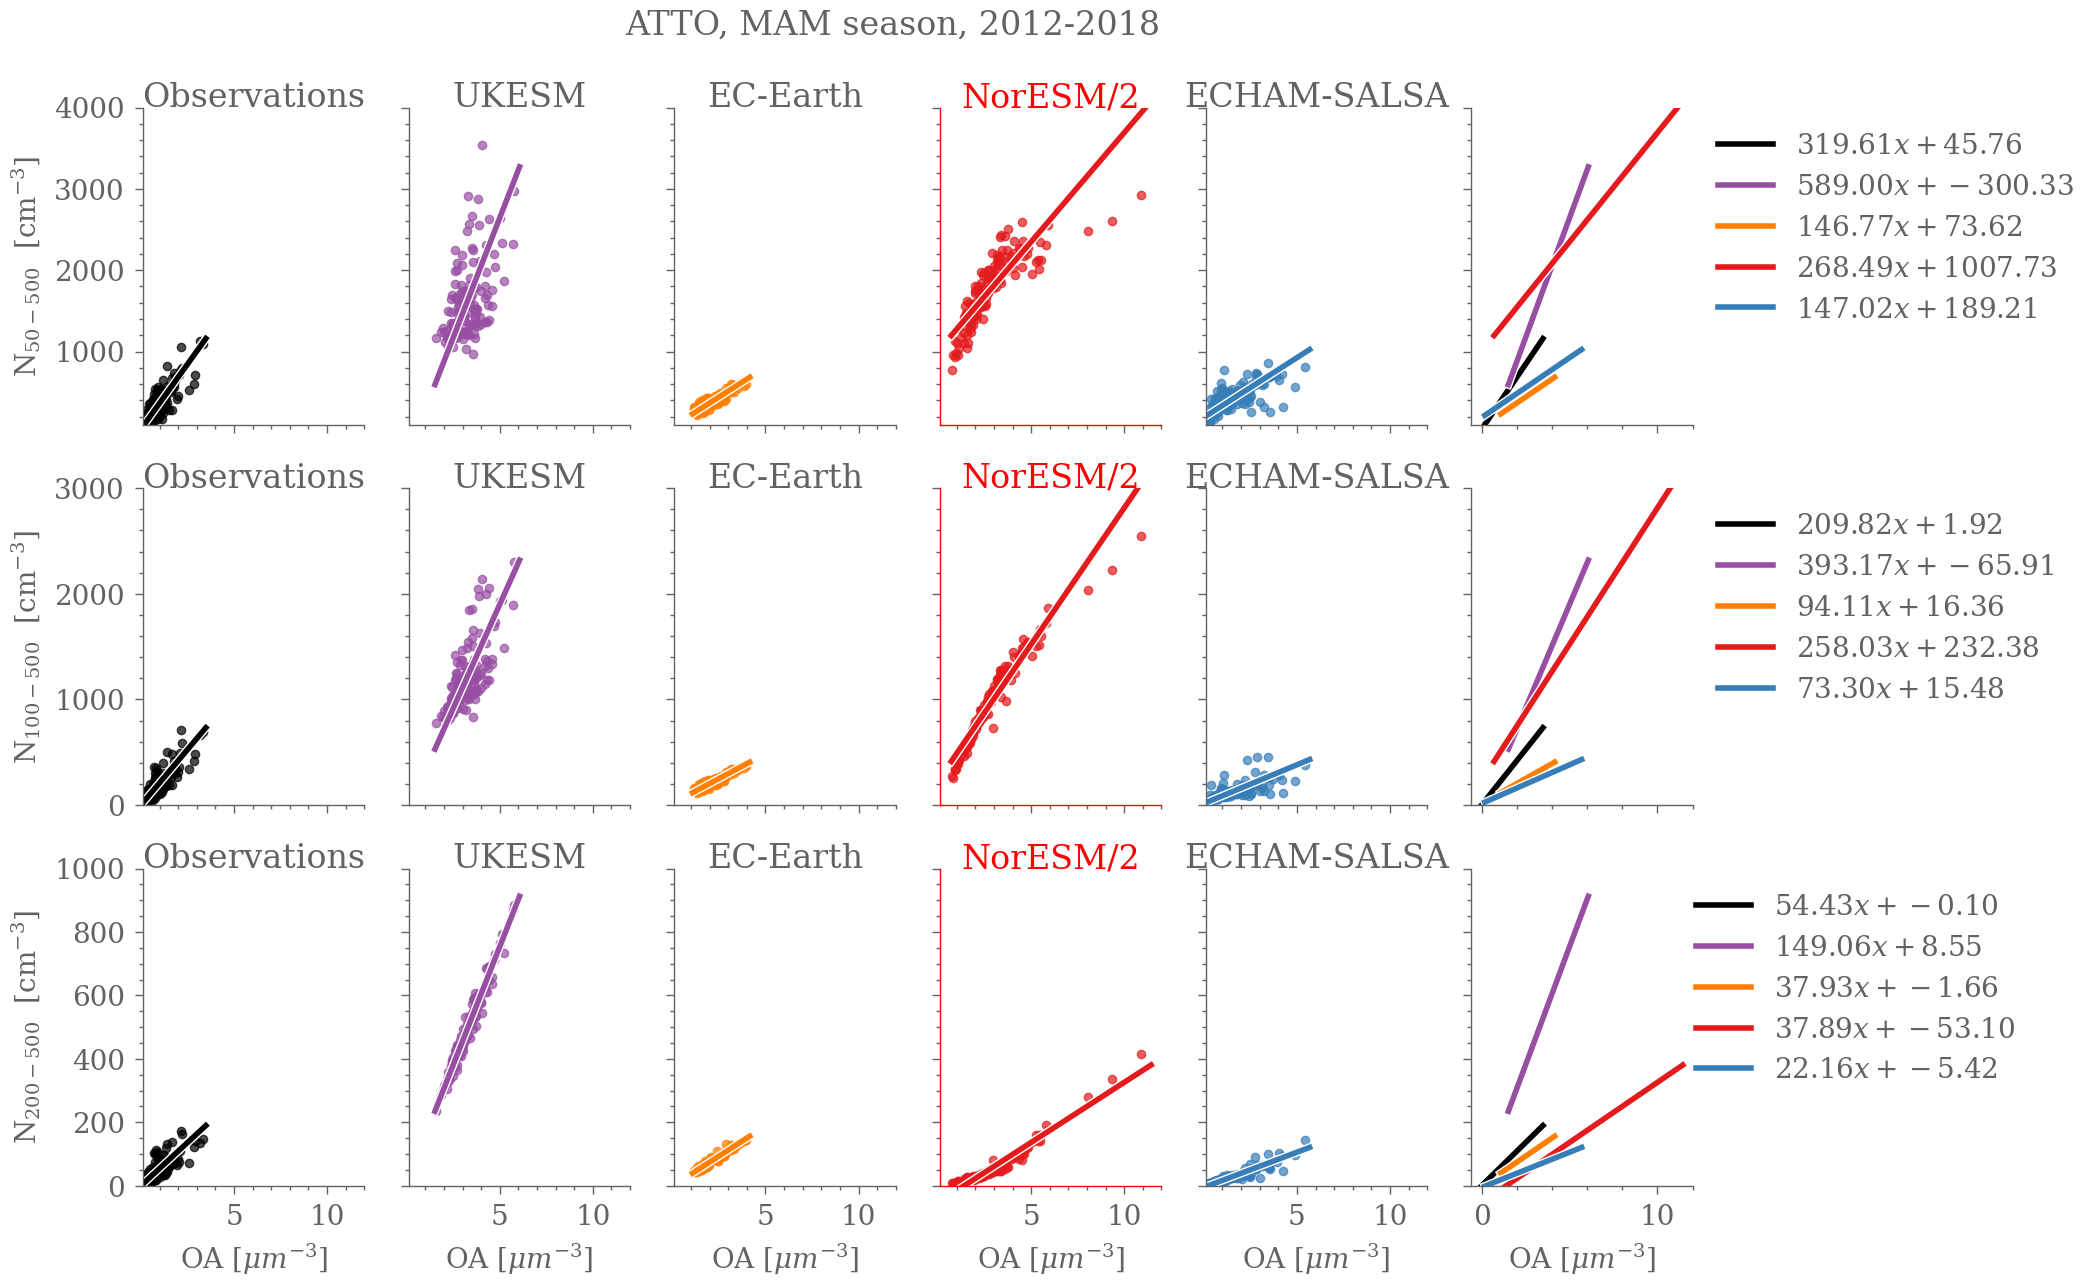

In [96]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'MAM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

## JFM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[340.24954304  79.37828171]
Beta: [353.9223659   61.16835005]
Beta Std Error: [11.62720679 23.46463008]
Beta Covariance: [[ 3406.09145755 -4536.34685847]
 [-4536.34685847 13871.80373467]]
Residual Variance: 0.03969122365844455
Inverse Condition #: 0.33303882858180894
Reason(s) for Halting:
  Sum of squares convergence
[353.9223659   61.16835005]
reason for haltng
parameter: 353.922365901687
   conf interval: 330.74937618221605 377.0953556211579
   tstat: 30.43915638174763
   pstat: 0.0

parameter: 61.16835005016919
   conf interval: 14.403409758069053 107.93329034226932
   tstat: 2.6068320639794798
   pstat: 0.01107273638246098

UKESM
[ 109.8790449  1028.47182098]
Beta: [214.02574567 719.59146055]
Beta Std Error: [28.40996325 86.06983304]
Beta Covariance: [[ 1614.32224349 -4787.78931467]
 [-4787.78931467 14816.67681185]]
Residual Variance: 0.49997825114404826
Inverse Condition #: 0.05335887835311196
Reason(s) for Halting:
  Sum of squares convergence
[214.02574567 719.5914

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[0, 500]
Beta: [246.115191    18.19275545]
Beta Std Error: [ 6.65552325 13.45511485]
Beta Covariance: [[ 1636.82421747 -2179.97233726]
 [-2179.97233726  6689.78947737]]
Residual Variance: 0.027062154381330337
Inverse Condition #: 0.14953990060420774
Reason(s) for Halting:
  Sum of squares convergence
[246.115191    18.19275545]
reason for haltng
parameter: 246.1151909987028
   conf interval: 232.8507523019673 259.37962969543827
   tstat: 36.97908968669243
   pstat: 0.0

parameter: 18.192755449326484
   conf interval: -8.623249769579242 45.00876066823221
   tstat: 1.3521070353333156
   pstat: 0.18051528807593575

UKESM
[0, 500]
Beta: [207.88557084 454.10355415]
Beta Std Error: [16.89191105 51.36590055]
Beta Covariance: [[ 1291.30154041 -3829.76781501]
 [-3829.76781501 11940.42844945]]
Residual Variance: 0.22096826347125798
Inverse Condition #: 0.054314969321412644
Reason(s) for Halting:
  Sum of squares convergence
[207.88557084 454.10355415]
reason for haltng
parameter: 20

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
Observations
[54.90803145 20.08262608]
Beta: [58.25723047 15.62206158]
Beta Std Error: [2.34605487 4.72166204]
Beta Covariance: [[  93.18270323 -124.10374851]
 [-124.10374851  377.4407368 ]]
Residual Variance: 0.05906647112318393
Inverse Condition #: 0.33277745630510475
Reason(s) for Halting:
  Sum of squares convergence
[58.25723047 15.62206158]
reason for haltng
parameter: 58.257230471519364
   conf interval: 53.58154986067073 62.932911082368
   tstat: 24.831998276744923
   pstat: 0.0

parameter: 15.622061579862985
   conf interval: 6.211802714701653 25.032320445024318
   tstat: 3.3085937666200045
   pstat: 0.0014579431379240226

UKESM
UKESM
[146.42493425  28.82234495]
Beta: [149.98675199  18.25863534]
Beta Std Error: [ 3.84868735 11.73384297]
Beta Covariance: [[  607.10830614 -1800.57438235]
 [-1800.57438235  5643.14817189]]
Residual Variance: 0.024398273203827883
Inverse Condition #: 0.06073366121548344
Reason(s) for Halting:
  Sum of squares convergence
[149.98675199 

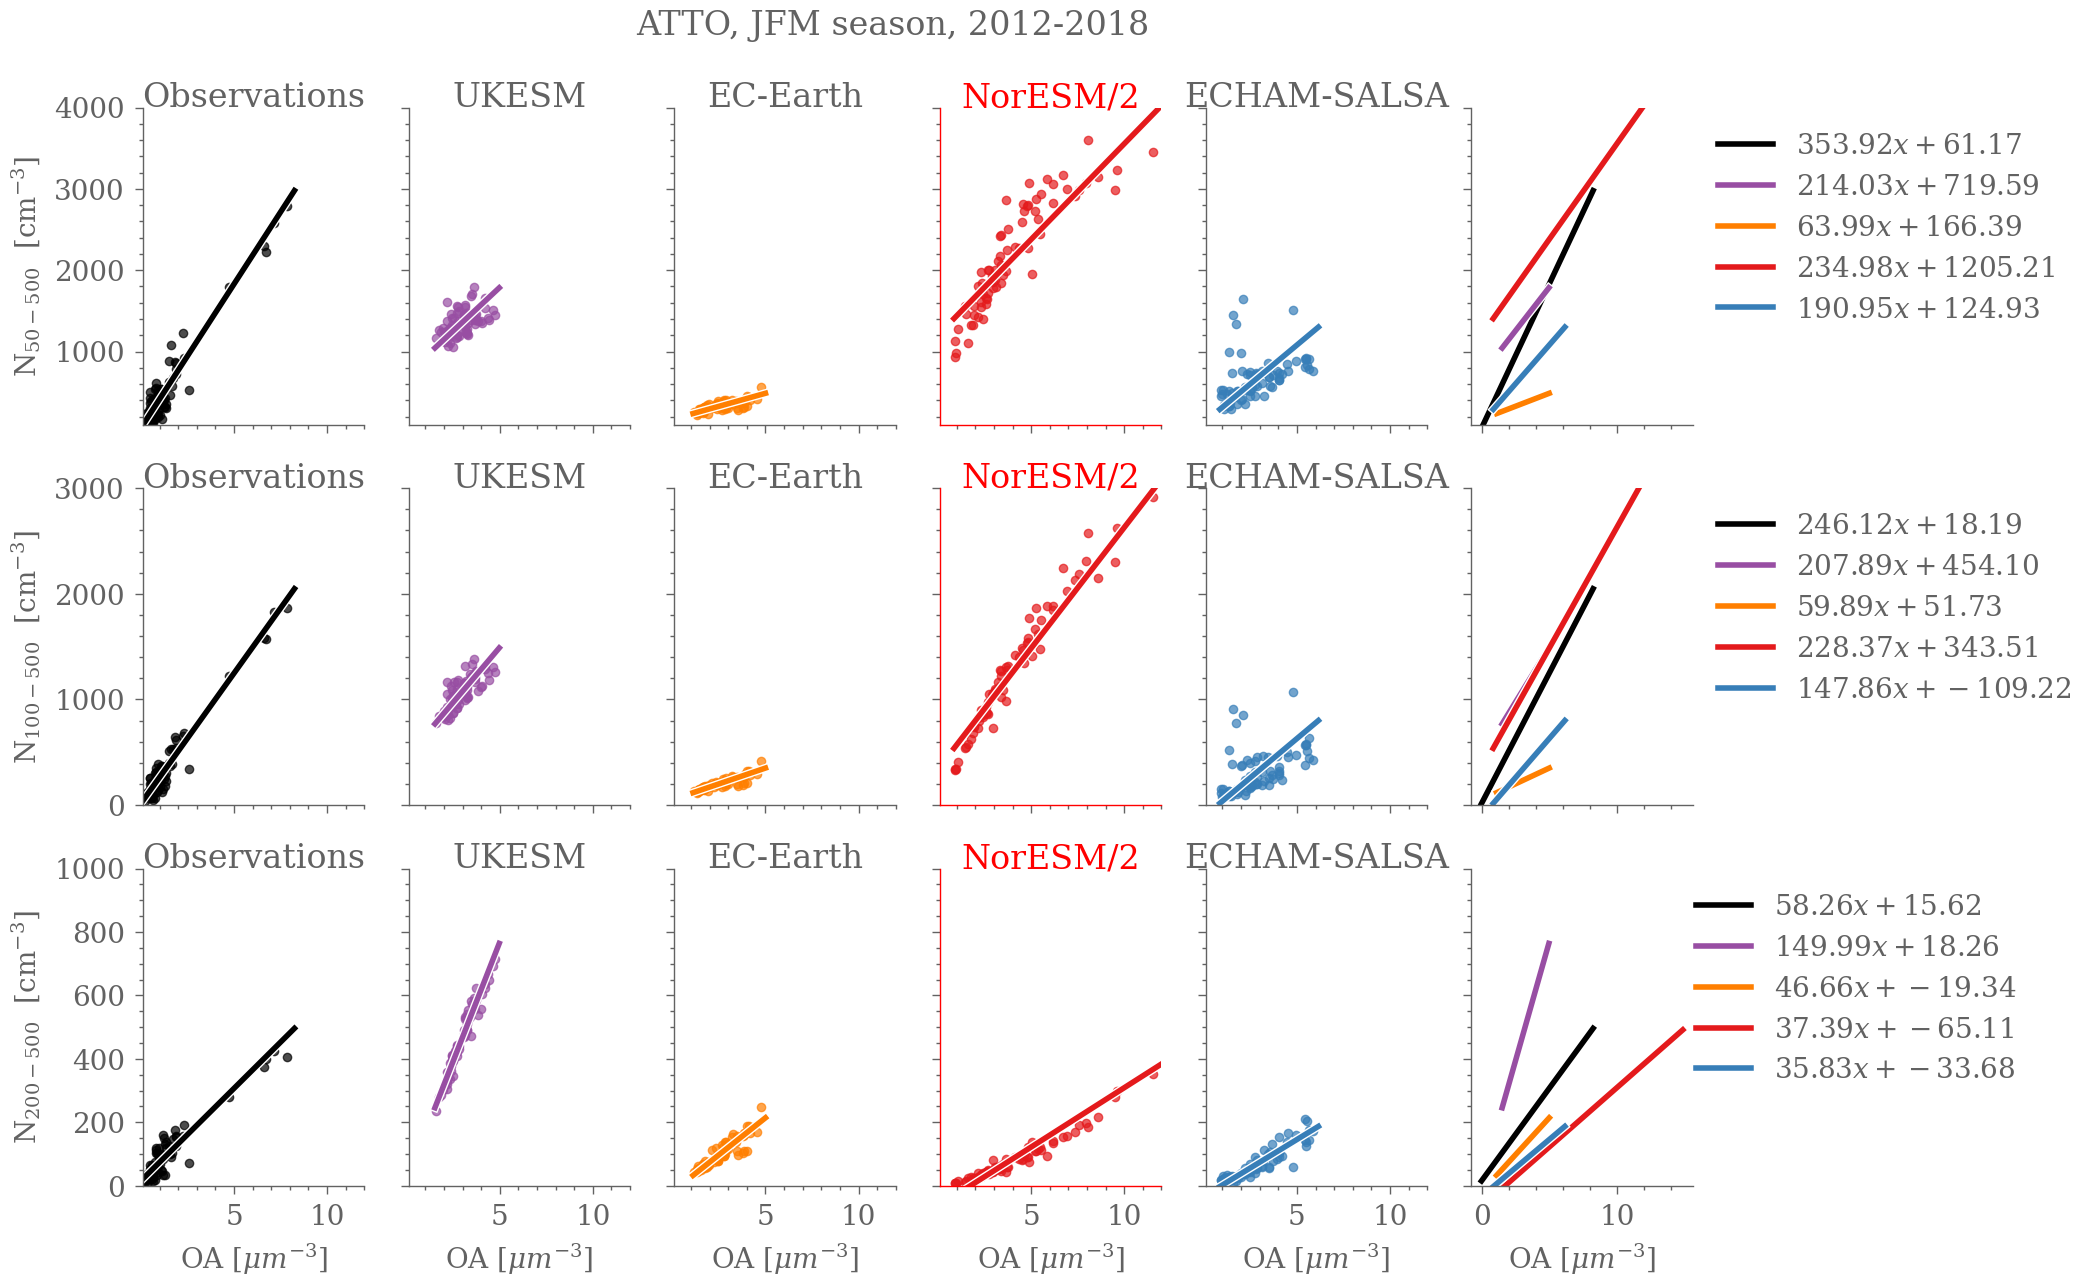

In [97]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

In [98]:
from scipy import odr

[ 32.72103725 -24.97078726]
Beta: [ 35.82534005 -33.68182252]
Beta Std Error: [1.78471481 5.56583855]
Beta Covariance: [[  35.77560875 -100.39052674]
 [-100.39052674  347.94498801]]
Residual Variance: 0.08903292134734807
Inverse Condition #: 0.11896480689171804
Reason(s) for Halting:
  Sum of squares convergence
[ 35.82534005 -33.68182252]
reason for haltng


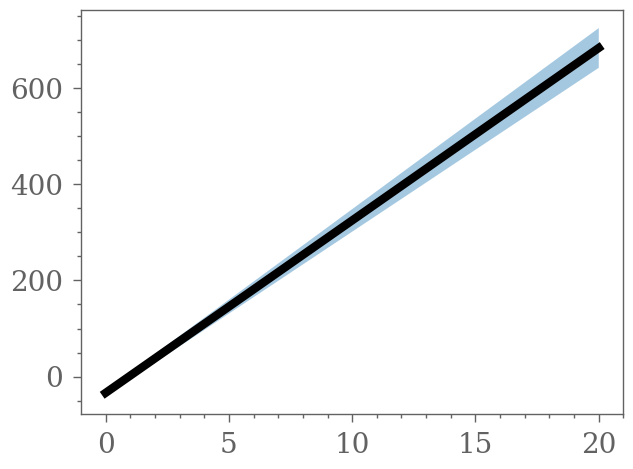

In [99]:
popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
x = np.linspace(0,20)
#plt.plot(x, func(x))
plt.plot(x, func(x, *popt), c='k', linewidth=3,label='__nolegend__')

y1 = func(x, *(popt-out.sd_beta))
y2 = func(x, popt[0]-out.sd_beta[0],popt[1]+out.sd_beta[1], )
y3 = func(x, *(popt+out.sd_beta))
y4 = func(x, popt[0]+out.sd_beta[0],popt[1]-out.sd_beta[1], )
#ym = np.max(np.concatenate(y1,y2), axis=0)
ym = np.maximum(y1,y2)
ym = np.maximum(ym,y3)
ym = np.maximum(ym,y4)
ymi = np.minimum(y1,y2)
ymi = np.minimum(ymi,y3)
ymi = np.minimum(ymi,y4)


plt.fill_between(x, ymi,ym, alpha=.4)

## New version SON

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[175.53051555 852.72599282]
Beta: [314.92835413 275.07857619]
Beta Std Error: [ 31.5906699  142.05567711]
Beta Covariance: [[ 2215.17435684 -9179.40816105]
 [-9179.40816105 44792.71979087]]
Residual Variance: 0.4505155188988743
Inverse Condition #: 0.07641223268916975
Reason(s) for Halting:
  Sum of squares convergence
[314.92835413 275.07857619]
reason for haltng
parameter: 314.9283541332711
   conf interval: 252.34153938493984 377.5151688816024
   tstat: 9.969030575016355
   pstat: 0.0

parameter: 275.0785761913749
   conf interval: -6.359341238679406 556.5164936214292
   tstat: 1.936413818761716
   pstat: 0.05531428644468228

UKESM
[ 144.26859172 1262.86523006]
Beta: [209.57923708 895.98951146]
Beta Std Error: [16.94083508 98.49503233]
Beta Covariance: [[  904.88658583 -5083.10579601]
 [-5083.10579601 30588.14745585]]
Residual Variance: 0.31715786019365605
Inverse Condition #: 0.03942520967682642
Reason(s) for Halting:
  Sum of squares convergence
[209.57923708 895.9895

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
[0, 500]
Beta: [254.89178209 121.74667829]
Beta Std Error: [ 26.05434483 117.08539226]
Beta Covariance: [[ 1463.42172343 -6064.23921356]
 [-6064.23921356 29553.88740423]]
Residual Variance: 0.4638641574432231
Inverse Condition #: 0.13599268425476166
Reason(s) for Halting:
  Sum of squares convergence
[254.89178209 121.74667829]
reason for haltng
parameter: 254.89178208539005
   conf interval: 203.27342582414772 306.5101383466324
   tstat: 9.783081620766946
   pstat: 2.220446049250313e-16

parameter: 121.74667829137319
   conf interval: -110.22060121751854 353.7139578002649
   tstat: 1.039810995587929
   pstat: 0.3006474651131388

UKESM
[0, 500]
Beta: [199.55455771 637.61259437]
Beta Std Error: [12.2298721  71.27278548]
Beta Covariance: [[  766.04143358 -4303.15764905]
 [-4303.15764905 26016.92075296]]
Residual Variance: 0.19525023728027227
Inverse Condition #: 0.10815901557419699
Reason(s) for Halting:
  Sum of squares convergence
[199.55455771 637.61259437]
reason for hal

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
Observations
[ 43.28498242 177.60127176]
Beta: [87.06327362 -3.81056796]
Beta Std Error: [ 9.49360582 42.56598339]
Beta Covariance: [[ 176.10538702 -729.75914626]
 [-729.75914626 3540.26354033]]
Residual Variance: 0.5117875890704685
Inverse Condition #: 0.07522293157808345
Reason(s) for Halting:
  Sum of squares convergence
[87.06327362 -3.81056796]
reason for haltng
parameter: 87.06327362302571
   conf interval: 68.25472823513832 105.8718190109131
   tstat: 9.170727675510452
   pstat: 2.6645352591003757e-15

parameter: -3.810567961418128
   conf interval: -88.14145823166444 80.52032230882818
   tstat: -0.08952143608386902
   pstat: 0.9288259955244376

UKESM
UKESM
[126.20358803 123.81225018]
Beta: [129.69748785 104.18563621]
Beta Std Error: [ 2.85129729 16.67029313]
Beta Covariance: [[  296.54045292 -1665.78424252]
 [-1665.78424252 10136.43913757]]
Residual Variance: 0.027415808392597475
Inverse Condition #: 0.04231400885584636
Reason(s) for Halting:
  Sum of squares conve

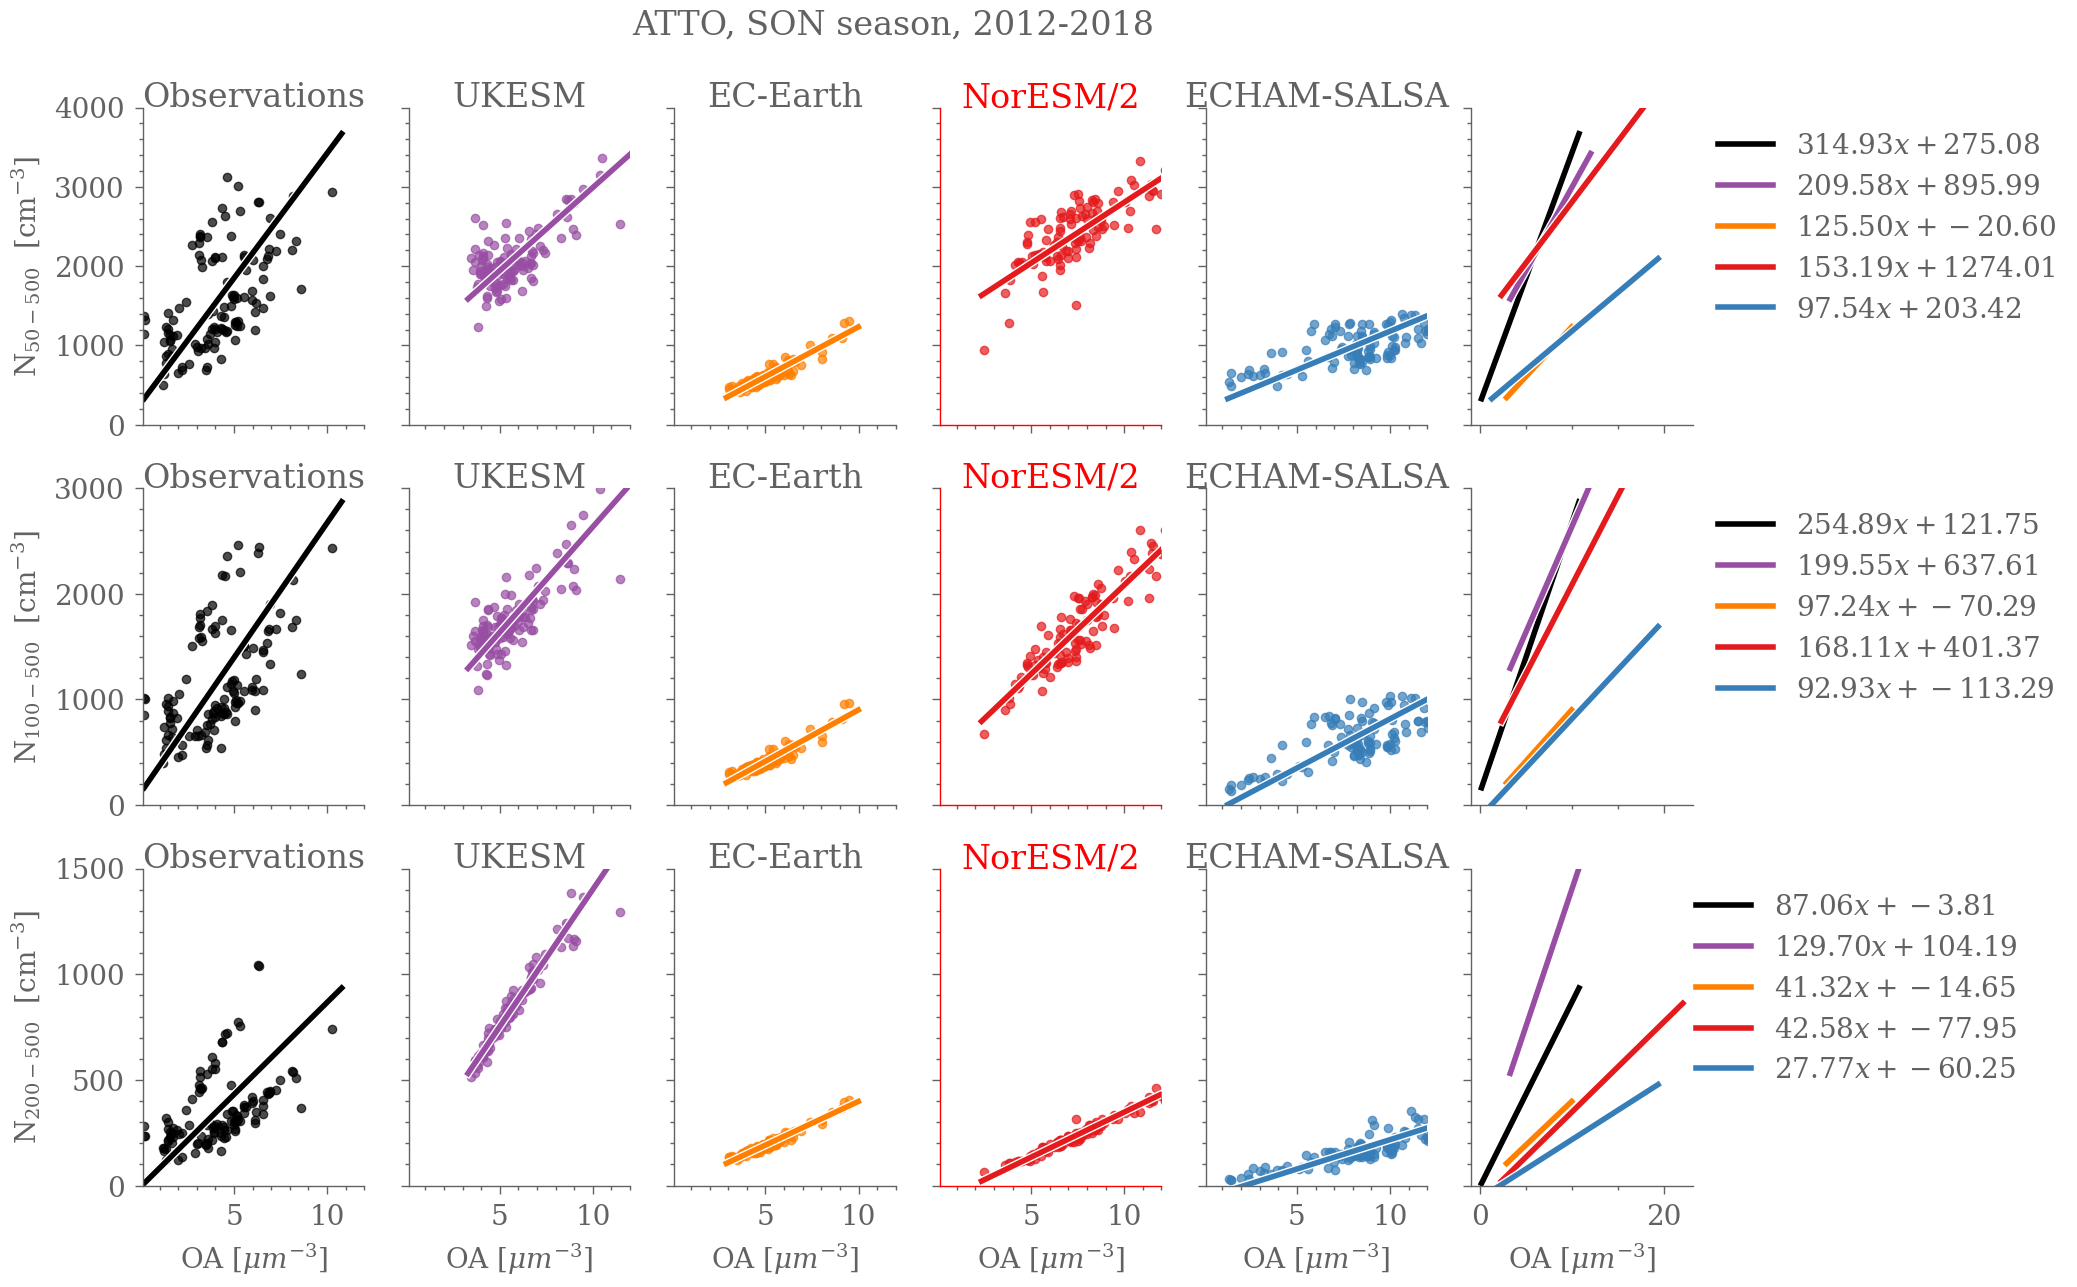

In [100]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [0,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1500]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### N50

#### DJF

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 25.2)
(0.0, 28.35)
(0.0, 45.15)
(0.0, 45.15)
(0.0, 45.15)
ECHAM-SALSA
[141.72137431 420.62466262]
Beta: [250.14743476  66.94034822]
Beta Std Error: [ 28.71493399 102.68282154]
Beta Covariance: [[ 1857.89122981 -6060.41518378]
 [-6060.41518378 23757.47209092]]
Residual Variance: 0.4438082385152226
Inverse Condition #: 0.09880385313421135
Reason(s) for Halting:
  Sum of squares convergence
[250.14743476  66.94034822]
reason for haltng
NorESM
[ 160.74482116 3363.02472734]
Beta: [ 206.2921652  2777.03461778]
Beta Std Error: [ 15.8584092  217.20726369]
Beta Covariance: [[  1112.50523255 -14312.95484247]
 [-14312.95484247 208704.35503191]]
Residual Variance: 0.2260565927960321
Inverse Condition #: 0.15539970371448383
Reason(s) for Halting:
  Sum of squares convergence
[ 206.2921652  2777.03461778]
reason for haltng
EC-Earth


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[ 80.38064832 137.34198958]
Beta: [110.98582244  34.22286953]
Beta Std Error: [ 9.68598646 33.32813852]
Beta Covariance: [[  332.2795185  -1119.56163128]
 [-1119.56163128  3934.03276264]]
Residual Variance: 0.282347627473282
Inverse Condition #: 0.0478942314856895
Reason(s) for Halting:
  Sum of squares convergence
[110.98582244  34.22286953]
reason for haltng
UKESM
[238.09196644 814.48654265]
Beta: [325.66801033 461.39109994]
Beta Std Error: [ 28.01108435 117.11666287]
Beta Covariance: [[  2849.68953934 -11489.5841048 ]
 [-11489.5841048   49816.71474799]]
Residual Variance: 0.27533555335602117
Inverse Condition #: 0.05396161777348685
Reason(s) for Halting:
  Sum of squares convergence
[325.66801033 461.39109994]
reason for haltng
Observations
[168.1820768  621.78283107]
Beta: [230.10220817 362.82587207]
Beta Std Error: [ 19.7992884  120.89721471]
Beta Covariance: [[ 1422.77384733 -5950.20226303]
 [-5950.20226303 53048.03496781]]
Residual Variance: 0.27552644565138856
Inverse Condition

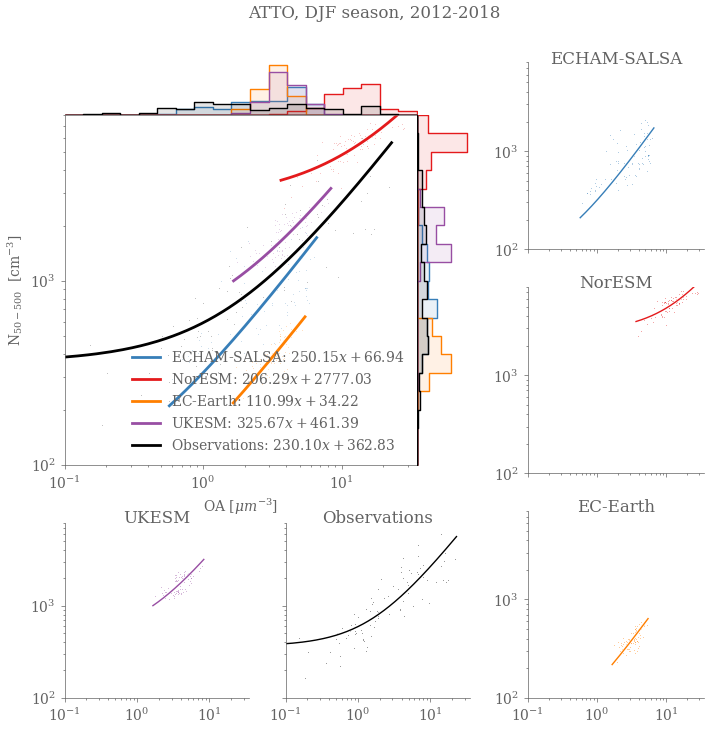

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [101]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DJF'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JF

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 8.4)
(0.0, 9.45)
(0.0, 15.75)
(0.0, 18.9)
(0.0, 18.9)
ECHAM-SALSA
[ -5.3513428  833.10660515]
Beta: [-204.13757295 1532.68303494]
Beta Std Error: [ 69.2410514  253.24771343]
Beta Covariance: [[  4641.49546844 -16334.53677862]
 [-16334.53677862  62090.00412944]]
Residual Variance: 1.032926398655009
Inverse Condition #: 0.006295417377285986
Reason(s) for Halting:
  Sum of squares convergence
[-204.13757295 1532.68303494]
reason for haltng
NorESM
[ 134.3050502  3844.64495864]
Beta: [ 169.6693429  3395.94827243]
Beta Std Error: [ 20.14872959 282.63298303]
Beta Covariance: [[  1836.39698641 -23299.92292701]
 [-23299.92292701 361340.73122344]]
Residual Variance: 0.22106946766346922
Inverse Condition #: 0.16235553760985158
Reason(s) for Halting:
  Sum of squares convergence
[ 169.6693429  3395.94827243]
reason for haltng
EC-Earth
[ 59.06055762 160.77829241]
Beta: [85.72057098 74.97315704]
Beta Std Error: [12.80689823 42.09037289]
Beta Covariance: [[  497.2084504  -1600.26336067]
 [-1600

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[328.57969602 168.07919151]
Beta: [336.69749044 151.60993875]
Beta Std Error: [12.94885817 36.52766768]
Beta Covariance: [[  6557.05948223 -13302.86087653]
 [-13302.86087653  52178.31633856]]
Residual Variance: 0.025571359899218948
Inverse Condition #: 0.22608020071564333
Reason(s) for Halting:
  Sum of squares convergence
[336.69749044 151.60993875]
reason for haltng


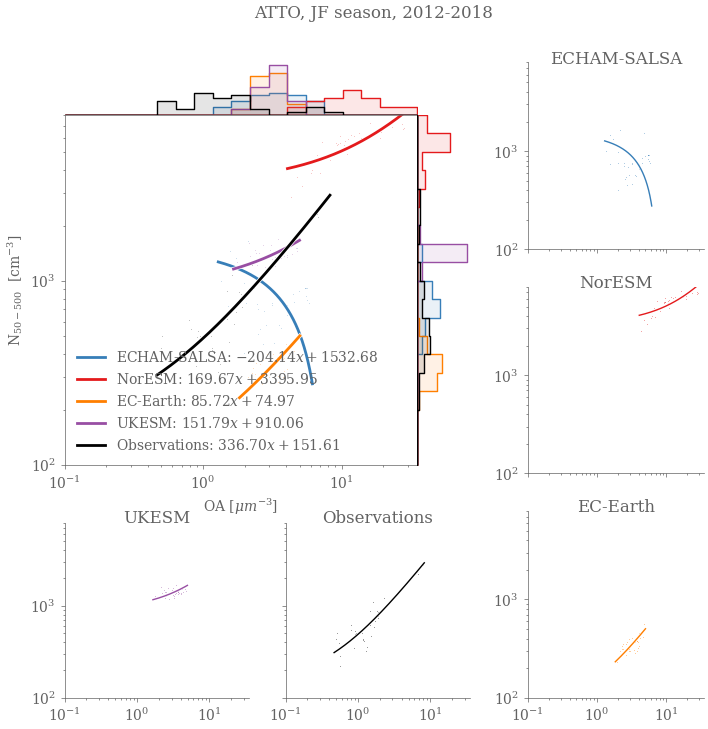

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [102]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JF'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JFM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 18.9)
(0.0, 18.9)
(0.0, 21.0)
(0.0, 31.5)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 31.5)
ECHAM-SALSA
75
[ 82.06357856 430.47516794]
Beta: [190.94972705 124.92793578]
Beta Std Error: [28.22959866 85.89365438]
Beta Covariance: [[ 1360.14395517 -3816.72216765]
 [-3816.72216765 12592.08448496]]
Residual Variance: 0.5859013947636772
Inverse Condition #: 0.1060015208170633
Reason(s) for Halting:
  Sum of squares convergence
[190.94972705 124.92793578]
reason for haltng
NorESM
75
[ 202.69346826 2693.46261752]
Beta: [ 234.98257131 2410.42465085]
Beta Std Error: [ 14.94054139 155.83808464]
Beta Covariance: [[  1581.0797031  -13859.32451932]
 [-13859.32451932 172015.78308818]]
Residual Variance: 0.14118186242471345
Inverse Condition #: 0.2784894395176292
Reason(s) for Halting:
  Sum of squares convergence
[ 234.98257131 2410.42465085]
reason for haltng
EC-Earth
75
[ 49.38586022 201.73817171]
Beta: [ 63.99165699 166.38768986]
Beta Std Error: [ 5.37653992 13.85623835]
Beta Covariance: [[ 123.26633622 -298.34213272]
 [-298.34213272  818.70874323]]
Residual Variance: 0.23450

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


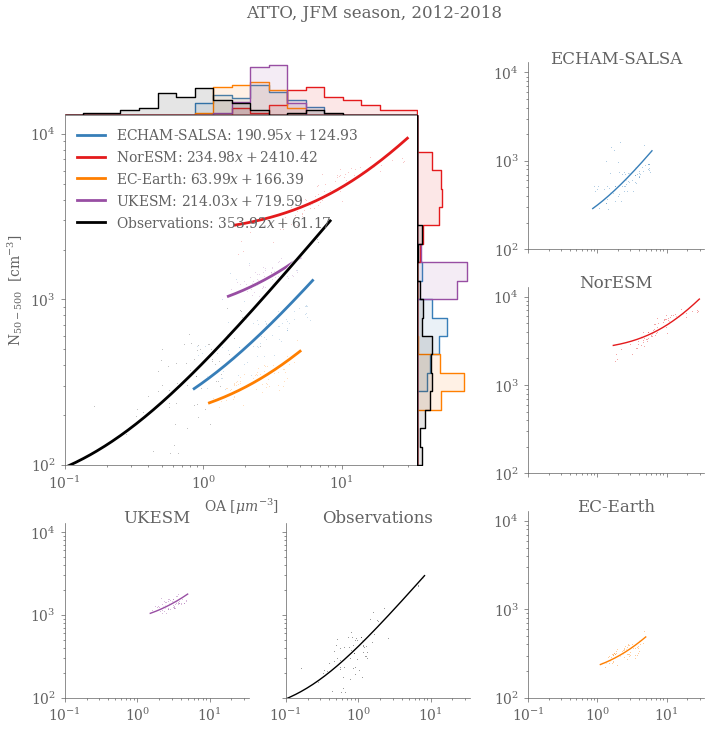

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [103]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [.1,35]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### WET_old

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 26.25)
(0.0, 36.75)
(0.0, 53.55)
(0.0, 80.85)
(0.0, 80.85)
ECHAM-SALSA
161
[110.1863178  286.69322334]
Beta: [179.16637085 147.96269648]
Beta Std Error: [13.87548889 32.99401575]
Beta Covariance: [[ 493.83391538 -993.18328054]
 [-993.18328054 2792.25244452]]
Residual Variance: 0.3898662806778735
Inverse Condition #: 0.18774953410425266
Reason(s) for Halting:
  Sum of squares convergence
[179.16637085 147.96269648]
reason for haltng
NorESM
161
[ 212.50861731 2449.1139679 ]
Beta: [ 245.33244248 2210.99243954]
Beta Std Error: [10.41917659 90.59396031]
Beta Covariance: [[  801.28240752 -5812.92930532]
 [-5812.92930532 60578.33061472]]
Residual Variance: 0.13548187217625093
Inverse Condition #: 0.2877276648779256
Reason(s) for Halting:
  Sum of squares convergence
[ 245.33244248 2210.99243954]
reason for haltng
EC-Earth
161
[ 66.99970241 212.31414078]
Beta: [107.14888697 121.15716821]
Beta Std Error: [ 8.16071181 19.51075501]
Beta Covariance: [[ 175.50461976 -398.47559535]
 [-398.4755

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


UKESM
161
[243.87567005 782.76135131]
Beta: [ 546.7470363  -206.61188614]
Beta Std Error: [ 53.67794978 178.97116134]
Beta Covariance: [[  5136.22619591 -16778.23744596]
 [-16778.23744596  57097.67372733]]
Residual Variance: 0.560980413064749
Inverse Condition #: 0.04846411590229638
Reason(s) for Halting:
  Sum of squares convergence
[ 546.7470363  -206.61188614]
reason for haltng
Observations
161
[329.77947938  63.90410252]
Beta: [351.26863244  37.70075689]
Beta Std Error: [ 9.89688708 16.54375833]
Beta Covariance: [[ 1581.15710325 -1928.02558201]
 [-1928.02558201  4418.20789939]]
Residual Variance: 0.06194727497455309
Inverse Condition #: 0.33856251866324183
Reason(s) for Halting:
  Sum of squares convergence
[351.26863244  37.70075689]
reason for haltng


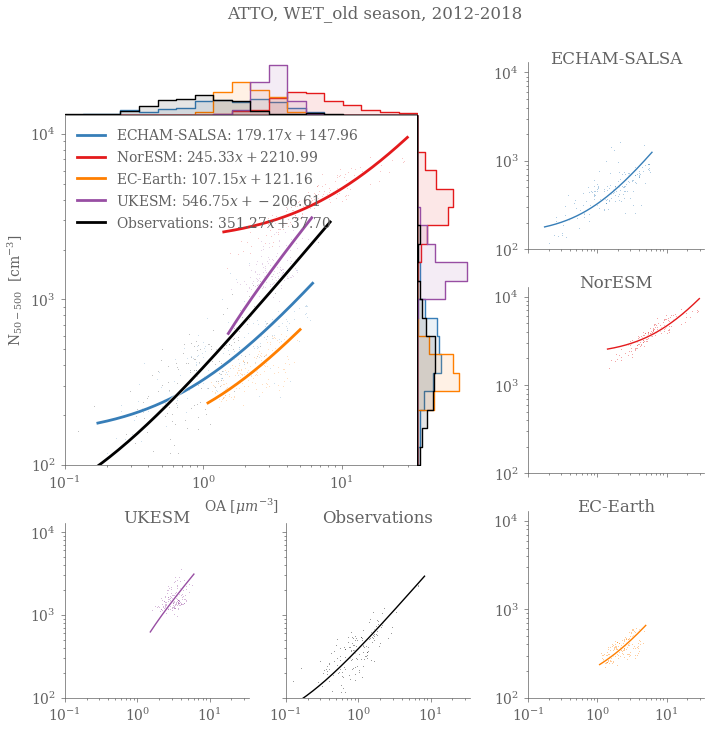

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [104]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_old'
xlims = [.1,35]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 33.6)
(0.0, 33.6)
(0.0, 51.45)
(0.0, 51.45)
(0.0, 51.45)
ECHAM-SALSA
115


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[ 78.53936909 368.66531533]
Beta: [ 97.53553762 203.41574625]
Beta Std Error: [ 6.02757544 55.89785054]
Beta Covariance: [[  183.29635768 -1594.51331453]
 [-1594.51331453 15763.72110481]]
Residual Variance: 0.198212698255987
Inverse Condition #: 0.03504508392255535
Reason(s) for Halting:
  Sum of squares convergence
[ 97.53553762 203.41574625]
reason for haltng
NorESM
115
[ 130.44531872 2915.9055306 ]
Beta: [ 153.18851051 2548.02046956]
Beta Std Error: [  8.16154905 141.31429388]
Beta Covariance: [[   440.84299454  -7130.90581947]
 [ -7130.90581947 132163.31984241]]
Residual Variance: 0.15109888036522343
Inverse Condition #: 0.18133836481047846
Reason(s) for Halting:
  Sum of squares convergence
[ 153.18851051 2548.02046956]
reason for haltng
EC-Earth
115
[116.1310164   27.39355816]
Beta: [125.49633784 -20.59524482]
Beta Std Error: [ 4.64864253 24.4572545 ]
Beta Covariance: [[  284.51972645 -1457.90563075]
 [-1457.90563075  7875.45193434]]
Residual Variance: 0.07595212344085132
Inverse

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


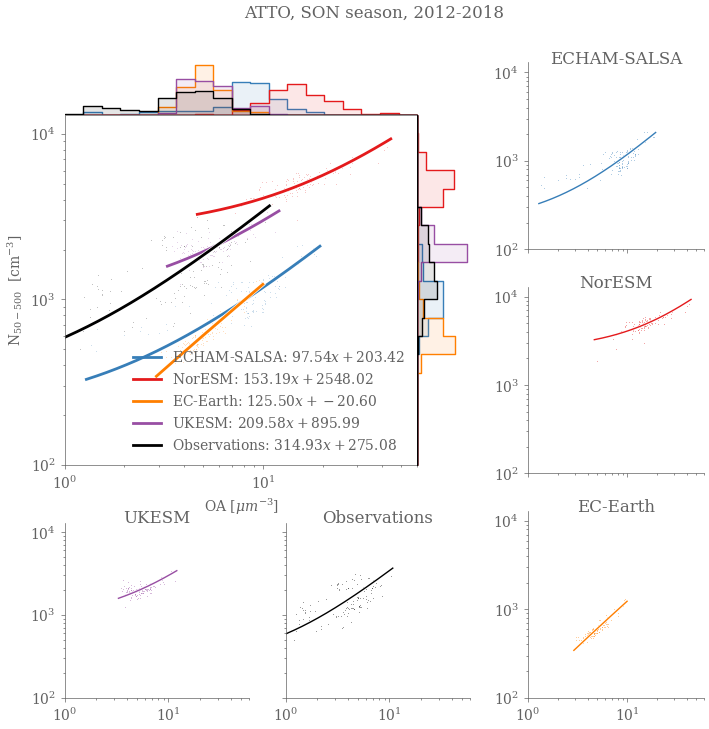

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [105]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [1,60]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### DRY

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 46.2)
(0.0, 46.2)
(0.0, 92.4)
(0.0, 92.4)
(0.0, 92.4)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


ECHAM-SALSA
[ 91.4773873  245.51073589]
Beta: [108.40796819 104.10749178]
Beta Std Error: [ 4.8540553  43.35823592]
Beta Covariance: [[  149.09694274 -1245.24878863]
 [-1245.24878863 11896.04249899]]
Residual Variance: 0.1580304224700568
Inverse Condition #: 0.03717966347548882
Reason(s) for Halting:
  Sum of squares convergence
[108.40796819 104.10749178]
reason for haltng
NorESM
[ 132.92242499 2946.43831714]
Beta: [ 161.37571419 2492.12833382]
Beta Std Error: [  7.7199767  130.54382961]
Beta Covariance: [[  334.03669319 -5333.52041501]
 [-5333.52041501 95515.72903826]]
Residual Variance: 0.1784176451365378
Inverse Condition #: 0.16384108746359058
Reason(s) for Halting:
  Sum of squares convergence
[ 161.37571419 2492.12833382]
reason for haltng
EC-Earth
[122.83992838   9.35455676]
Beta: [132.2589206  -39.96827639]
Beta Std Error: [ 4.05661593 21.9137054 ]
Beta Covariance: [[  228.15615431 -1194.74530676]
 [-1194.74530676  6657.88120139]]
Residual Variance: 0.07212662256684751
Inverse

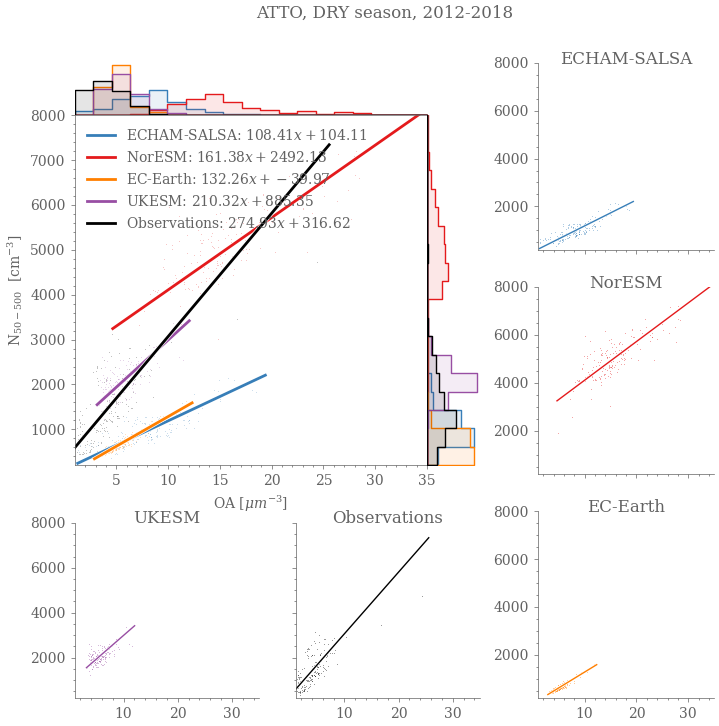

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [106]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [1,35]

ylims = [200,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### WET

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 58.8)
(0.0, 74.55)
(0.0, 115.5)
(0.0, 115.5)
(0.0, 115.5)
ECHAM-SALSA
[108.05757724 298.1278527 ]
Beta: [184.06992086  88.19873573]
Beta Std Error: [10.63196365 33.56602219]
Beta Covariance: [[ 271.96656033 -751.11090173]
 [-751.11090173 2710.74270181]]
Residual Variance: 0.4156343739392439
Inverse Condition #: 0.13269406009084603
Reason(s) for Halting:
  Sum of squares convergence
[184.06992086  88.19873573]
reason for haltng


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


NorESM
[ 199.23355929 2552.1489006 ]
Beta: [ 228.55422945 2272.88379222]
Beta Std Error: [ 6.77521208 72.26377039]
Beta Covariance: [[  355.52597471 -3386.21136587]
 [-3386.21136587 40445.18081979]]
Residual Variance: 0.12911433216844384
Inverse Condition #: 0.22320542578393038
Reason(s) for Halting:
  Sum of squares convergence
[ 228.55422945 2272.88379222]
reason for haltng
EC-Earth
[ 86.21666535 184.38626146]
Beta: [105.99233693 125.88896818]
Beta Std Error: [ 3.84972603 12.06262602]
Beta Covariance: [[  78.91951312 -233.44733654]
 [-233.44733654  774.83365557]]
Residual Variance: 0.18779120586227624
Inverse Condition #: 0.08686361853656328
Reason(s) for Halting:
  Sum of squares convergence
[105.99233693 125.88896818]
reason for haltng
UKESM
[237.06899267 892.0066219 ]
Beta: [361.28953543 380.86002213]
Beta Std Error: [18.66970835 80.18355106]
Beta Covariance: [[ 1007.22368667 -4144.55557003]
 [-4144.55557003 18578.96148906]]
Residual Variance: 0.34605819408223926
Inverse Condition

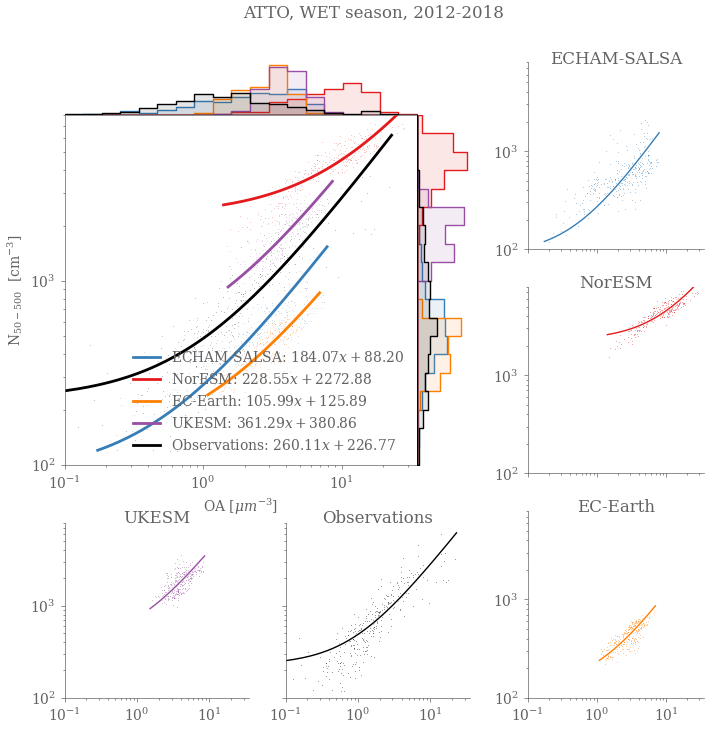

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [107]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet mid

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 23.1)
(0.0, 35.7)
(0.0, 51.45)
(0.0, 66.15)
(0.0, 66.15)
ECHAM-SALSA
[101.85852721 273.94368022]
Beta: [167.83213339 164.12588311]
Beta Std Error: [14.39614087 27.97170918]
Beta Covariance: [[ 519.38735984 -864.55752926]
 [-864.55752926 1960.81765648]]
Residual Variance: 0.3990256369228501
Inverse Condition #: 0.21101921323227396
Reason(s) for Halting:
  Sum of squares convergence
[167.83213339 164.12588311]
reason for haltng
NorESM
[ 237.94436667 2234.64423134]
Beta: [ 282.88942764 1964.22631198]
Beta Std Error: [14.41197297 98.4543229 ]
Beta Covariance: [[ 1287.89067361 -7748.75736878]
 [-7748.75736878 60103.76803534]]
Residual Variance: 0.16127530792048989
Inverse Condition #: 0.06493909556494806
Reason(s) for Halting:
  Sum of squares convergence
[ 282.88942764 1964.22631198]
reason for haltng
EC-Earth
[ 96.3850653  166.28406767]
Beta: [122.02761654 112.15524163]
Beta Std Error: [ 7.25122884 16.16770844]
Beta Covariance: [[ 246.50425805 -520.34550221]
 [-520.34550221 1225.457

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


UKESM
[259.49416522 752.6842571 ]
Beta: [ 571.87549527 -283.39091385]
Beta Std Error: [ 60.79644793 205.87934767]
Beta Covariance: [[  6665.77617012 -22108.37261623]
 [-22108.37261623  76439.85970508]]
Residual Variance: 0.5545052798660333
Inverse Condition #: 0.04825773782643917
Reason(s) for Halting:
  Sum of squares convergence
[ 571.87549527 -283.39091385]
reason for haltng
Observations
[256.14192185 110.90241512]
Beta: [317.94324414  49.87035275]
Beta Std Error: [18.09227056 20.85617022]
Beta Covariance: [[ 1658.83826697 -1638.19038889]
 [-1638.19038889  2204.38284961]]
Residual Variance: 0.1973249957170978
Inverse Condition #: 0.2542048188491413
Reason(s) for Halting:
  Sum of squares convergence
[317.94324414  49.87035275]
reason for haltng


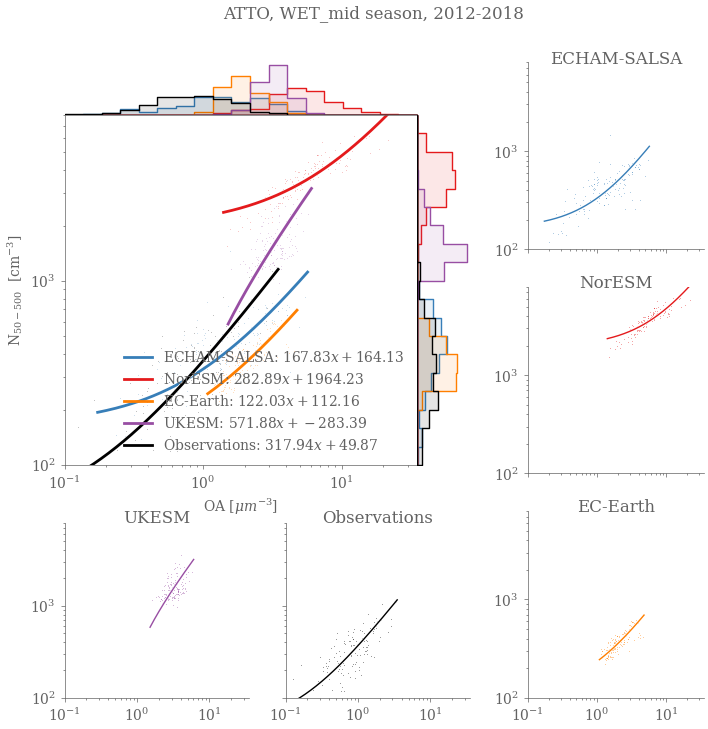

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [108]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_mid'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet_early

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 27.3)
(0.0, 28.35)
(0.0, 45.15)
(0.0, 51.45)
(0.0, 51.45)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


ECHAM-SALSA
[157.09092355 311.16984289]
Beta: [247.65744993  46.79022847]
Beta Std Error: [21.04205564 68.3287039 ]
Beta Covariance: [[ 1191.43197403 -3477.99995859]
 [-3477.99995859 12563.17147191]]
Residual Variance: 0.3716268450021289
Inverse Condition #: 0.11551175540952016
Reason(s) for Halting:
  Sum of squares convergence
[247.65744993  46.79022847]
reason for haltng
NorESM
[ 205.50869727 2673.87200058]
Beta: [ 236.55979131 2348.62647508]
Beta Std Error: [ 11.26063171 132.4060613 ]
Beta Covariance: [[   950.65730796  -9957.68543681]
 [ -9957.68543681 131435.96414597]]
Residual Variance: 0.13338331850113663
Inverse Condition #: 0.21839009050276442
Reason(s) for Halting:
  Sum of squares convergence
[ 236.55979131 2348.62647508]
reason for haltng
EC-Earth
[ 74.65495208 159.86807276]
Beta: [ 89.19125901 118.49284613]
Beta Std Error: [ 4.77159403 14.34758052]
Beta Covariance: [[ 137.47448236 -391.29868364]
 [-391.29868364 1242.94657406]]
Residual Variance: 0.16561698718113396
Invers

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


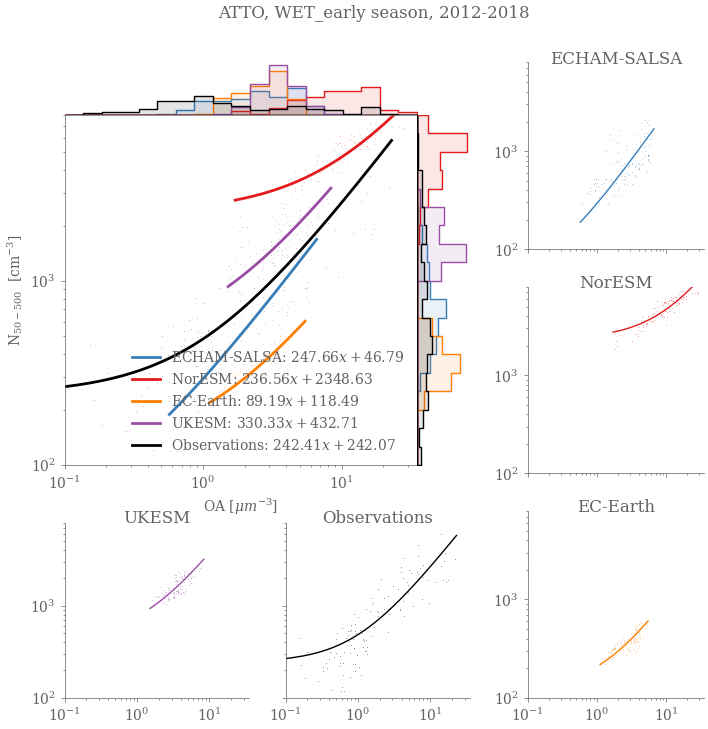

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [109]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_early'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet_late

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 31.5)
(0.0, 50.4)
(0.0, 70.35)
(0.0, 71.4)
(0.0, 71.4)
ECHAM-SALSA
[ 74.43104266 282.77643079]
Beta: [ 98.67022649 218.39026476]
Beta Std Error: [ 5.41378684 17.02930789]
Beta Covariance: [[ 118.03353723 -313.48505932]
 [-313.48505932 1167.87701914]]
Residual Variance: 0.2483115279451355
Inverse Condition #: 0.14962914669118577
Reason(s) for Halting:
  Sum of squares convergence
[ 98.67022649 218.39026476]
reason for haltng
NorESM
[ 182.54670846 2574.82537962]
Beta: [ 207.25883339 2355.18908445]
Beta Std Error: [ 7.65286025 75.55313251]
Beta Covariance: [[  485.95277927 -4319.04891375]
 [-4319.04891375 47364.33629694]]
Residual Variance: 0.12051843810823289
Inverse Condition #: 0.21438698493498531
Reason(s) for Halting:
  Sum of squares convergence
[ 207.25883339 2355.18908445]
reason for haltng
EC-Earth
[ 86.80535497 221.08893773]
Beta: [ 95.71611455 194.06340044]
Beta Std Error: [ 3.10158809 10.0057993 ]
Beta Covariance: [[ 102.2223186  -310.03113752]
 [-310.03113752 1063.85162

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[352.12791589  84.6419561 ]
Beta: [386.13673964  22.38208598]
Beta Std Error: [12.15413521 26.65864897]
Beta Covariance: [[ 1659.25197916 -3037.58677818]
 [-3037.58677818  7982.5287281 ]]
Residual Variance: 0.08902987878942942
Inverse Condition #: 0.2080973927617173
Reason(s) for Halting:
  Sum of squares convergence
[386.13673964  22.38208598]
reason for haltng


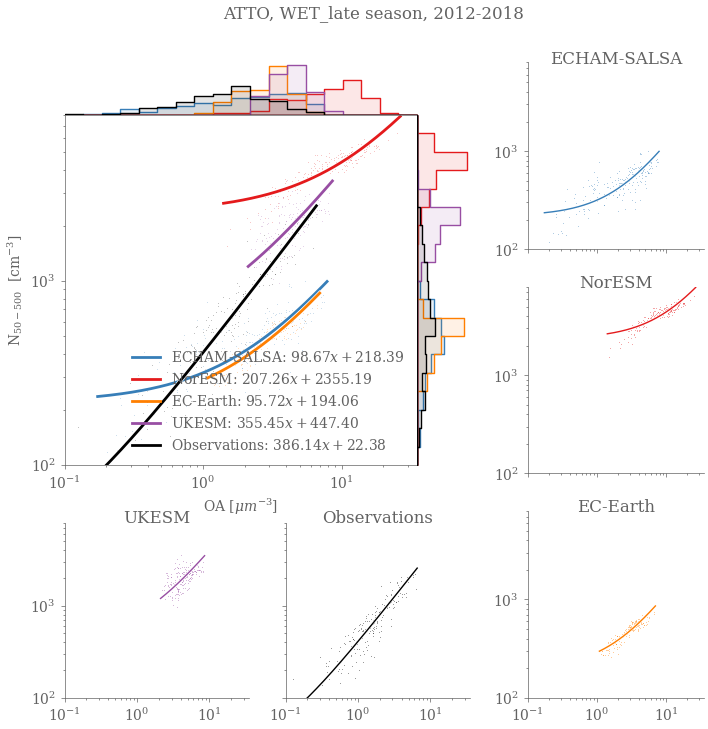

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [110]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_late'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## N100

#### WET_old

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 26.25)
(0.0, 36.75)
(0.0, 53.55)
(0.0, 80.85)
(0.0, 80.85)
ECHAM-SALSA
161
[81.20785539 37.37382568]
Beta: [124.59599898 -49.88704452]
Beta Std Error: [ 9.0742857  21.64724169]
Beta Covariance: [[ 233.50671788 -469.62145592]
 [-469.62145592 1328.86117907]]
Residual Variance: 0.3526350835105815
Inverse Condition #: 0.18908069097984395
Reason(s) for Halting:
  Sum of squares convergence
[124.59599898 -49.88704452]
reason for haltng
NorESM
161
[228.93893739 657.58636482]
Beta: [235.59372679 609.3089776 ]
Beta Std Error: [ 4.47255294 39.22123902]
Beta Covariance: [[  699.37346957 -5073.62772173]
 [-5073.62772173 53782.47590211]]
Residual Variance: 0.028602357268768145
Inverse Condition #: 0.061758865212947704
Reason(s) for Halting:
  Sum of squares convergence
[235.59372679 609.3089776 ]
reason for haltng
EC-Earth
161
[60.04911455 75.67225248]
Beta: [73.33268129 45.51249176]
Beta Std Error: [3.67078605 8.82730028]
Beta Covariance: [[  73.45713473 -166.78122335]
 [-166.78122335  424.7

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


[231.65840167   5.11402414]
Beta: [244.60500598 -10.67274691]
Beta Std Error: [ 6.39674318 10.70351383]
Beta Covariance: [[ 763.45313453 -930.93593177]
 [-930.93593177 2137.55502363]]
Residual Variance: 0.0535963786308391
Inverse Condition #: 0.009027900029559876
Reason(s) for Halting:
  Sum of squares convergence
[244.60500598 -10.67274691]
reason for haltng


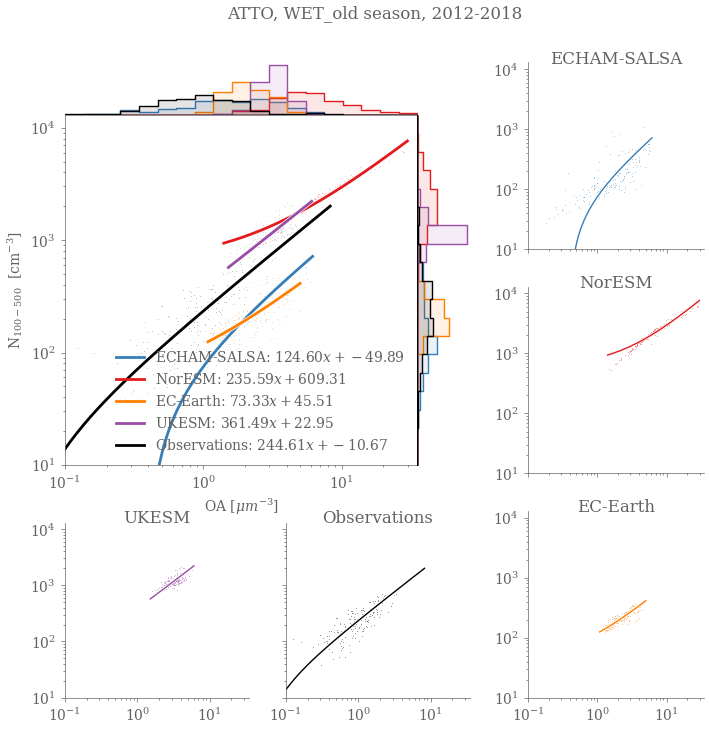

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [111]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_old'
xlims = [.1,35]

ylims = [10,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JFM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 18.9)
(0.0, 18.9)
(0.0, 21.0)
(0.0, 31.5)
(0.0, 31.5)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


ECHAM-SALSA
75
[77.42462365 88.41851035]
Beta: [ 147.85648503 -109.22150285]
Beta Std Error: [19.35327557 59.17396584]
Beta Covariance: [[  765.25551664 -2147.3961026 ]
 [-2147.3961026   7154.16349956]]
Residual Variance: 0.4894434175626901
Inverse Condition #: 0.10879373415792007
Reason(s) for Halting:
  Sum of squares convergence
[ 147.85648503 -109.22150285]
reason for haltng
NorESM
75
[221.55466911 746.77147887]
Beta: [228.37027578 687.02769789]
Beta Std Error: [ 6.57948917 69.20732705]
Beta Covariance: [[  1411.81397087 -12375.59292285]
 [-12375.59292285 156205.8426419 ]]
Residual Variance: 0.030662451774805605
Inverse Condition #: 0.05094123154159487
Reason(s) for Halting:
  Sum of squares convergence
[228.37027578 687.02769789]
reason for haltng
EC-Earth
75
[52.72118556 69.08513293]
Beta: [59.89323315 51.7265907 ]
Beta Std Error: [3.53815744 9.15131037]
Beta Covariance: [[ 101.75104544 -246.26857118]
 [-246.26857118  680.69277738]]
Residual Variance: 0.12303124744584848
Inverse 

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


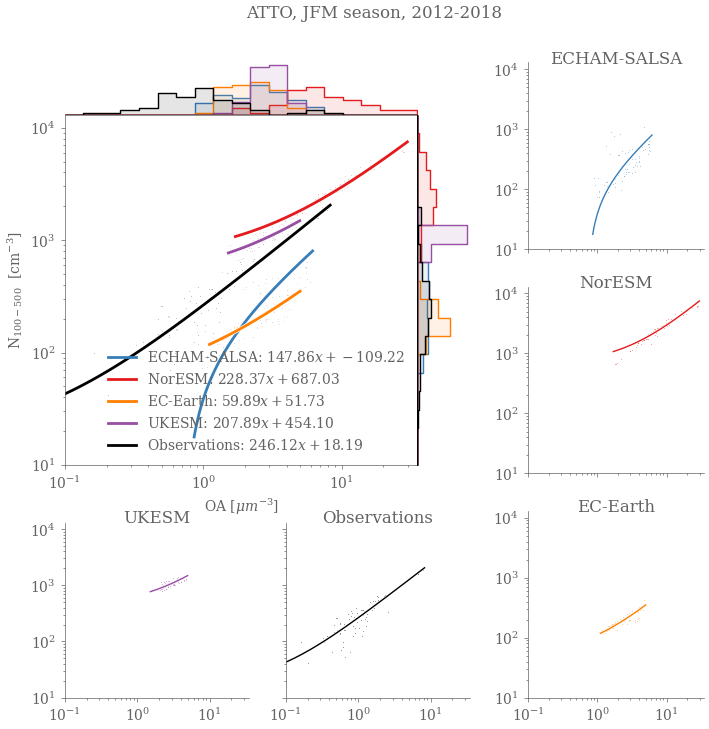

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [112]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [.1,35]

ylims = [10,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 33.6)
(0.0, 33.6)
(0.0, 51.45)
(0.0, 51.45)


/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 51.45)
ECHAM-SALSA
115
[76.23938706 31.92888887]
Beta: [  92.93335631 -113.29360134]
Beta Std Error: [ 5.49284839 50.96459356]
Beta Covariance: [[  165.02538764 -1435.57222635]
 [-1435.57222635 14206.68225081]]
Residual Variance: 0.18282873867381136
Inverse Condition #: 0.035163061964254054
Reason(s) for Halting:
  Sum of squares convergence
[  92.93335631 -113.29360134]
reason for haltng
NorESM
115
[159.25586724 946.03944157]
Beta: [168.11460412 802.74396414]
Beta Std Error: [ 5.20320313 90.38756172]
Beta Covariance: [[   504.8237319   -8165.83389407]
 [ -8165.83389407 152340.55853481]]
Residual Variance: 0.05362925928428897
Inverse Condition #: 0.02031040704178308
Reason(s) for Halting:
  Sum of squares convergence
[168.11460412 802.74396414]
reason for haltng
EC-Earth
115
[ 90.8982026  -37.78932942]
Beta: [ 97.24029187 -70.28682515]
Beta Std Error: [ 3.35909591 17.67498333]
Beta Covariance: [[ 169.99023832 -871.04680807]
 [-871.04680807 4706.49063931]]
Residual Variance: 0.066

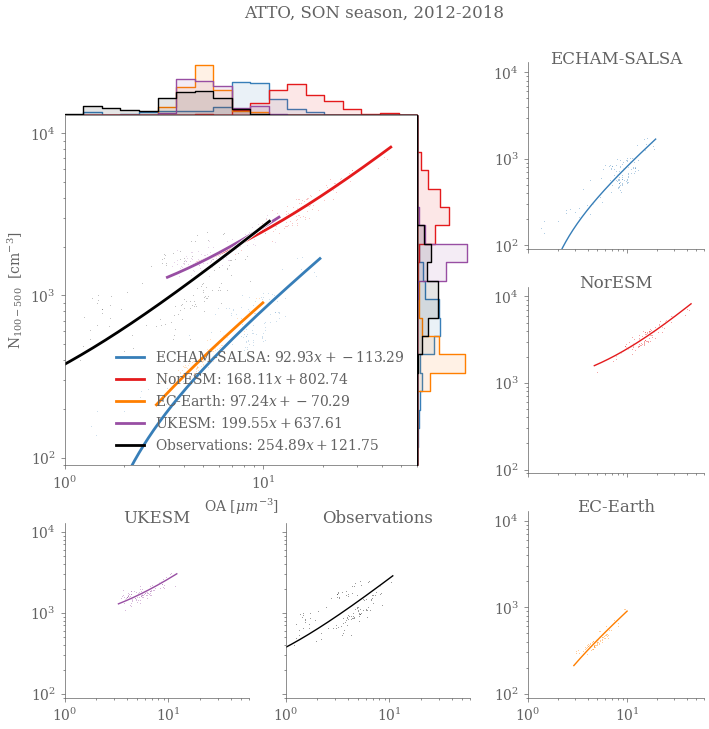

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [113]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [1,60]

ylims = [90,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## N200

#### JFM

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 25.2)
(0.0, 25.2)
(0.0, 36.75)
(0.0, 43.05)
(0.0, 45.15)
ECHAM-SALSA
75
[ 32.72103725 -24.97078726]
Beta: [ 35.82534005 -33.68182252]
Beta Std Error: [1.78471481 5.56583855]
Beta Covariance: [[  35.77560875 -100.39052674]
 [-100.39052674  347.94498801]]
Residual Variance: 0.08903292134734807
Inverse Condition #: 0.11896480689171804
Reason(s) for Halting:
  Sum of squares convergence
[ 35.82534005 -33.68182252]
reason for haltng
NorESM
75
[  36.29069055 -120.56990004]
Beta: [  37.39185957 -130.22246173]
Beta Std Error: [ 1.07001949 11.25550311]
Beta Covariance: [[  37.84123563 -331.70641328]
 [-331.70641328 4187.08477746]]
Residual Variance: 0.030256456953035464
Inverse Condition #: 0.050943537225985415
Reason(s) for Halting:
  Sum of squares convergence
[  37.39185957 -130.22246173]
reason for haltng
EC-Earth
75
[42.7929948  -9.98688991]
Beta: [ 46.65649783 -19.33774557]
Beta Std Error: [2.26986294 5.87808431]
Beta Covariance: [[  60.5561629  -146.5644211 ]
 [-146.5644211   406.0

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


Observations
75
[54.90803145 20.08262608]
Beta: [58.25723047 15.62206158]
Beta Std Error: [2.34605487 4.72166204]
Beta Covariance: [[  93.18270323 -124.10374851]
 [-124.10374851  377.4407368 ]]
Residual Variance: 0.05906647112318393
Inverse Condition #: 0.33277745630510475
Reason(s) for Halting:
  Sum of squares convergence
[58.25723047 15.62206158]
reason for haltng


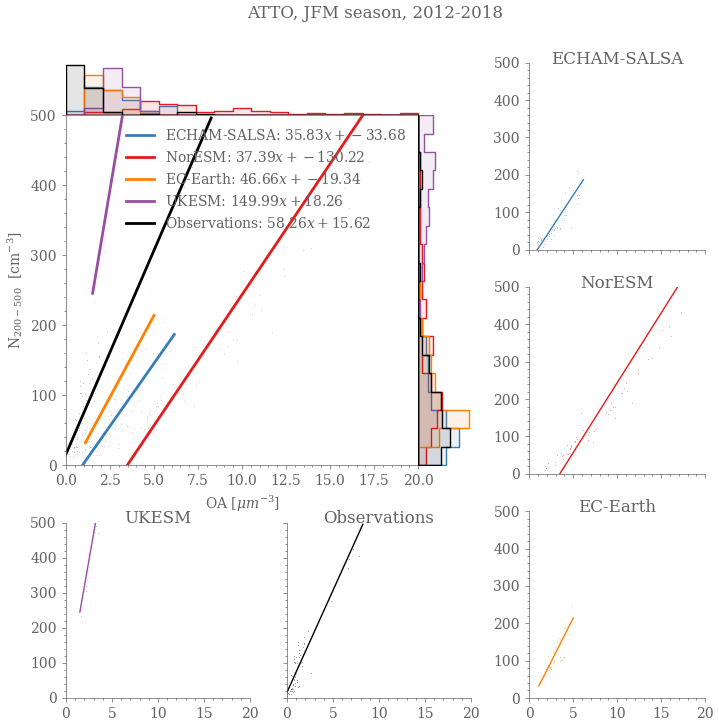

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [114]:

## Settings
alpha_scatt = 0.5

## Settings
alpha_scatt = 0.5

ylab = r'N$_{200-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [0,20]

ylims = [0,500]

# OBS: 
v_x = 'OA'
v_y = 'N200-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


(0.0, 37.8)
(0.0, 37.8)
(0.0, 54.6)
(0.0, 54.6)
(0.0, 54.6)
ECHAM-SALSA
115
[ 25.27293505 -38.56187235]
Beta: [ 27.76606973 -60.24989842]
Beta Std Error: [ 1.13266828 10.54062105]
Beta Covariance: [[  14.03821145 -122.11981135]
 [-122.11981135 1215.7343879 ]]
Residual Variance: 0.09138895248816623
Inverse Condition #: 0.035846692082636085
Reason(s) for Halting:
  Sum of squares convergence
[ 27.76606973 -60.24989842]
reason for haltng
NorESM
115
[  42.1873103  -149.57588715]
Beta: [  42.57768447 -155.89042659]
Beta Std Error: [0.54363844 9.45784745]
Beta Covariance: [[  31.67317882 -512.33303428]
 [-512.33303428 9586.40899928]]
Residual Variance: 0.009331010016412846
Inverse Condition #: 0.02048156238632949
Reason(s) for Halting:
  Sum of squares convergence
[  42.57768447 -155.89042659]
reason for haltng
EC-Earth
115
[40.09706482 -8.35993373]
Beta: [ 41.32424643 -14.64813358]
Beta Std Error: [0.95451213 5.02485542]
Beta Covariance: [[  30.14647071 -154.47334315]
 [-154.47334315  835.4

/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/tmp/ipykernel_209623/3560359676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


115
[ 43.28498242 177.60127176]
Beta: [87.06327362 -3.81056796]
Beta Std Error: [ 9.49360582 42.56598339]
Beta Covariance: [[ 176.10538702 -729.75914626]
 [-729.75914626 3540.26354033]]
Residual Variance: 0.5117875890704685
Inverse Condition #: 0.07522293157808345
Reason(s) for Halting:
  Sum of squares convergence
[87.06327362 -3.81056796]
reason for haltng


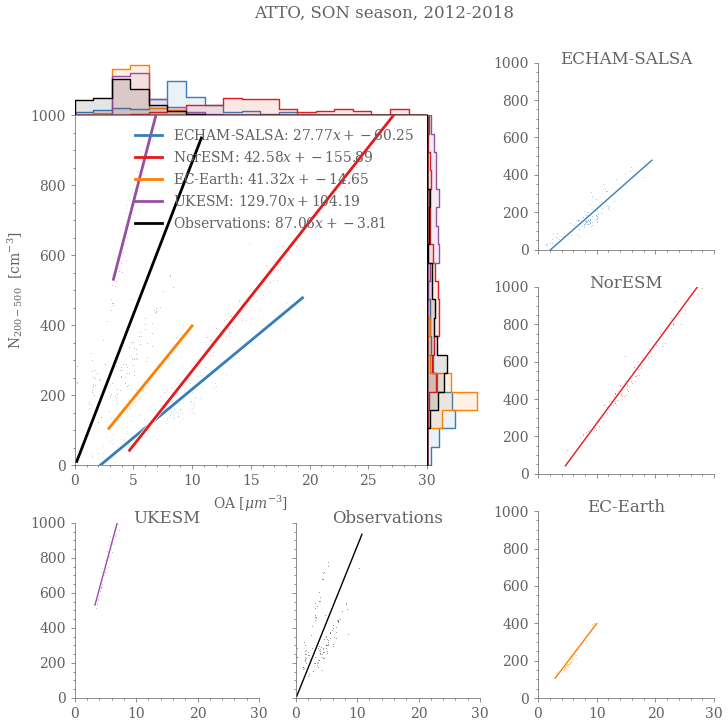

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [115]:

## Settings
alpha_scatt = 0.5

## Settings
alpha_scatt = 0.5

ylab = r'N$_{200-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [0,20]

ylims = [0,500]
xlims = [0,30]

ylims = [0,1000]
# OBS: 
v_x = 'OA'
v_y = 'N200-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## Extra stuff

<AxesSubplot:xlabel='time'>

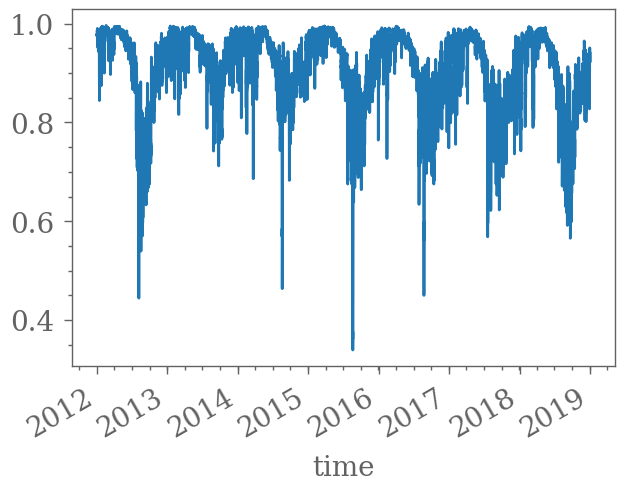

In [116]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['SOA']/df_s['OA']).plot()

<AxesSubplot:xlabel='time'>

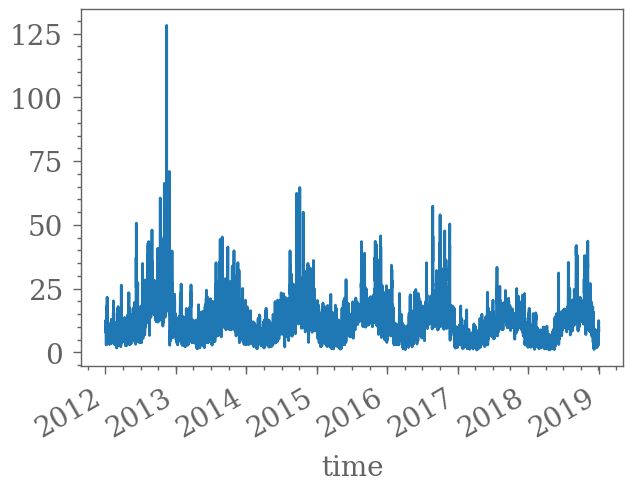

In [117]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['OA']).plot()

<AxesSubplot:xlabel='time'>

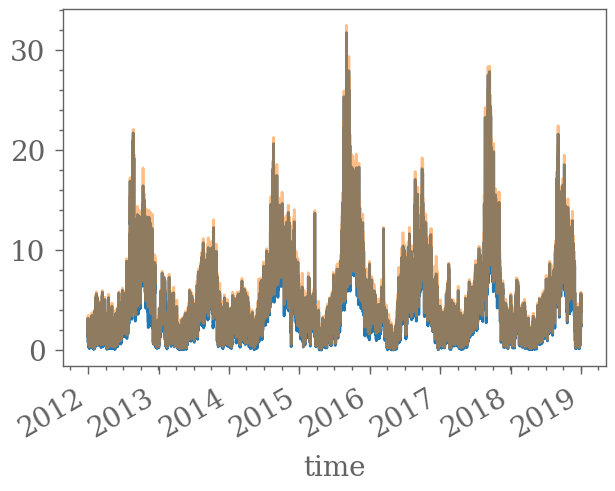

In [118]:
mo= 'ECHAM-SALSA'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

<AxesSubplot:xlabel='time'>

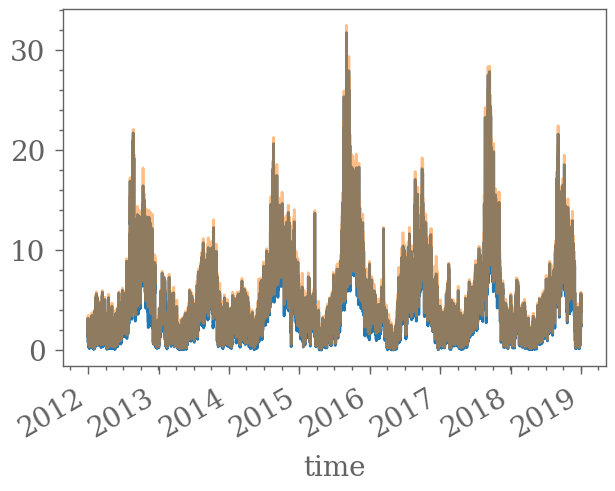

In [119]:
mo= 'ECHAM-SALSA'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

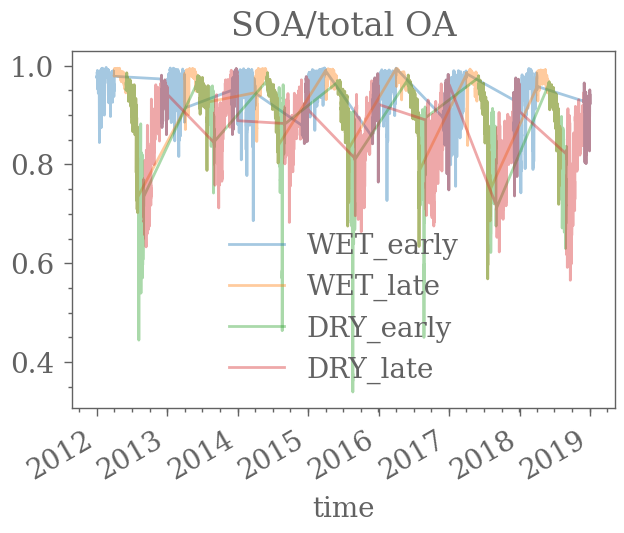

In [120]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)

plt.title('SOA/total OA')
plt.legend()

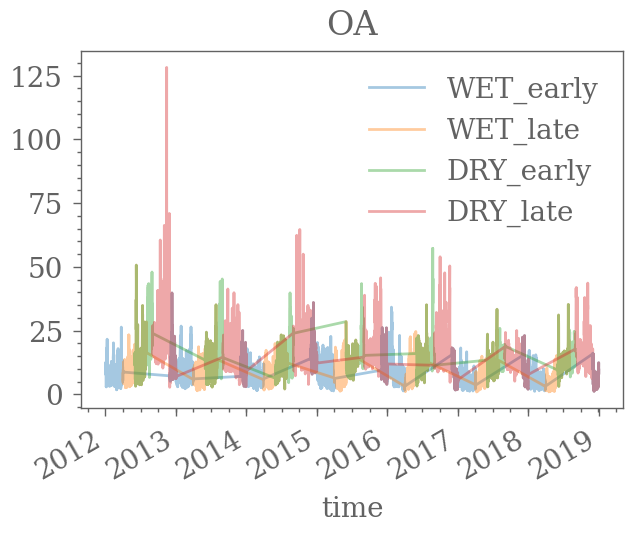

In [121]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)
plt.title('OA')

plt.legend()

Text(0.5, 1.0, 'SOA')

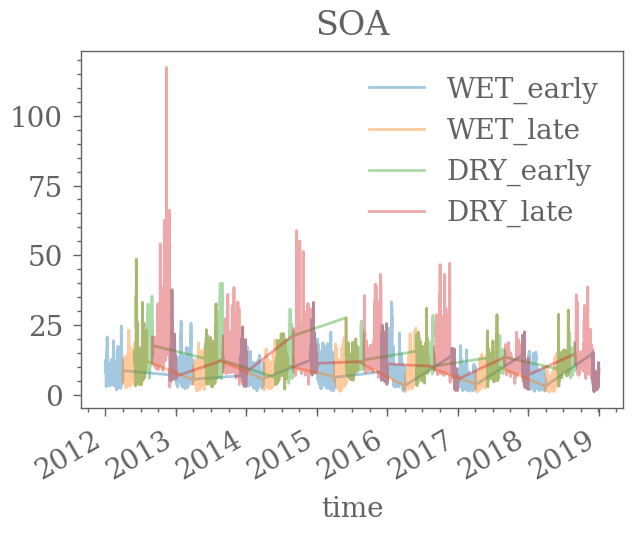

In [122]:
mo= 'NorESM'
ca = list(dic_df_mod_case[mo].keys())[0]

df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


plt.legend()
plt.title('SOA')

<AxesSubplot:xlabel='time'>

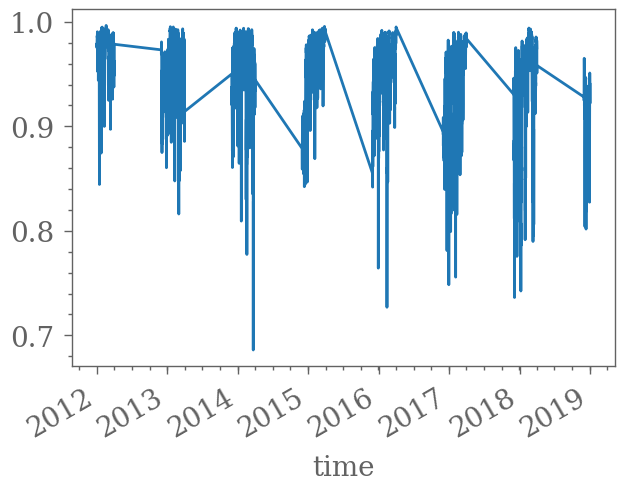

In [123]:
month_ma = select_months(df_s, season='WET_early')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

<AxesSubplot:xlabel='time'>

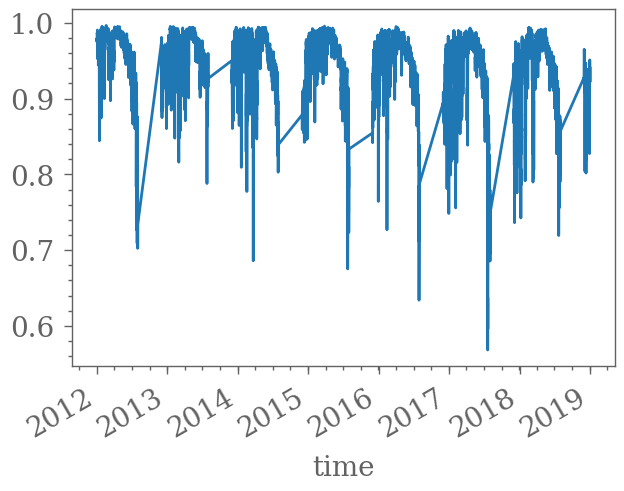

In [124]:
month_ma = select_months(df_s, season='WET')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

<AxesSubplot:xlabel='time'>

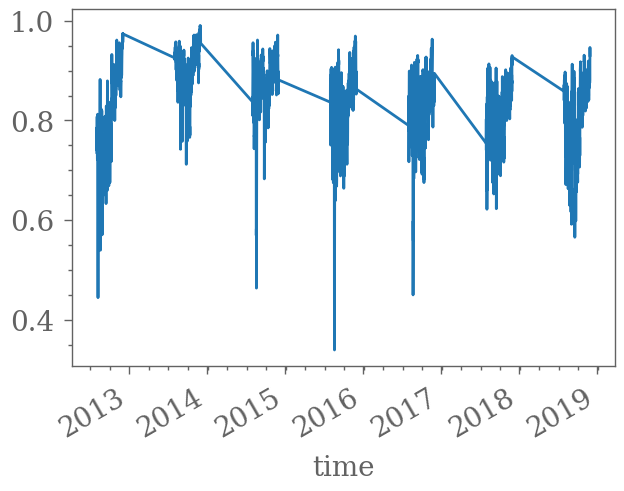

In [125]:
month_ma = select_months(df_s, season='DRY')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()